<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Reccomendation system project

</div>


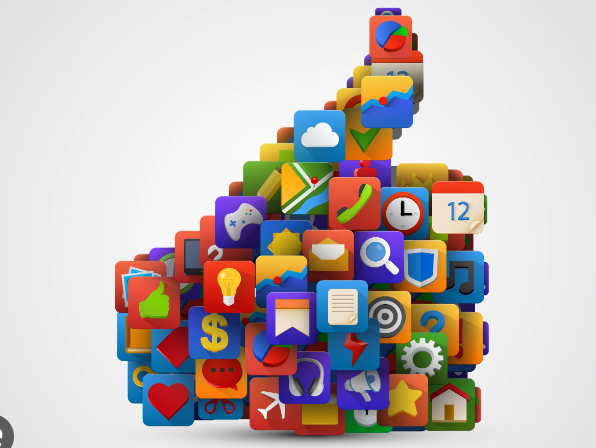

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Project overview

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>
  <p>This project focuses on developing and comparing various techniques for building effective recommendation systems. By leveraging both traditional methods and advanced NLP models, we aim to enhance the accuracy and relevance of recommendations.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Data Collection and Preprocessing:</h2>
  <p>We will gather a diverse dataset from multiple sources to ensure comprehensive coverage of user preferences and behaviors. The data will undergo thorough preprocessing to prepare it for further analysis and modeling.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Sentiment Analysis and Topic Modeling:</h2>
  <p>Sentiment analysis will be employed to assess the emotional tone of the content, while topic modeling will identify underlying themes and trends. These insights will help us better understand user preferences and improve the recommendation accuracy.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Exploring Recommendation Techniques:</h2>
  <p>We will explore a range of recommendation techniques, from simpler algorithms like collaborative filtering and content-based filtering to more sophisticated approaches involving advanced NLP models. This comparison will help us identify the most effective methods for different use cases.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Implementation and Evaluation:</h2>
  <p>Finally, we will implement the selected methods and evaluate their performance in terms of accuracy, user satisfaction, and scalability. The goal is to develop a robust recommendation system that can be applied across various domains.</p>
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Importing dataset

</div>

In [181]:
import pandas as pd

# Path to the CSV file
file_path = 'Reviews.csv'

# Loading the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>
  <p>The dataset we are working with comprises customer reviews from Amazon, offering valuable insights into user opinions and product performance. Below is a brief overview of the key columns included in the dataset:</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Key Columns:</h2>
  <ul style="font-size: 16px; margin-left: 20px;">
    <li><strong>Id:</strong> A unique identifier for each review entry.</li>
    <li><strong>ProductId:</strong> The unique identifier of the product being reviewed.</li>
    <li><strong>UserId:</strong> The unique identifier of the user who provided the review.</li>
    <li><strong>ProfileName:</strong> The username of the reviewer.</li>
    <li><strong>HelpfulnessNumerator:</strong> The number of users who found the review helpful.</li>
    <li><strong>HelpfulnessDenominator:</strong> The total number of users who rated the helpfulness of the review.</li>
    <li><strong>Score:</strong> The rating given by the user, typically on a scale from 1 to 5.</li>
    <li><strong>Time:</strong> The timestamp of when the review was posted.</li>
    <li><strong>Summary:</strong> A brief summary or title of the review.</li>
    <li><strong>Text:</strong> The full text of the review, providing detailed feedback on the product.</li>
  </ul>
  <p>This structured data allows for comprehensive analysis, enabling us to explore patterns, sentiments, and trends within customer reviews.</p>
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Text Preprocessing and Tokenization

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"> </h1>
  <p>This script is designed to preprocess and tokenize text data within a DataFrame. By cleaning the text and removing stopwords, it prepares the data for further analysis or modeling, while incorporating a progress bar to monitor the processing status.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Text Cleaning:</h2>
  <p>The <code>clean_text</code> function processes each text entry by removing special characters, extra white spaces, and converting the text to lowercase. This ensures that the data is uniformly formatted and ready for tokenization.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Tokenization and Stopword Removal:</h2>
  <p>The <code>tokenize_and_remove_stopwords</code> function tokenizes the cleaned text into individual words. It filters out any non-alphabetic tokens and removes common English stopwords to focus on meaningful words that contribute to the analysis.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Progress Tracking:</h2>
  <p>Using the <code>tqdm</code> library, the script adds a progress bar to monitor the processing of each row in the DataFrame. This feature helps track the progress and provides feedback every 1000 rows or at the end of the processing.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Integration with DataFrame:</h2>
  <p>Once the text data is cleaned and tokenized, the results are added back to the DataFrame. Two new columns, <code>cleaned_text</code> and <code>tokens</code>, are created to store the processed text and the list of tokens, respectively.</p>
</div>

In [182]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [183]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [184]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from tqdm import tqdm  # Useful for progress bar

# Assuming df is your DataFrame

def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra white spaces
    text = text.lower()  # Convert to lowercase
    return text

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Remove digits
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Add progress bar
total_rows = len(df)
processed_rows = 0

# Lists to store processed data
cleaned_texts = []
tokens_list = []

# Process data with progress monitor
for index, row in tqdm(df.iterrows(), total=total_rows, desc="Processing"):
    cleaned_text = clean_text(row['Text'])
    tokens = tokenize_and_remove_stopwords(cleaned_text)
    cleaned_texts.append(cleaned_text)
    tokens_list.append(tokens)
    processed_rows += 1

    # Optionally: Print status every 1000 rows
    if processed_rows % 1000 == 0 or processed_rows == total_rows:
        print(f"Processed {processed_rows} out of {total_rows} rows ({(processed_rows / total_rows) * 100:.2f}%).")

# Add results to DataFrame
df['cleaned_text'] = cleaned_texts
df['tokens'] = tokens_list


Processing:   0%|          | 1137/568454 [00:05<13:39, 692.53it/s] 

Processed 1000 out of 568454 rows (0.18%).


Processing:   0%|          | 2115/568454 [00:06<11:37, 811.49it/s]

Processed 2000 out of 568454 rows (0.35%).


Processing:   1%|          | 3023/568454 [00:08<12:55, 728.80it/s]

Processed 3000 out of 568454 rows (0.53%).


Processing:   1%|          | 4119/568454 [00:09<10:40, 880.45it/s]

Processed 4000 out of 568454 rows (0.70%).


Processing:   1%|          | 5070/568454 [00:10<12:26, 754.81it/s]

Processed 5000 out of 568454 rows (0.88%).


Processing:   1%|          | 6105/568454 [00:11<10:07, 925.84it/s]

Processed 6000 out of 568454 rows (1.06%).


Processing:   1%|▏         | 7193/568454 [00:13<10:14, 912.93it/s]

Processed 7000 out of 568454 rows (1.23%).


Processing:   1%|▏         | 8066/568454 [00:14<14:02, 665.00it/s] 

Processed 8000 out of 568454 rows (1.41%).


Processing:   2%|▏         | 9102/568454 [00:15<11:07, 838.28it/s]

Processed 9000 out of 568454 rows (1.58%).


Processing:   2%|▏         | 10156/568454 [00:16<12:01, 773.36it/s]

Processed 10000 out of 568454 rows (1.76%).


Processing:   2%|▏         | 11088/568454 [00:18<10:50, 856.66it/s]

Processed 11000 out of 568454 rows (1.94%).


Processing:   2%|▏         | 12128/568454 [00:19<11:01, 841.38it/s]

Processed 12000 out of 568454 rows (2.11%).


Processing:   2%|▏         | 13065/568454 [00:20<12:15, 755.61it/s]

Processed 13000 out of 568454 rows (2.29%).


Processing:   2%|▏         | 14094/568454 [00:21<12:38, 730.38it/s]

Processed 14000 out of 568454 rows (2.46%).


Processing:   3%|▎         | 15137/568454 [00:23<11:13, 821.02it/s] 

Processed 15000 out of 568454 rows (2.64%).


Processing:   3%|▎         | 16191/568454 [00:24<09:49, 936.49it/s]

Processed 16000 out of 568454 rows (2.81%).


Processing:   3%|▎         | 17206/568454 [00:25<09:31, 964.40it/s] 

Processed 17000 out of 568454 rows (2.99%).


Processing:   3%|▎         | 18146/568454 [00:26<09:11, 998.31it/s] 

Processed 18000 out of 568454 rows (3.17%).


Processing:   3%|▎         | 19137/568454 [00:27<11:10, 819.34it/s]

Processed 19000 out of 568454 rows (3.34%).


Processing:   4%|▎         | 20172/568454 [00:28<09:48, 931.19it/s] 

Processed 20000 out of 568454 rows (3.52%).


Processing:   4%|▎         | 21160/568454 [00:29<09:05, 1003.60it/s]

Processed 21000 out of 568454 rows (3.69%).


Processing:   4%|▍         | 22130/568454 [00:30<11:01, 825.76it/s] 

Processed 22000 out of 568454 rows (3.87%).


Processing:   4%|▍         | 23135/568454 [00:31<11:10, 813.37it/s] 

Processed 23000 out of 568454 rows (4.05%).


Processing:   4%|▍         | 24209/568454 [00:32<07:18, 1240.83it/s]

Processed 24000 out of 568454 rows (4.22%).


Processing:   4%|▍         | 25163/568454 [00:33<09:55, 911.86it/s] 

Processed 25000 out of 568454 rows (4.40%).


Processing:   5%|▍         | 26122/568454 [00:34<09:42, 930.24it/s]

Processed 26000 out of 568454 rows (4.57%).


Processing:   5%|▍         | 27147/568454 [00:36<10:10, 886.40it/s]

Processed 27000 out of 568454 rows (4.75%).


Processing:   5%|▍         | 28109/568454 [00:37<10:20, 870.58it/s]

Processed 28000 out of 568454 rows (4.93%).


Processing:   5%|▌         | 29226/568454 [00:38<08:16, 1085.59it/s]

Processed 29000 out of 568454 rows (5.10%).


Processing:   5%|▌         | 30140/568454 [00:39<09:36, 932.96it/s] 

Processed 30000 out of 568454 rows (5.28%).


Processing:   5%|▌         | 31134/568454 [00:40<09:33, 936.92it/s]

Processed 31000 out of 568454 rows (5.45%).


Processing:   6%|▌         | 32131/568454 [00:41<09:27, 944.88it/s]

Processed 32000 out of 568454 rows (5.63%).


Processing:   6%|▌         | 33167/568454 [00:42<08:37, 1035.05it/s]

Processed 33000 out of 568454 rows (5.81%).


Processing:   6%|▌         | 34140/568454 [00:43<08:21, 1064.75it/s]

Processed 34000 out of 568454 rows (5.98%).


Processing:   6%|▌         | 35159/568454 [00:44<08:21, 1063.99it/s]

Processed 35000 out of 568454 rows (6.16%).


Processing:   6%|▋         | 36111/568454 [00:45<11:23, 779.37it/s] 

Processed 36000 out of 568454 rows (6.33%).


Processing:   7%|▋         | 37183/568454 [00:46<09:07, 970.89it/s]

Processed 37000 out of 568454 rows (6.51%).


Processing:   7%|▋         | 38125/568454 [00:47<10:38, 830.90it/s] 

Processed 38000 out of 568454 rows (6.68%).


Processing:   7%|▋         | 39127/568454 [00:48<12:53, 684.35it/s]

Processed 39000 out of 568454 rows (6.86%).


Processing:   7%|▋         | 40129/568454 [00:50<10:45, 818.87it/s]

Processed 40000 out of 568454 rows (7.04%).


Processing:   7%|▋         | 41205/568454 [00:51<08:38, 1017.43it/s]

Processed 41000 out of 568454 rows (7.21%).


Processing:   7%|▋         | 42109/568454 [00:52<10:17, 852.10it/s] 

Processed 42000 out of 568454 rows (7.39%).


Processing:   8%|▊         | 43194/568454 [00:53<09:41, 903.48it/s]

Processed 43000 out of 568454 rows (7.56%).


Processing:   8%|▊         | 44174/568454 [00:54<09:04, 963.07it/s] 

Processed 44000 out of 568454 rows (7.74%).


Processing:   8%|▊         | 45174/568454 [01:35<8:59:24, 16.17it/s] 

Processed 45000 out of 568454 rows (7.92%).


Processing:   8%|▊         | 46088/568454 [01:36<30:05, 289.38it/s]  

Processed 46000 out of 568454 rows (8.09%).


Processing:   8%|▊         | 47160/568454 [01:37<11:17, 769.21it/s]

Processed 47000 out of 568454 rows (8.27%).


Processing:   8%|▊         | 48128/568454 [01:38<11:23, 760.75it/s]

Processed 48000 out of 568454 rows (8.44%).


Processing:   9%|▊         | 49148/568454 [01:40<09:27, 915.02it/s] 

Processed 49000 out of 568454 rows (8.62%).


Processing:   9%|▉         | 50146/568454 [01:41<09:43, 888.38it/s]

Processed 50000 out of 568454 rows (8.80%).


Processing:   9%|▉         | 51217/568454 [01:42<08:35, 1003.17it/s]

Processed 51000 out of 568454 rows (8.97%).


Processing:   9%|▉         | 52157/568454 [01:43<09:54, 868.68it/s] 

Processed 52000 out of 568454 rows (9.15%).


Processing:   9%|▉         | 53133/568454 [01:44<07:57, 1078.57it/s]

Processed 53000 out of 568454 rows (9.32%).


Processing:  10%|▉         | 54124/568454 [01:45<09:15, 925.08it/s] 

Processed 54000 out of 568454 rows (9.50%).


Processing:  10%|▉         | 55200/568454 [01:46<08:35, 995.72it/s] 

Processed 55000 out of 568454 rows (9.68%).


Processing:  10%|▉         | 56156/568454 [01:47<08:20, 1023.99it/s]

Processed 56000 out of 568454 rows (9.85%).


Processing:  10%|█         | 57185/568454 [01:48<07:52, 1081.49it/s]

Processed 57000 out of 568454 rows (10.03%).


Processing:  10%|█         | 58105/568454 [01:49<08:23, 1013.40it/s]

Processed 58000 out of 568454 rows (10.20%).


Processing:  10%|█         | 59098/568454 [01:50<08:11, 1035.57it/s]

Processed 59000 out of 568454 rows (10.38%).


Processing:  11%|█         | 60173/568454 [01:51<07:47, 1087.35it/s]

Processed 60000 out of 568454 rows (10.55%).


Processing:  11%|█         | 61120/568454 [01:52<10:37, 796.41it/s] 

Processed 61000 out of 568454 rows (10.73%).


Processing:  11%|█         | 62079/568454 [01:53<12:10, 693.43it/s]

Processed 62000 out of 568454 rows (10.91%).


Processing:  11%|█         | 63103/568454 [01:55<12:03, 698.19it/s]

Processed 63000 out of 568454 rows (11.08%).


Processing:  11%|█▏        | 64143/568454 [01:56<11:02, 760.94it/s]

Processed 64000 out of 568454 rows (11.26%).


Processing:  11%|█▏        | 65184/568454 [01:58<08:05, 1036.85it/s]

Processed 65000 out of 568454 rows (11.43%).


Processing:  12%|█▏        | 66069/568454 [01:59<09:43, 861.70it/s] 

Processed 66000 out of 568454 rows (11.61%).


Processing:  12%|█▏        | 67117/568454 [02:00<12:06, 690.28it/s]

Processed 67000 out of 568454 rows (11.79%).


Processing:  12%|█▏        | 68169/568454 [02:01<08:14, 1012.33it/s]

Processed 68000 out of 568454 rows (11.96%).


Processing:  12%|█▏        | 69181/568454 [02:02<08:42, 955.96it/s] 

Processed 69000 out of 568454 rows (12.14%).


Processing:  12%|█▏        | 70095/568454 [02:03<09:27, 878.74it/s]

Processed 70000 out of 568454 rows (12.31%).


Processing:  13%|█▎        | 71089/568454 [02:04<08:15, 1004.19it/s]

Processed 71000 out of 568454 rows (12.49%).


Processing:  13%|█▎        | 72085/568454 [02:06<10:25, 793.98it/s] 

Processed 72000 out of 568454 rows (12.67%).


Processing:  13%|█▎        | 73125/568454 [02:07<10:17, 802.45it/s]

Processed 73000 out of 568454 rows (12.84%).


Processing:  13%|█▎        | 74128/568454 [02:08<08:26, 975.40it/s] 

Processed 74000 out of 568454 rows (13.02%).


Processing:  13%|█▎        | 75180/568454 [02:09<07:22, 1114.68it/s]

Processed 75000 out of 568454 rows (13.19%).


Processing:  13%|█▎        | 76200/568454 [02:10<08:17, 989.76it/s] 

Processed 76000 out of 568454 rows (13.37%).


Processing:  14%|█▎        | 77141/568454 [02:11<09:01, 907.71it/s] 

Processed 77000 out of 568454 rows (13.55%).


Processing:  14%|█▎        | 78076/568454 [02:12<09:51, 829.28it/s]

Processed 78000 out of 568454 rows (13.72%).


Processing:  14%|█▍        | 79063/568454 [02:13<06:34, 1239.57it/s]

Processed 79000 out of 568454 rows (13.90%).


Processing:  14%|█▍        | 80169/568454 [02:14<09:05, 894.48it/s] 

Processed 80000 out of 568454 rows (14.07%).


Processing:  14%|█▍        | 81090/568454 [02:15<08:27, 959.50it/s]

Processed 81000 out of 568454 rows (14.25%).


Processing:  14%|█▍        | 82172/568454 [02:16<08:12, 988.30it/s] 

Processed 82000 out of 568454 rows (14.43%).


Processing:  15%|█▍        | 83089/568454 [02:17<08:19, 971.47it/s] 

Processed 83000 out of 568454 rows (14.60%).


Processing:  15%|█▍        | 84134/568454 [02:18<09:45, 826.86it/s]

Processed 84000 out of 568454 rows (14.78%).


Processing:  15%|█▍        | 85127/568454 [02:20<08:21, 963.03it/s]

Processed 85000 out of 568454 rows (14.95%).


Processing:  15%|█▌        | 86082/568454 [02:21<08:28, 949.40it/s] 

Processed 86000 out of 568454 rows (15.13%).


Processing:  15%|█▌        | 87179/568454 [02:22<08:14, 973.16it/s] 

Processed 87000 out of 568454 rows (15.30%).


Processing:  15%|█▌        | 88094/568454 [02:23<08:38, 926.68it/s] 

Processed 88000 out of 568454 rows (15.48%).


Processing:  16%|█▌        | 89163/568454 [02:24<07:46, 1026.83it/s]

Processed 89000 out of 568454 rows (15.66%).


Processing:  16%|█▌        | 90209/568454 [02:25<09:01, 882.52it/s] 

Processed 90000 out of 568454 rows (15.83%).


Processing:  16%|█▌        | 91161/568454 [02:26<08:58, 887.14it/s] 

Processed 91000 out of 568454 rows (16.01%).


Processing:  16%|█▌        | 92186/568454 [02:27<07:57, 997.13it/s]

Processed 92000 out of 568454 rows (16.18%).


Processing:  16%|█▋        | 93111/568454 [02:28<09:19, 849.27it/s]

Processed 93000 out of 568454 rows (16.36%).


Processing:  17%|█▋        | 94215/568454 [02:29<08:44, 904.64it/s] 

Processed 94000 out of 568454 rows (16.54%).


Processing:  17%|█▋        | 95191/568454 [02:30<07:33, 1044.13it/s]

Processed 95000 out of 568454 rows (16.71%).


Processing:  17%|█▋        | 96117/568454 [02:31<06:35, 1195.20it/s]

Processed 96000 out of 568454 rows (16.89%).


Processing:  17%|█▋        | 97185/568454 [02:32<08:55, 880.44it/s] 

Processed 97000 out of 568454 rows (17.06%).


Processing:  17%|█▋        | 98150/568454 [02:33<09:24, 832.68it/s] 

Processed 98000 out of 568454 rows (17.24%).


Processing:  17%|█▋        | 99121/568454 [02:34<07:39, 1020.52it/s]

Processed 99000 out of 568454 rows (17.42%).


Processing:  18%|█▊        | 100083/568454 [02:35<07:53, 988.62it/s]

Processed 100000 out of 568454 rows (17.59%).


Processing:  18%|█▊        | 101114/568454 [02:36<07:56, 981.25it/s] 

Processed 101000 out of 568454 rows (17.77%).


Processing:  18%|█▊        | 102095/568454 [02:37<09:10, 846.39it/s] 

Processed 102000 out of 568454 rows (17.94%).


Processing:  18%|█▊        | 103126/568454 [02:39<09:03, 855.95it/s] 

Processed 103000 out of 568454 rows (18.12%).


Processing:  18%|█▊        | 104212/568454 [02:40<07:19, 1056.89it/s]

Processed 104000 out of 568454 rows (18.30%).


Processing:  18%|█▊        | 105089/568454 [02:41<08:47, 877.87it/s] 

Processed 105000 out of 568454 rows (18.47%).


Processing:  19%|█▊        | 106109/568454 [02:42<09:29, 812.51it/s]

Processed 106000 out of 568454 rows (18.65%).


Processing:  19%|█▉        | 107202/568454 [02:43<06:55, 1109.72it/s]

Processed 107000 out of 568454 rows (18.82%).


Processing:  19%|█▉        | 108231/568454 [02:44<07:04, 1084.52it/s]

Processed 108000 out of 568454 rows (19.00%).


Processing:  19%|█▉        | 109180/568454 [02:45<07:20, 1041.70it/s]

Processed 109000 out of 568454 rows (19.17%).


Processing:  19%|█▉        | 110214/568454 [02:46<07:10, 1064.29it/s]

Processed 110000 out of 568454 rows (19.35%).


Processing:  20%|█▉        | 111076/568454 [02:47<07:09, 1064.16it/s]

Processed 111000 out of 568454 rows (19.53%).


Processing:  20%|█▉        | 112140/568454 [02:48<08:03, 943.18it/s] 

Processed 112000 out of 568454 rows (19.70%).


Processing:  20%|█▉        | 113127/568454 [02:49<07:35, 998.59it/s]

Processed 113000 out of 568454 rows (19.88%).


Processing:  20%|██        | 114124/568454 [02:50<08:47, 861.56it/s]

Processed 114000 out of 568454 rows (20.05%).


Processing:  20%|██        | 115114/568454 [02:51<08:27, 892.76it/s]

Processed 115000 out of 568454 rows (20.23%).


Processing:  20%|██        | 116232/568454 [02:52<07:05, 1063.49it/s]

Processed 116000 out of 568454 rows (20.41%).


Processing:  21%|██        | 117109/568454 [02:53<09:16, 811.31it/s] 

Processed 117000 out of 568454 rows (20.58%).


Processing:  21%|██        | 118156/568454 [02:54<08:47, 854.18it/s] 

Processed 118000 out of 568454 rows (20.76%).


Processing:  21%|██        | 119151/568454 [02:55<07:12, 1038.09it/s]

Processed 119000 out of 568454 rows (20.93%).


Processing:  21%|██        | 120102/568454 [02:56<08:27, 883.55it/s] 

Processed 120000 out of 568454 rows (21.11%).


Processing:  21%|██▏       | 121126/568454 [02:58<09:00, 826.87it/s]

Processed 121000 out of 568454 rows (21.29%).


Processing:  21%|██▏       | 122104/568454 [02:59<08:03, 923.64it/s]

Processed 122000 out of 568454 rows (21.46%).


Processing:  22%|██▏       | 123158/568454 [03:00<08:06, 915.19it/s] 

Processed 123000 out of 568454 rows (21.64%).


Processing:  22%|██▏       | 124129/568454 [03:01<07:51, 941.92it/s]

Processed 124000 out of 568454 rows (21.81%).


Processing:  22%|██▏       | 125196/568454 [03:02<06:39, 1108.55it/s]

Processed 125000 out of 568454 rows (21.99%).


Processing:  22%|██▏       | 126132/568454 [03:03<06:44, 1093.15it/s]

Processed 126000 out of 568454 rows (22.17%).


Processing:  22%|██▏       | 127122/568454 [03:04<07:33, 973.09it/s] 

Processed 127000 out of 568454 rows (22.34%).


Processing:  23%|██▎       | 128191/568454 [03:05<07:11, 1020.31it/s]

Processed 128000 out of 568454 rows (22.52%).


Processing:  23%|██▎       | 129242/568454 [03:06<06:10, 1185.12it/s]

Processed 129000 out of 568454 rows (22.69%).


Processing:  23%|██▎       | 130142/568454 [03:07<08:16, 883.15it/s] 

Processed 130000 out of 568454 rows (22.87%).


Processing:  23%|██▎       | 131135/568454 [03:07<06:28, 1124.43it/s]

Processed 131000 out of 568454 rows (23.04%).


Processing:  23%|██▎       | 132158/568454 [03:08<05:49, 1248.69it/s]

Processed 132000 out of 568454 rows (23.22%).


Processing:  23%|██▎       | 133068/568454 [03:09<06:41, 1085.45it/s]

Processed 133000 out of 568454 rows (23.40%).


Processing:  24%|██▎       | 134143/568454 [03:10<07:01, 1030.34it/s]

Processed 134000 out of 568454 rows (23.57%).


Processing:  24%|██▍       | 135220/568454 [03:11<06:01, 1197.15it/s]

Processed 135000 out of 568454 rows (23.75%).


Processing:  24%|██▍       | 136083/568454 [03:12<08:35, 839.18it/s] 

Processed 136000 out of 568454 rows (23.92%).


Processing:  24%|██▍       | 137131/568454 [03:13<07:33, 951.59it/s]

Processed 137000 out of 568454 rows (24.10%).


Processing:  24%|██▍       | 138149/568454 [03:14<07:09, 1002.63it/s]

Processed 138000 out of 568454 rows (24.28%).


Processing:  24%|██▍       | 139079/568454 [03:15<07:50, 911.94it/s] 

Processed 139000 out of 568454 rows (24.45%).


Processing:  25%|██▍       | 140053/568454 [03:16<08:37, 828.18it/s]

Processed 140000 out of 568454 rows (24.63%).


Processing:  25%|██▍       | 141107/568454 [03:18<06:52, 1037.03it/s]

Processed 141000 out of 568454 rows (24.80%).


Processing:  25%|██▌       | 142126/568454 [03:19<09:22, 758.36it/s] 

Processed 142000 out of 568454 rows (24.98%).


Processing:  25%|██▌       | 143141/568454 [03:20<07:20, 965.53it/s] 

Processed 143000 out of 568454 rows (25.16%).


Processing:  25%|██▌       | 144240/568454 [03:21<06:45, 1047.09it/s]

Processed 144000 out of 568454 rows (25.33%).


Processing:  26%|██▌       | 145096/568454 [03:22<07:48, 903.59it/s] 

Processed 145000 out of 568454 rows (25.51%).


Processing:  26%|██▌       | 146187/568454 [03:23<06:18, 1114.89it/s]

Processed 146000 out of 568454 rows (25.68%).


Processing:  26%|██▌       | 147136/568454 [03:24<06:08, 1142.85it/s]

Processed 147000 out of 568454 rows (25.86%).


Processing:  26%|██▌       | 148119/568454 [03:24<05:54, 1186.12it/s]

Processed 148000 out of 568454 rows (26.04%).


Processing:  26%|██▌       | 149087/568454 [03:25<07:33, 925.38it/s] 

Processed 149000 out of 568454 rows (26.21%).


Processing:  26%|██▋       | 150152/568454 [03:26<07:18, 954.46it/s] 

Processed 150000 out of 568454 rows (26.39%).


Processing:  27%|██▋       | 151045/568454 [03:27<05:38, 1231.80it/s]

Processed 151000 out of 568454 rows (26.56%).


Processing:  27%|██▋       | 152167/568454 [03:28<06:23, 1086.60it/s]

Processed 152000 out of 568454 rows (26.74%).


Processing:  27%|██▋       | 153091/568454 [03:29<07:10, 964.98it/s] 

Processed 153000 out of 568454 rows (26.92%).


Processing:  27%|██▋       | 154164/568454 [03:30<06:59, 986.72it/s]

Processed 154000 out of 568454 rows (27.09%).


Processing:  27%|██▋       | 155206/568454 [03:31<06:51, 1005.02it/s]

Processed 155000 out of 568454 rows (27.27%).


Processing:  27%|██▋       | 156160/568454 [03:33<07:01, 978.24it/s] 

Processed 156000 out of 568454 rows (27.44%).


Processing:  28%|██▊       | 157175/568454 [03:33<06:10, 1110.26it/s]

Processed 157000 out of 568454 rows (27.62%).


Processing:  28%|██▊       | 158137/568454 [03:35<07:21, 928.64it/s] 

Processed 158000 out of 568454 rows (27.79%).


Processing:  28%|██▊       | 159157/568454 [03:36<07:00, 974.46it/s]

Processed 159000 out of 568454 rows (27.97%).


Processing:  28%|██▊       | 160096/568454 [03:37<07:53, 861.77it/s]

Processed 160000 out of 568454 rows (28.15%).


Processing:  28%|██▊       | 161068/568454 [03:38<10:24, 652.49it/s]

Processed 161000 out of 568454 rows (28.32%).


Processing:  29%|██▊       | 162132/568454 [03:39<08:10, 827.76it/s]

Processed 162000 out of 568454 rows (28.50%).


Processing:  29%|██▊       | 163117/568454 [03:41<07:25, 910.21it/s]

Processed 163000 out of 568454 rows (28.67%).


Processing:  29%|██▉       | 164073/568454 [03:42<08:46, 767.71it/s]

Processed 164000 out of 568454 rows (28.85%).


Processing:  29%|██▉       | 165152/568454 [03:43<07:55, 847.70it/s]

Processed 165000 out of 568454 rows (29.03%).


Processing:  29%|██▉       | 166216/568454 [03:44<07:10, 933.55it/s]

Processed 166000 out of 568454 rows (29.20%).


Processing:  29%|██▉       | 167127/568454 [03:45<08:24, 796.27it/s]

Processed 167000 out of 568454 rows (29.38%).


Processing:  30%|██▉       | 168090/568454 [03:47<07:59, 834.85it/s]

Processed 168000 out of 568454 rows (29.55%).


Processing:  30%|██▉       | 169144/568454 [03:48<07:50, 848.55it/s]

Processed 169000 out of 568454 rows (29.73%).


Processing:  30%|██▉       | 170137/568454 [03:49<06:58, 951.64it/s] 

Processed 170000 out of 568454 rows (29.91%).


Processing:  30%|███       | 171171/568454 [03:50<06:16, 1055.15it/s]

Processed 171000 out of 568454 rows (30.08%).


Processing:  30%|███       | 172138/568454 [03:51<07:39, 861.68it/s] 

Processed 172000 out of 568454 rows (30.26%).


Processing:  30%|███       | 173172/568454 [03:52<06:26, 1023.55it/s]

Processed 173000 out of 568454 rows (30.43%).


Processing:  31%|███       | 174167/568454 [03:53<06:20, 1035.90it/s]

Processed 174000 out of 568454 rows (30.61%).


Processing:  31%|███       | 175174/568454 [03:54<07:20, 892.93it/s] 

Processed 175000 out of 568454 rows (30.79%).


Processing:  31%|███       | 176093/568454 [03:55<07:49, 835.00it/s] 

Processed 176000 out of 568454 rows (30.96%).


Processing:  31%|███       | 177073/568454 [03:56<07:42, 846.23it/s] 

Processed 177000 out of 568454 rows (31.14%).


Processing:  31%|███▏      | 178184/568454 [03:57<06:05, 1068.92it/s]

Processed 178000 out of 568454 rows (31.31%).


Processing:  32%|███▏      | 179080/568454 [03:58<07:29, 865.74it/s] 

Processed 179000 out of 568454 rows (31.49%).


Processing:  32%|███▏      | 180079/568454 [03:59<06:58, 927.12it/s] 

Processed 180000 out of 568454 rows (31.66%).


Processing:  32%|███▏      | 181128/568454 [04:00<05:28, 1178.27it/s]

Processed 181000 out of 568454 rows (31.84%).


Processing:  32%|███▏      | 182196/568454 [04:01<06:13, 1035.16it/s]

Processed 182000 out of 568454 rows (32.02%).


Processing:  32%|███▏      | 183117/568454 [04:02<06:39, 963.50it/s] 

Processed 183000 out of 568454 rows (32.19%).


Processing:  32%|███▏      | 184132/568454 [04:03<07:45, 825.83it/s]

Processed 184000 out of 568454 rows (32.37%).


Processing:  33%|███▎      | 185091/568454 [04:04<06:32, 976.50it/s]

Processed 185000 out of 568454 rows (32.54%).


Processing:  33%|███▎      | 186223/568454 [04:05<05:26, 1169.84it/s]

Processed 186000 out of 568454 rows (32.72%).


Processing:  33%|███▎      | 187116/568454 [04:06<06:10, 1029.61it/s]

Processed 187000 out of 568454 rows (32.90%).


Processing:  33%|███▎      | 188113/568454 [04:07<07:21, 862.43it/s] 

Processed 188000 out of 568454 rows (33.07%).


Processing:  33%|███▎      | 189093/568454 [04:09<07:16, 868.97it/s]

Processed 189000 out of 568454 rows (33.25%).


Processing:  33%|███▎      | 190193/568454 [04:10<06:08, 1026.30it/s]

Processed 190000 out of 568454 rows (33.42%).


Processing:  34%|███▎      | 191137/568454 [04:11<07:36, 826.37it/s] 

Processed 191000 out of 568454 rows (33.60%).


Processing:  34%|███▍      | 192111/568454 [04:12<07:25, 844.54it/s] 

Processed 192000 out of 568454 rows (33.78%).


Processing:  34%|███▍      | 193097/568454 [04:13<06:13, 1005.28it/s]

Processed 193000 out of 568454 rows (33.95%).


Processing:  34%|███▍      | 194183/568454 [04:14<06:46, 919.81it/s] 

Processed 194000 out of 568454 rows (34.13%).


Processing:  34%|███▍      | 195086/568454 [04:15<06:15, 993.69it/s] 

Processed 195000 out of 568454 rows (34.30%).


Processing:  34%|███▍      | 196102/568454 [04:16<05:52, 1057.28it/s]

Processed 196000 out of 568454 rows (34.48%).


Processing:  35%|███▍      | 197155/568454 [04:17<06:56, 892.06it/s] 

Processed 197000 out of 568454 rows (34.66%).


Processing:  35%|███▍      | 198096/568454 [04:18<07:28, 825.62it/s]

Processed 198000 out of 568454 rows (34.83%).


Processing:  35%|███▌      | 199129/568454 [04:19<06:35, 934.72it/s] 

Processed 199000 out of 568454 rows (35.01%).


Processing:  35%|███▌      | 200149/568454 [04:20<06:09, 995.92it/s] 

Processed 200000 out of 568454 rows (35.18%).


Processing:  35%|███▌      | 201087/568454 [04:21<05:35, 1095.75it/s]

Processed 201000 out of 568454 rows (35.36%).


Processing:  36%|███▌      | 202070/568454 [04:22<06:15, 975.06it/s] 

Processed 202000 out of 568454 rows (35.53%).


Processing:  36%|███▌      | 203078/568454 [04:23<07:07, 854.89it/s] 

Processed 203000 out of 568454 rows (35.71%).


Processing:  36%|███▌      | 204099/568454 [04:24<07:04, 858.97it/s] 

Processed 204000 out of 568454 rows (35.89%).


Processing:  36%|███▌      | 205179/568454 [04:25<05:56, 1020.17it/s]

Processed 205000 out of 568454 rows (36.06%).


Processing:  36%|███▋      | 206089/568454 [04:26<06:39, 906.25it/s] 

Processed 206000 out of 568454 rows (36.24%).


Processing:  36%|███▋      | 207090/568454 [04:27<06:40, 902.17it/s] 

Processed 207000 out of 568454 rows (36.41%).


Processing:  37%|███▋      | 208232/568454 [04:28<05:46, 1040.13it/s]

Processed 208000 out of 568454 rows (36.59%).


Processing:  37%|███▋      | 209095/568454 [04:29<05:51, 1023.47it/s]

Processed 209000 out of 568454 rows (36.77%).


Processing:  37%|███▋      | 210104/568454 [04:30<06:25, 928.81it/s] 

Processed 210000 out of 568454 rows (36.94%).


Processing:  37%|███▋      | 211116/568454 [04:32<06:47, 876.74it/s] 

Processed 211000 out of 568454 rows (37.12%).


Processing:  37%|███▋      | 212140/568454 [04:33<07:09, 829.64it/s] 

Processed 212000 out of 568454 rows (37.29%).


Processing:  37%|███▋      | 213167/568454 [04:34<06:19, 937.00it/s] 

Processed 213000 out of 568454 rows (37.47%).


Processing:  38%|███▊      | 214115/568454 [04:35<07:17, 809.37it/s]

Processed 214000 out of 568454 rows (37.65%).


Processing:  38%|███▊      | 215195/568454 [04:36<05:37, 1045.88it/s]

Processed 215000 out of 568454 rows (37.82%).


Processing:  38%|███▊      | 216147/568454 [04:37<06:37, 886.72it/s] 

Processed 216000 out of 568454 rows (38.00%).


Processing:  38%|███▊      | 217150/568454 [04:38<05:35, 1047.13it/s]

Processed 217000 out of 568454 rows (38.17%).


Processing:  38%|███▊      | 218197/568454 [04:39<05:38, 1034.13it/s]

Processed 218000 out of 568454 rows (38.35%).


Processing:  39%|███▊      | 219188/568454 [04:40<05:30, 1055.53it/s]

Processed 219000 out of 568454 rows (38.53%).


Processing:  39%|███▊      | 220173/568454 [04:41<05:40, 1024.18it/s]

Processed 220000 out of 568454 rows (38.70%).


Processing:  39%|███▉      | 221090/568454 [04:42<06:39, 870.11it/s] 

Processed 221000 out of 568454 rows (38.88%).


Processing:  39%|███▉      | 222107/568454 [04:43<06:12, 929.72it/s] 

Processed 222000 out of 568454 rows (39.05%).


Processing:  39%|███▉      | 223060/568454 [04:44<05:59, 959.96it/s]

Processed 223000 out of 568454 rows (39.23%).


Processing:  39%|███▉      | 224090/568454 [04:45<05:48, 986.95it/s] 

Processed 224000 out of 568454 rows (39.41%).


Processing:  40%|███▉      | 225116/568454 [04:46<05:53, 970.55it/s] 

Processed 225000 out of 568454 rows (39.58%).


Processing:  40%|███▉      | 226133/568454 [04:47<05:13, 1093.28it/s]

Processed 226000 out of 568454 rows (39.76%).


Processing:  40%|███▉      | 227119/568454 [04:48<05:39, 1005.44it/s]

Processed 227000 out of 568454 rows (39.93%).


Processing:  40%|████      | 228096/568454 [04:49<05:33, 1020.20it/s]

Processed 228000 out of 568454 rows (40.11%).


Processing:  40%|████      | 229159/568454 [04:50<05:28, 1032.44it/s]

Processed 229000 out of 568454 rows (40.28%).


Processing:  40%|████      | 230083/568454 [04:51<07:09, 788.06it/s] 

Processed 230000 out of 568454 rows (40.46%).


Processing:  41%|████      | 231164/568454 [04:53<06:15, 898.10it/s]

Processed 231000 out of 568454 rows (40.64%).


Processing:  41%|████      | 232117/568454 [04:54<07:27, 751.55it/s]

Processed 232000 out of 568454 rows (40.81%).


Processing:  41%|████      | 233143/568454 [04:55<05:40, 986.00it/s] 

Processed 233000 out of 568454 rows (40.99%).


Processing:  41%|████      | 234073/568454 [04:56<06:35, 845.72it/s] 

Processed 234000 out of 568454 rows (41.16%).


Processing:  41%|████▏     | 235111/568454 [04:57<06:28, 857.93it/s]

Processed 235000 out of 568454 rows (41.34%).


Processing:  42%|████▏     | 236175/568454 [04:58<05:16, 1051.02it/s]

Processed 236000 out of 568454 rows (41.52%).


Processing:  42%|████▏     | 237209/568454 [04:59<05:25, 1017.48it/s]

Processed 237000 out of 568454 rows (41.69%).


Processing:  42%|████▏     | 238158/568454 [05:00<05:36, 981.82it/s] 

Processed 238000 out of 568454 rows (41.87%).


Processing:  42%|████▏     | 239176/568454 [05:01<05:30, 997.21it/s] 

Processed 239000 out of 568454 rows (42.04%).


Processing:  42%|████▏     | 240107/568454 [05:02<06:49, 801.68it/s]

Processed 240000 out of 568454 rows (42.22%).


Processing:  42%|████▏     | 241067/568454 [05:03<07:01, 776.06it/s]

Processed 241000 out of 568454 rows (42.40%).


Processing:  43%|████▎     | 242145/568454 [05:05<07:37, 712.64it/s]

Processed 242000 out of 568454 rows (42.57%).


Processing:  43%|████▎     | 243090/568454 [05:06<06:39, 815.11it/s]

Processed 243000 out of 568454 rows (42.75%).


Processing:  43%|████▎     | 244168/568454 [05:07<04:54, 1100.12it/s]

Processed 244000 out of 568454 rows (42.92%).


Processing:  43%|████▎     | 245237/568454 [05:08<04:34, 1175.70it/s]

Processed 245000 out of 568454 rows (43.10%).


Processing:  43%|████▎     | 246090/568454 [05:09<06:22, 842.08it/s] 

Processed 246000 out of 568454 rows (43.28%).


Processing:  43%|████▎     | 247105/568454 [05:10<06:00, 890.58it/s]

Processed 247000 out of 568454 rows (43.45%).


Processing:  44%|████▎     | 248163/568454 [05:11<05:01, 1061.53it/s]

Processed 248000 out of 568454 rows (43.63%).


Processing:  44%|████▍     | 249183/568454 [05:12<05:49, 914.80it/s] 

Processed 249000 out of 568454 rows (43.80%).


Processing:  44%|████▍     | 250117/568454 [05:13<06:43, 788.28it/s]

Processed 250000 out of 568454 rows (43.98%).


Processing:  44%|████▍     | 251170/568454 [05:14<05:27, 968.25it/s]

Processed 251000 out of 568454 rows (44.15%).


Processing:  44%|████▍     | 252100/568454 [05:16<06:22, 826.19it/s]

Processed 252000 out of 568454 rows (44.33%).


Processing:  45%|████▍     | 253124/568454 [05:17<05:40, 926.44it/s] 

Processed 253000 out of 568454 rows (44.51%).


Processing:  45%|████▍     | 254130/568454 [05:18<05:33, 942.99it/s] 

Processed 254000 out of 568454 rows (44.68%).


Processing:  45%|████▍     | 255267/568454 [05:19<04:47, 1090.48it/s]

Processed 255000 out of 568454 rows (44.86%).


Processing:  45%|████▌     | 256116/568454 [05:20<05:54, 881.07it/s] 

Processed 256000 out of 568454 rows (45.03%).


Processing:  45%|████▌     | 257103/568454 [05:21<05:23, 961.59it/s]

Processed 257000 out of 568454 rows (45.21%).


Processing:  45%|████▌     | 258157/568454 [05:22<06:26, 801.97it/s]

Processed 258000 out of 568454 rows (45.39%).


Processing:  46%|████▌     | 259142/568454 [05:23<04:46, 1080.44it/s]

Processed 259000 out of 568454 rows (45.56%).


Processing:  46%|████▌     | 260153/568454 [05:24<04:40, 1098.89it/s]

Processed 260000 out of 568454 rows (45.74%).


Processing:  46%|████▌     | 261172/568454 [05:25<05:03, 1011.72it/s]

Processed 261000 out of 568454 rows (45.91%).


Processing:  46%|████▌     | 262148/568454 [05:26<05:03, 1008.86it/s]

Processed 262000 out of 568454 rows (46.09%).


Processing:  46%|████▋     | 263164/568454 [05:27<04:34, 1111.60it/s]

Processed 263000 out of 568454 rows (46.27%).


Processing:  46%|████▋     | 264094/568454 [05:28<04:19, 1174.16it/s]

Processed 264000 out of 568454 rows (46.44%).


Processing:  47%|████▋     | 265170/568454 [05:29<05:30, 916.81it/s] 

Processed 265000 out of 568454 rows (46.62%).


Processing:  47%|████▋     | 266150/568454 [05:30<05:16, 953.65it/s] 

Processed 266000 out of 568454 rows (46.79%).


Processing:  47%|████▋     | 267160/568454 [05:32<06:07, 819.65it/s] 

Processed 267000 out of 568454 rows (46.97%).


Processing:  47%|████▋     | 268103/568454 [05:33<05:34, 897.76it/s] 

Processed 268000 out of 568454 rows (47.15%).


Processing:  47%|████▋     | 269117/568454 [05:34<04:46, 1044.37it/s]

Processed 269000 out of 568454 rows (47.32%).


Processing:  48%|████▊     | 270181/568454 [05:35<04:13, 1174.61it/s]

Processed 270000 out of 568454 rows (47.50%).


Processing:  48%|████▊     | 271151/568454 [05:35<04:51, 1020.87it/s]

Processed 271000 out of 568454 rows (47.67%).


Processing:  48%|████▊     | 272117/568454 [05:36<04:26, 1111.05it/s]

Processed 272000 out of 568454 rows (47.85%).


Processing:  48%|████▊     | 273126/568454 [05:37<04:46, 1029.73it/s]

Processed 273000 out of 568454 rows (48.02%).


Processing:  48%|████▊     | 274111/568454 [05:39<05:41, 862.27it/s] 

Processed 274000 out of 568454 rows (48.20%).


Processing:  48%|████▊     | 275163/568454 [05:40<04:11, 1167.16it/s]

Processed 275000 out of 568454 rows (48.38%).


Processing:  49%|████▊     | 276170/568454 [05:41<05:09, 942.95it/s] 

Processed 276000 out of 568454 rows (48.55%).


Processing:  49%|████▉     | 277223/568454 [05:42<04:39, 1041.51it/s]

Processed 277000 out of 568454 rows (48.73%).


Processing:  49%|████▉     | 278134/568454 [05:43<05:36, 863.36it/s] 

Processed 278000 out of 568454 rows (48.90%).


Processing:  49%|████▉     | 279078/568454 [05:44<05:27, 884.17it/s] 

Processed 279000 out of 568454 rows (49.08%).


Processing:  49%|████▉     | 280183/568454 [05:45<04:35, 1045.03it/s]

Processed 280000 out of 568454 rows (49.26%).


Processing:  49%|████▉     | 281219/568454 [05:46<04:16, 1118.08it/s]

Processed 281000 out of 568454 rows (49.43%).


Processing:  50%|████▉     | 282156/568454 [05:47<04:46, 998.00it/s] 

Processed 282000 out of 568454 rows (49.61%).


Processing:  50%|████▉     | 283114/568454 [05:48<04:46, 995.06it/s] 

Processed 283000 out of 568454 rows (49.78%).


Processing:  50%|████▉     | 284117/568454 [05:49<05:13, 906.57it/s] 

Processed 284000 out of 568454 rows (49.96%).


Processing:  50%|█████     | 285207/568454 [05:50<04:08, 1140.41it/s]

Processed 285000 out of 568454 rows (50.14%).


Processing:  50%|█████     | 286159/568454 [05:51<04:52, 966.07it/s] 

Processed 286000 out of 568454 rows (50.31%).


Processing:  51%|█████     | 287084/568454 [05:52<05:07, 914.67it/s] 

Processed 287000 out of 568454 rows (50.49%).


Processing:  51%|█████     | 288107/568454 [05:53<05:09, 904.56it/s]

Processed 288000 out of 568454 rows (50.66%).


Processing:  51%|█████     | 289111/568454 [05:54<04:38, 1001.47it/s]

Processed 289000 out of 568454 rows (50.84%).


Processing:  51%|█████     | 290141/568454 [05:55<05:07, 904.73it/s] 

Processed 290000 out of 568454 rows (51.02%).


Processing:  51%|█████     | 291100/568454 [05:56<05:44, 805.77it/s] 

Processed 291000 out of 568454 rows (51.19%).


Processing:  51%|█████▏    | 292108/568454 [05:57<04:00, 1149.22it/s]

Processed 292000 out of 568454 rows (51.37%).


Processing:  52%|█████▏    | 293188/568454 [05:58<04:14, 1079.87it/s]

Processed 293000 out of 568454 rows (51.54%).


Processing:  52%|█████▏    | 294200/568454 [05:59<04:13, 1081.03it/s]

Processed 294000 out of 568454 rows (51.72%).


Processing:  52%|█████▏    | 295124/568454 [06:00<04:05, 1113.02it/s]

Processed 295000 out of 568454 rows (51.90%).


Processing:  52%|█████▏    | 296146/568454 [06:01<04:20, 1043.78it/s]

Processed 296000 out of 568454 rows (52.07%).


Processing:  52%|█████▏    | 297090/568454 [06:02<04:59, 905.73it/s] 

Processed 297000 out of 568454 rows (52.25%).


Processing:  52%|█████▏    | 298171/568454 [06:04<05:01, 896.31it/s]

Processed 298000 out of 568454 rows (52.42%).


Processing:  53%|█████▎    | 299062/568454 [06:04<04:24, 1019.85it/s]

Processed 299000 out of 568454 rows (52.60%).


Processing:  53%|█████▎    | 300111/568454 [06:06<04:35, 973.40it/s] 

Processed 300000 out of 568454 rows (52.77%).


Processing:  53%|█████▎    | 301221/568454 [06:07<04:05, 1088.11it/s]

Processed 301000 out of 568454 rows (52.95%).


Processing:  53%|█████▎    | 302178/568454 [06:08<03:57, 1120.94it/s]

Processed 302000 out of 568454 rows (53.13%).


Processing:  53%|█████▎    | 303126/568454 [06:09<04:37, 955.37it/s] 

Processed 303000 out of 568454 rows (53.30%).


Processing:  54%|█████▎    | 304145/568454 [06:10<04:58, 886.51it/s]

Processed 304000 out of 568454 rows (53.48%).


Processing:  54%|█████▎    | 305154/568454 [06:11<05:27, 804.81it/s]

Processed 305000 out of 568454 rows (53.65%).


Processing:  54%|█████▍    | 306118/568454 [06:12<04:31, 966.50it/s] 

Processed 306000 out of 568454 rows (53.83%).


Processing:  54%|█████▍    | 307137/568454 [06:13<04:50, 898.59it/s] 

Processed 307000 out of 568454 rows (54.01%).


Processing:  54%|█████▍    | 308174/568454 [06:14<04:25, 979.86it/s] 

Processed 308000 out of 568454 rows (54.18%).


Processing:  54%|█████▍    | 309224/568454 [06:15<04:09, 1038.84it/s]

Processed 309000 out of 568454 rows (54.36%).


Processing:  55%|█████▍    | 310151/568454 [06:16<04:25, 971.28it/s] 

Processed 310000 out of 568454 rows (54.53%).


Processing:  55%|█████▍    | 311197/568454 [06:17<03:54, 1095.39it/s]

Processed 311000 out of 568454 rows (54.71%).


Processing:  55%|█████▍    | 312142/568454 [06:18<04:20, 983.64it/s] 

Processed 312000 out of 568454 rows (54.89%).


Processing:  55%|█████▌    | 313180/568454 [06:19<04:10, 1019.06it/s]

Processed 313000 out of 568454 rows (55.06%).


Processing:  55%|█████▌    | 314245/568454 [06:20<03:41, 1147.18it/s]

Processed 314000 out of 568454 rows (55.24%).


Processing:  55%|█████▌    | 315122/568454 [06:21<03:45, 1124.27it/s]

Processed 315000 out of 568454 rows (55.41%).


Processing:  56%|█████▌    | 316166/568454 [06:22<04:35, 916.01it/s] 

Processed 316000 out of 568454 rows (55.59%).


Processing:  56%|█████▌    | 317122/568454 [06:23<04:28, 936.33it/s] 

Processed 317000 out of 568454 rows (55.77%).


Processing:  56%|█████▌    | 318142/568454 [06:24<04:10, 1000.19it/s]

Processed 318000 out of 568454 rows (55.94%).


Processing:  56%|█████▌    | 319129/568454 [06:25<03:50, 1083.86it/s]

Processed 319000 out of 568454 rows (56.12%).


Processing:  56%|█████▋    | 320095/568454 [06:26<04:44, 872.68it/s] 

Processed 320000 out of 568454 rows (56.29%).


Processing:  57%|█████▋    | 321239/568454 [06:27<03:55, 1048.95it/s]

Processed 321000 out of 568454 rows (56.47%).


Processing:  57%|█████▋    | 322166/568454 [06:28<04:45, 863.78it/s] 

Processed 322000 out of 568454 rows (56.64%).


Processing:  57%|█████▋    | 323133/568454 [06:29<03:57, 1032.67it/s]

Processed 323000 out of 568454 rows (56.82%).


Processing:  57%|█████▋    | 324153/568454 [06:30<03:34, 1139.79it/s]

Processed 324000 out of 568454 rows (57.00%).


Processing:  57%|█████▋    | 325169/568454 [06:31<03:44, 1082.26it/s]

Processed 325000 out of 568454 rows (57.17%).


Processing:  57%|█████▋    | 326121/568454 [06:32<03:29, 1159.07it/s]

Processed 326000 out of 568454 rows (57.35%).


Processing:  58%|█████▊    | 327118/568454 [06:33<03:48, 1058.18it/s]

Processed 327000 out of 568454 rows (57.52%).


Processing:  58%|█████▊    | 328120/568454 [06:34<04:35, 871.01it/s] 

Processed 328000 out of 568454 rows (57.70%).


Processing:  58%|█████▊    | 329218/568454 [06:35<03:30, 1136.62it/s]

Processed 329000 out of 568454 rows (57.88%).


Processing:  58%|█████▊    | 330111/568454 [06:36<04:01, 985.51it/s] 

Processed 330000 out of 568454 rows (58.05%).


Processing:  58%|█████▊    | 331213/568454 [06:37<03:52, 1018.77it/s]

Processed 331000 out of 568454 rows (58.23%).


Processing:  58%|█████▊    | 332130/568454 [06:38<03:56, 1000.32it/s]

Processed 332000 out of 568454 rows (58.40%).


Processing:  59%|█████▊    | 333159/568454 [06:39<03:47, 1034.16it/s]

Processed 333000 out of 568454 rows (58.58%).


Processing:  59%|█████▉    | 334193/568454 [06:40<03:36, 1084.45it/s]

Processed 334000 out of 568454 rows (58.76%).


Processing:  59%|█████▉    | 335109/568454 [06:41<03:41, 1055.00it/s]

Processed 335000 out of 568454 rows (58.93%).


Processing:  59%|█████▉    | 336113/568454 [06:42<04:46, 811.66it/s] 

Processed 336000 out of 568454 rows (59.11%).


Processing:  59%|█████▉    | 337201/568454 [06:43<03:43, 1033.12it/s]

Processed 337000 out of 568454 rows (59.28%).


Processing:  59%|█████▉    | 338074/568454 [06:44<03:39, 1049.53it/s]

Processed 338000 out of 568454 rows (59.46%).


Processing:  60%|█████▉    | 339162/568454 [06:45<04:19, 883.85it/s] 

Processed 339000 out of 568454 rows (59.64%).


Processing:  60%|█████▉    | 340158/568454 [06:46<03:58, 957.17it/s]

Processed 340000 out of 568454 rows (59.81%).


Processing:  60%|██████    | 341082/568454 [06:47<04:01, 941.43it/s] 

Processed 341000 out of 568454 rows (59.99%).


Processing:  60%|██████    | 342184/568454 [06:48<04:16, 882.54it/s]

Processed 342000 out of 568454 rows (60.16%).


Processing:  60%|██████    | 343133/568454 [06:49<03:27, 1085.82it/s]

Processed 343000 out of 568454 rows (60.34%).


Processing:  61%|██████    | 344119/568454 [06:51<04:04, 916.25it/s] 

Processed 344000 out of 568454 rows (60.52%).


Processing:  61%|██████    | 345127/568454 [06:52<04:25, 841.86it/s] 

Processed 345000 out of 568454 rows (60.69%).


Processing:  61%|██████    | 346104/568454 [06:53<04:11, 885.31it/s] 

Processed 346000 out of 568454 rows (60.87%).


Processing:  61%|██████    | 347121/568454 [06:54<03:55, 938.50it/s] 

Processed 347000 out of 568454 rows (61.04%).


Processing:  61%|██████▏   | 348188/568454 [06:55<03:18, 1110.60it/s]

Processed 348000 out of 568454 rows (61.22%).


Processing:  61%|██████▏   | 349093/568454 [06:56<03:44, 975.67it/s] 

Processed 349000 out of 568454 rows (61.39%).


Processing:  62%|██████▏   | 350204/568454 [06:57<03:22, 1077.97it/s]

Processed 350000 out of 568454 rows (61.57%).


Processing:  62%|██████▏   | 351084/568454 [06:58<03:58, 913.20it/s] 

Processed 351000 out of 568454 rows (61.75%).


Processing:  62%|██████▏   | 352181/568454 [06:59<03:46, 956.66it/s] 

Processed 352000 out of 568454 rows (61.92%).


Processing:  62%|██████▏   | 353083/568454 [07:00<04:09, 861.99it/s] 

Processed 353000 out of 568454 rows (62.10%).


Processing:  62%|██████▏   | 354155/568454 [07:01<03:54, 915.28it/s]

Processed 354000 out of 568454 rows (62.27%).


Processing:  62%|██████▏   | 355127/568454 [07:02<03:54, 909.69it/s] 

Processed 355000 out of 568454 rows (62.45%).


Processing:  63%|██████▎   | 356120/568454 [07:03<03:15, 1083.89it/s]

Processed 356000 out of 568454 rows (62.63%).


Processing:  63%|██████▎   | 357167/568454 [07:04<03:38, 968.41it/s] 

Processed 357000 out of 568454 rows (62.80%).


Processing:  63%|██████▎   | 358077/568454 [07:05<02:55, 1200.83it/s]

Processed 358000 out of 568454 rows (62.98%).


Processing:  63%|██████▎   | 359124/568454 [07:06<03:37, 961.64it/s] 

Processed 359000 out of 568454 rows (63.15%).


Processing:  63%|██████▎   | 360203/568454 [07:07<03:27, 1002.88it/s]

Processed 360000 out of 568454 rows (63.33%).


Processing:  64%|██████▎   | 361179/568454 [07:08<03:05, 1116.27it/s]

Processed 361000 out of 568454 rows (63.51%).


Processing:  64%|██████▎   | 362121/568454 [07:09<03:05, 1111.70it/s]

Processed 362000 out of 568454 rows (63.68%).


Processing:  64%|██████▍   | 363109/568454 [07:10<03:50, 891.17it/s] 

Processed 363000 out of 568454 rows (63.86%).


Processing:  64%|██████▍   | 364051/568454 [07:11<03:00, 1131.45it/s]

Processed 364000 out of 568454 rows (64.03%).


Processing:  64%|██████▍   | 365183/568454 [07:12<03:25, 988.61it/s] 

Processed 365000 out of 568454 rows (64.21%).


Processing:  64%|██████▍   | 366094/568454 [07:13<04:06, 822.26it/s] 

Processed 366000 out of 568454 rows (64.39%).


Processing:  65%|██████▍   | 367194/568454 [07:15<03:40, 913.98it/s]

Processed 367000 out of 568454 rows (64.56%).


Processing:  65%|██████▍   | 368162/568454 [07:16<03:16, 1019.21it/s]

Processed 368000 out of 568454 rows (64.74%).


Processing:  65%|██████▍   | 369100/568454 [07:16<03:21, 991.65it/s] 

Processed 369000 out of 568454 rows (64.91%).


Processing:  65%|██████▌   | 370109/568454 [07:18<03:35, 920.26it/s] 

Processed 370000 out of 568454 rows (65.09%).


Processing:  65%|██████▌   | 371207/568454 [07:19<02:57, 1110.24it/s]

Processed 371000 out of 568454 rows (65.26%).


Processing:  65%|██████▌   | 372078/568454 [07:19<03:00, 1088.31it/s]

Processed 372000 out of 568454 rows (65.44%).


Processing:  66%|██████▌   | 373185/568454 [07:21<03:14, 1004.44it/s]

Processed 373000 out of 568454 rows (65.62%).


Processing:  66%|██████▌   | 374079/568454 [07:22<04:01, 804.85it/s] 

Processed 374000 out of 568454 rows (65.79%).


Processing:  66%|██████▌   | 375253/568454 [07:23<03:00, 1068.15it/s]

Processed 375000 out of 568454 rows (65.97%).


Processing:  66%|██████▌   | 376111/568454 [07:24<03:28, 923.24it/s] 

Processed 376000 out of 568454 rows (66.14%).


Processing:  66%|██████▋   | 377144/568454 [07:25<03:03, 1041.85it/s]

Processed 377000 out of 568454 rows (66.32%).


Processing:  67%|██████▋   | 378126/568454 [07:26<03:26, 919.74it/s] 

Processed 378000 out of 568454 rows (66.50%).


Processing:  67%|██████▋   | 379181/568454 [07:27<03:09, 1001.07it/s]

Processed 379000 out of 568454 rows (66.67%).


Processing:  67%|██████▋   | 380139/568454 [07:28<03:10, 986.61it/s] 

Processed 380000 out of 568454 rows (66.85%).


Processing:  67%|██████▋   | 381123/568454 [07:29<03:07, 999.90it/s] 

Processed 381000 out of 568454 rows (67.02%).


Processing:  67%|██████▋   | 382149/568454 [07:30<03:00, 1032.84it/s]

Processed 382000 out of 568454 rows (67.20%).


Processing:  67%|██████▋   | 383193/568454 [07:31<02:57, 1045.56it/s]

Processed 383000 out of 568454 rows (67.38%).


Processing:  68%|██████▊   | 384194/568454 [07:32<02:58, 1033.12it/s]

Processed 384000 out of 568454 rows (67.55%).


Processing:  68%|██████▊   | 385083/568454 [07:33<03:27, 884.39it/s] 

Processed 385000 out of 568454 rows (67.73%).


Processing:  68%|██████▊   | 386131/568454 [07:34<03:01, 1004.61it/s]

Processed 386000 out of 568454 rows (67.90%).


Processing:  68%|██████▊   | 387205/568454 [07:35<02:45, 1094.66it/s]

Processed 387000 out of 568454 rows (68.08%).


Processing:  68%|██████▊   | 388131/568454 [07:36<03:04, 978.27it/s] 

Processed 388000 out of 568454 rows (68.26%).


Processing:  68%|██████▊   | 389134/568454 [07:37<03:01, 986.42it/s] 

Processed 389000 out of 568454 rows (68.43%).


Processing:  69%|██████▊   | 390196/568454 [07:38<02:46, 1071.33it/s]

Processed 390000 out of 568454 rows (68.61%).


Processing:  69%|██████▉   | 391117/568454 [07:39<03:22, 877.32it/s] 

Processed 391000 out of 568454 rows (68.78%).


Processing:  69%|██████▉   | 392129/568454 [07:40<03:09, 930.21it/s] 

Processed 392000 out of 568454 rows (68.96%).


Processing:  69%|██████▉   | 393097/568454 [07:42<03:27, 845.19it/s]

Processed 393000 out of 568454 rows (69.13%).


Processing:  69%|██████▉   | 394165/568454 [07:43<03:18, 879.31it/s]

Processed 394000 out of 568454 rows (69.31%).


Processing:  70%|██████▉   | 395128/568454 [07:44<03:01, 957.01it/s] 

Processed 395000 out of 568454 rows (69.49%).


Processing:  70%|██████▉   | 396098/568454 [07:45<02:47, 1027.64it/s]

Processed 396000 out of 568454 rows (69.66%).


Processing:  70%|██████▉   | 397090/568454 [07:46<03:04, 927.28it/s] 

Processed 397000 out of 568454 rows (69.84%).


Processing:  70%|███████   | 398159/568454 [07:47<03:13, 878.29it/s]

Processed 398000 out of 568454 rows (70.01%).


Processing:  70%|███████   | 399083/568454 [07:48<03:32, 796.17it/s]

Processed 399000 out of 568454 rows (70.19%).


Processing:  70%|███████   | 400072/568454 [07:49<03:00, 932.60it/s]

Processed 400000 out of 568454 rows (70.37%).


Processing:  71%|███████   | 401124/568454 [07:51<03:19, 840.67it/s]

Processed 401000 out of 568454 rows (70.54%).


Processing:  71%|███████   | 402137/568454 [07:52<02:36, 1059.96it/s]

Processed 402000 out of 568454 rows (70.72%).


Processing:  71%|███████   | 403088/568454 [07:53<02:45, 999.77it/s] 

Processed 403000 out of 568454 rows (70.89%).


Processing:  71%|███████   | 404090/568454 [07:54<02:57, 927.40it/s] 

Processed 404000 out of 568454 rows (71.07%).


Processing:  71%|███████▏  | 405128/568454 [07:55<02:58, 916.19it/s]

Processed 405000 out of 568454 rows (71.25%).


Processing:  71%|███████▏  | 406200/568454 [07:56<02:31, 1072.08it/s]

Processed 406000 out of 568454 rows (71.42%).


Processing:  72%|███████▏  | 407181/568454 [07:57<02:40, 1006.00it/s]

Processed 407000 out of 568454 rows (71.60%).


Processing:  72%|███████▏  | 408206/568454 [07:58<02:33, 1040.77it/s]

Processed 408000 out of 568454 rows (71.77%).


Processing:  72%|███████▏  | 409124/568454 [07:59<02:23, 1111.83it/s]

Processed 409000 out of 568454 rows (71.95%).


Processing:  72%|███████▏  | 410118/568454 [08:00<02:38, 999.15it/s] 

Processed 410000 out of 568454 rows (72.13%).


Processing:  72%|███████▏  | 411125/568454 [08:01<03:12, 817.62it/s]

Processed 411000 out of 568454 rows (72.30%).


Processing:  72%|███████▏  | 412113/568454 [08:02<03:06, 840.34it/s]

Processed 412000 out of 568454 rows (72.48%).


Processing:  73%|███████▎  | 413092/568454 [08:03<02:35, 1000.87it/s]

Processed 413000 out of 568454 rows (72.65%).


Processing:  73%|███████▎  | 414146/568454 [08:05<02:37, 982.32it/s] 

Processed 414000 out of 568454 rows (72.83%).


Processing:  73%|███████▎  | 415190/568454 [08:06<02:40, 956.55it/s] 

Processed 415000 out of 568454 rows (73.01%).


Processing:  73%|███████▎  | 416158/568454 [08:07<02:31, 1004.36it/s]

Processed 416000 out of 568454 rows (73.18%).


Processing:  73%|███████▎  | 417131/568454 [08:08<02:30, 1006.37it/s]

Processed 417000 out of 568454 rows (73.36%).


Processing:  74%|███████▎  | 418149/568454 [08:09<02:32, 987.43it/s] 

Processed 418000 out of 568454 rows (73.53%).


Processing:  74%|███████▎  | 419196/568454 [08:10<02:16, 1095.15it/s]

Processed 419000 out of 568454 rows (73.71%).


Processing:  74%|███████▍  | 420123/568454 [08:11<02:24, 1025.02it/s]

Processed 420000 out of 568454 rows (73.88%).


Processing:  74%|███████▍  | 421086/568454 [08:12<02:45, 892.22it/s] 

Processed 421000 out of 568454 rows (74.06%).


Processing:  74%|███████▍  | 422196/568454 [08:13<02:35, 939.56it/s] 

Processed 422000 out of 568454 rows (74.24%).


Processing:  74%|███████▍  | 423108/568454 [08:14<02:18, 1052.27it/s]

Processed 423000 out of 568454 rows (74.41%).


Processing:  75%|███████▍  | 424101/568454 [08:15<02:45, 872.85it/s] 

Processed 424000 out of 568454 rows (74.59%).


Processing:  75%|███████▍  | 425081/568454 [08:16<03:02, 786.38it/s]

Processed 425000 out of 568454 rows (74.76%).


Processing:  75%|███████▍  | 426122/568454 [08:17<02:08, 1106.51it/s]

Processed 426000 out of 568454 rows (74.94%).


Processing:  75%|███████▌  | 427138/568454 [08:18<02:34, 915.43it/s] 

Processed 427000 out of 568454 rows (75.12%).


Processing:  75%|███████▌  | 428190/568454 [08:19<02:07, 1099.25it/s]

Processed 428000 out of 568454 rows (75.29%).


Processing:  75%|███████▌  | 429163/568454 [08:20<02:15, 1026.96it/s]

Processed 429000 out of 568454 rows (75.47%).


Processing:  76%|███████▌  | 430205/568454 [08:21<02:08, 1076.37it/s]

Processed 430000 out of 568454 rows (75.64%).


Processing:  76%|███████▌  | 431167/568454 [08:22<02:18, 991.48it/s] 

Processed 431000 out of 568454 rows (75.82%).


Processing:  76%|███████▌  | 432133/568454 [08:23<02:31, 902.08it/s] 

Processed 432000 out of 568454 rows (76.00%).


Processing:  76%|███████▌  | 433105/568454 [08:24<02:09, 1048.88it/s]

Processed 433000 out of 568454 rows (76.17%).


Processing:  76%|███████▋  | 434135/568454 [08:25<02:41, 829.16it/s] 

Processed 434000 out of 568454 rows (76.35%).


Processing:  77%|███████▋  | 435118/568454 [08:26<02:32, 875.45it/s] 

Processed 435000 out of 568454 rows (76.52%).


Processing:  77%|███████▋  | 436128/568454 [08:28<03:09, 696.72it/s]

Processed 436000 out of 568454 rows (76.70%).


Processing:  77%|███████▋  | 437075/568454 [08:29<02:35, 847.18it/s]

Processed 437000 out of 568454 rows (76.88%).


Processing:  77%|███████▋  | 438085/568454 [08:30<02:32, 854.17it/s] 

Processed 438000 out of 568454 rows (77.05%).


Processing:  77%|███████▋  | 439181/568454 [08:31<02:11, 986.02it/s]

Processed 439000 out of 568454 rows (77.23%).


Processing:  77%|███████▋  | 440128/568454 [08:32<02:11, 975.59it/s] 

Processed 440000 out of 568454 rows (77.40%).


Processing:  78%|███████▊  | 441091/568454 [08:33<02:35, 817.40it/s] 

Processed 441000 out of 568454 rows (77.58%).


Processing:  78%|███████▊  | 442119/568454 [08:34<02:21, 890.60it/s] 

Processed 442000 out of 568454 rows (77.75%).


Processing:  78%|███████▊  | 443219/568454 [08:35<02:00, 1039.98it/s]

Processed 443000 out of 568454 rows (77.93%).


Processing:  78%|███████▊  | 444033/568454 [08:36<02:17, 906.64it/s] 

Processed 444000 out of 568454 rows (78.11%).


Processing:  78%|███████▊  | 445104/568454 [08:38<02:08, 958.98it/s]

Processed 445000 out of 568454 rows (78.28%).


Processing:  78%|███████▊  | 446182/568454 [08:39<02:05, 977.56it/s] 

Processed 446000 out of 568454 rows (78.46%).


Processing:  79%|███████▊  | 447102/568454 [08:40<02:02, 991.24it/s] 

Processed 447000 out of 568454 rows (78.63%).


Processing:  79%|███████▉  | 448125/568454 [08:41<02:02, 981.39it/s]

Processed 448000 out of 568454 rows (78.81%).


Processing:  79%|███████▉  | 449075/568454 [08:42<02:33, 778.78it/s] 

Processed 449000 out of 568454 rows (78.99%).


Processing:  79%|███████▉  | 450233/568454 [08:43<01:47, 1096.98it/s]

Processed 450000 out of 568454 rows (79.16%).


Processing:  79%|███████▉  | 451225/568454 [08:44<01:58, 989.85it/s] 

Processed 451000 out of 568454 rows (79.34%).


Processing:  80%|███████▉  | 452156/568454 [08:45<02:02, 950.82it/s] 

Processed 452000 out of 568454 rows (79.51%).


Processing:  80%|███████▉  | 453149/568454 [08:46<01:47, 1073.30it/s]

Processed 453000 out of 568454 rows (79.69%).


Processing:  80%|███████▉  | 454171/568454 [08:47<01:53, 1002.82it/s]

Processed 454000 out of 568454 rows (79.87%).


Processing:  80%|████████  | 455169/568454 [08:48<01:40, 1124.84it/s]

Processed 455000 out of 568454 rows (80.04%).


Processing:  80%|████████  | 456224/568454 [08:49<01:47, 1041.93it/s]

Processed 456000 out of 568454 rows (80.22%).


Processing:  80%|████████  | 457069/568454 [08:50<02:40, 695.05it/s] 

Processed 457000 out of 568454 rows (80.39%).


Processing:  81%|████████  | 458082/568454 [08:51<01:49, 1009.56it/s]

Processed 458000 out of 568454 rows (80.57%).


Processing:  81%|████████  | 459120/568454 [08:54<02:18, 790.20it/s] 

Processed 459000 out of 568454 rows (80.75%).


Processing:  81%|████████  | 460211/568454 [08:56<01:44, 1035.75it/s]

Processed 460000 out of 568454 rows (80.92%).


Processing:  81%|████████  | 461120/568454 [08:56<01:39, 1081.21it/s]

Processed 461000 out of 568454 rows (81.10%).


Processing:  81%|████████▏ | 462151/568454 [08:57<01:38, 1080.10it/s]

Processed 462000 out of 568454 rows (81.27%).


Processing:  81%|████████▏ | 463137/568454 [08:58<02:03, 853.96it/s] 

Processed 463000 out of 568454 rows (81.45%).


Processing:  82%|████████▏ | 464112/568454 [09:00<01:57, 887.34it/s] 

Processed 464000 out of 568454 rows (81.62%).


Processing:  82%|████████▏ | 465109/568454 [09:00<01:42, 1012.87it/s]

Processed 465000 out of 568454 rows (81.80%).


Processing:  82%|████████▏ | 466148/568454 [09:01<01:32, 1106.94it/s]

Processed 466000 out of 568454 rows (81.98%).


Processing:  82%|████████▏ | 467121/568454 [09:02<01:51, 908.20it/s] 

Processed 467000 out of 568454 rows (82.15%).


Processing:  82%|████████▏ | 468244/568454 [09:04<01:42, 973.77it/s]

Processed 468000 out of 568454 rows (82.33%).


Processing:  83%|████████▎ | 469129/568454 [09:05<01:38, 1004.72it/s]

Processed 469000 out of 568454 rows (82.50%).


Processing:  83%|████████▎ | 470103/568454 [09:06<01:35, 1030.22it/s]

Processed 470000 out of 568454 rows (82.68%).


Processing:  83%|████████▎ | 471141/568454 [09:07<01:54, 851.88it/s] 

Processed 471000 out of 568454 rows (82.86%).


Processing:  83%|████████▎ | 472134/568454 [09:08<01:34, 1017.30it/s]

Processed 472000 out of 568454 rows (83.03%).


Processing:  83%|████████▎ | 473106/568454 [09:09<02:00, 793.62it/s] 

Processed 473000 out of 568454 rows (83.21%).


Processing:  83%|████████▎ | 474227/568454 [09:10<01:26, 1092.57it/s]

Processed 474000 out of 568454 rows (83.38%).


Processing:  84%|████████▎ | 475109/568454 [09:11<01:44, 896.59it/s] 

Processed 475000 out of 568454 rows (83.56%).


Processing:  84%|████████▍ | 476095/568454 [09:12<01:42, 904.40it/s]

Processed 476000 out of 568454 rows (83.74%).


Processing:  84%|████████▍ | 477140/568454 [09:13<01:34, 966.38it/s]

Processed 477000 out of 568454 rows (83.91%).


Processing:  84%|████████▍ | 478114/568454 [09:14<01:41, 890.05it/s]

Processed 478000 out of 568454 rows (84.09%).


Processing:  84%|████████▍ | 479072/568454 [09:15<01:32, 970.71it/s] 

Processed 479000 out of 568454 rows (84.26%).


Processing:  84%|████████▍ | 480150/568454 [09:17<01:39, 888.84it/s]

Processed 480000 out of 568454 rows (84.44%).


Processing:  85%|████████▍ | 481097/568454 [09:17<01:30, 969.13it/s] 

Processed 481000 out of 568454 rows (84.62%).


Processing:  85%|████████▍ | 482142/568454 [09:19<01:33, 920.88it/s] 

Processed 482000 out of 568454 rows (84.79%).


Processing:  85%|████████▍ | 483087/568454 [09:20<01:22, 1033.72it/s]

Processed 483000 out of 568454 rows (84.97%).


Processing:  85%|████████▌ | 484126/568454 [09:21<01:26, 974.11it/s] 

Processed 484000 out of 568454 rows (85.14%).


Processing:  85%|████████▌ | 485077/568454 [09:22<01:29, 929.66it/s] 

Processed 485000 out of 568454 rows (85.32%).


Processing:  86%|████████▌ | 486104/568454 [09:23<01:42, 801.04it/s]

Processed 486000 out of 568454 rows (85.50%).


Processing:  86%|████████▌ | 487111/568454 [09:24<01:25, 953.89it/s] 

Processed 487000 out of 568454 rows (85.67%).


Processing:  86%|████████▌ | 488144/568454 [09:25<01:12, 1104.09it/s]

Processed 488000 out of 568454 rows (85.85%).


Processing:  86%|████████▌ | 489194/568454 [09:26<01:10, 1129.22it/s]

Processed 489000 out of 568454 rows (86.02%).


Processing:  86%|████████▌ | 490159/568454 [09:27<01:21, 965.82it/s] 

Processed 490000 out of 568454 rows (86.20%).


Processing:  86%|████████▋ | 491161/568454 [09:28<01:29, 862.95it/s]

Processed 491000 out of 568454 rows (86.37%).


Processing:  87%|████████▋ | 492090/568454 [09:29<01:14, 1019.00it/s]

Processed 492000 out of 568454 rows (86.55%).


Processing:  87%|████████▋ | 493196/568454 [09:30<01:12, 1031.47it/s]

Processed 493000 out of 568454 rows (86.73%).


Processing:  87%|████████▋ | 494077/568454 [09:31<01:30, 824.35it/s] 

Processed 494000 out of 568454 rows (86.90%).


Processing:  87%|████████▋ | 495225/568454 [09:32<01:09, 1056.03it/s]

Processed 495000 out of 568454 rows (87.08%).


Processing:  87%|████████▋ | 496120/568454 [09:33<01:08, 1060.41it/s]

Processed 496000 out of 568454 rows (87.25%).


Processing:  87%|████████▋ | 497133/568454 [09:34<01:41, 703.95it/s] 

Processed 497000 out of 568454 rows (87.43%).


Processing:  88%|████████▊ | 498189/568454 [09:36<01:19, 878.32it/s]

Processed 498000 out of 568454 rows (87.61%).


Processing:  88%|████████▊ | 499163/568454 [09:37<01:30, 769.04it/s]

Processed 499000 out of 568454 rows (87.78%).


Processing:  88%|████████▊ | 500098/568454 [09:38<01:33, 732.80it/s]

Processed 500000 out of 568454 rows (87.96%).


Processing:  88%|████████▊ | 501113/568454 [09:39<01:34, 715.09it/s]

Processed 501000 out of 568454 rows (88.13%).


Processing:  88%|████████▊ | 502137/568454 [09:40<01:18, 849.57it/s]

Processed 502000 out of 568454 rows (88.31%).


Processing:  89%|████████▊ | 503158/568454 [09:42<01:07, 964.96it/s]

Processed 503000 out of 568454 rows (88.49%).


Processing:  89%|████████▊ | 504149/568454 [09:43<01:12, 884.06it/s] 

Processed 504000 out of 568454 rows (88.66%).


Processing:  89%|████████▉ | 505147/568454 [09:44<01:15, 833.60it/s]

Processed 505000 out of 568454 rows (88.84%).


Processing:  89%|████████▉ | 506155/568454 [09:45<01:11, 873.89it/s]

Processed 506000 out of 568454 rows (89.01%).


Processing:  89%|████████▉ | 507160/568454 [09:46<01:04, 952.57it/s]

Processed 507000 out of 568454 rows (89.19%).


Processing:  89%|████████▉ | 508096/568454 [09:47<01:05, 923.16it/s] 

Processed 508000 out of 568454 rows (89.37%).


Processing:  90%|████████▉ | 509112/568454 [09:48<01:06, 898.86it/s]

Processed 509000 out of 568454 rows (89.54%).


Processing:  90%|████████▉ | 510161/568454 [09:49<00:50, 1154.49it/s]

Processed 510000 out of 568454 rows (89.72%).


Processing:  90%|████████▉ | 511132/568454 [09:50<00:54, 1043.23it/s]

Processed 511000 out of 568454 rows (89.89%).


Processing:  90%|█████████ | 512186/568454 [09:51<00:50, 1114.39it/s]

Processed 512000 out of 568454 rows (90.07%).


Processing:  90%|█████████ | 513148/568454 [09:52<00:53, 1040.30it/s]

Processed 513000 out of 568454 rows (90.24%).


Processing:  90%|█████████ | 514160/568454 [09:53<00:51, 1045.06it/s]

Processed 514000 out of 568454 rows (90.42%).


Processing:  91%|█████████ | 515154/568454 [09:54<00:54, 986.24it/s] 

Processed 515000 out of 568454 rows (90.60%).


Processing:  91%|█████████ | 516136/568454 [09:56<01:03, 821.58it/s]

Processed 516000 out of 568454 rows (90.77%).


Processing:  91%|█████████ | 517120/568454 [09:57<01:01, 832.76it/s]

Processed 517000 out of 568454 rows (90.95%).


Processing:  91%|█████████ | 518111/568454 [09:58<00:54, 931.43it/s]

Processed 518000 out of 568454 rows (91.12%).


Processing:  91%|█████████▏| 519114/568454 [09:59<00:59, 832.55it/s]

Processed 519000 out of 568454 rows (91.30%).


Processing:  91%|█████████▏| 520078/568454 [10:00<00:53, 896.63it/s]

Processed 520000 out of 568454 rows (91.48%).


Processing:  92%|█████████▏| 521191/568454 [10:02<00:56, 833.86it/s]

Processed 521000 out of 568454 rows (91.65%).


Processing:  92%|█████████▏| 522196/568454 [10:03<00:47, 963.85it/s]

Processed 522000 out of 568454 rows (91.83%).


Processing:  92%|█████████▏| 523161/568454 [10:04<00:53, 850.55it/s]

Processed 523000 out of 568454 rows (92.00%).


Processing:  92%|█████████▏| 524086/568454 [10:05<00:54, 812.80it/s] 

Processed 524000 out of 568454 rows (92.18%).


Processing:  92%|█████████▏| 525099/568454 [10:06<00:49, 874.14it/s]

Processed 525000 out of 568454 rows (92.36%).


Processing:  93%|█████████▎| 526076/568454 [10:07<00:48, 874.00it/s] 

Processed 526000 out of 568454 rows (92.53%).


Processing:  93%|█████████▎| 527115/568454 [10:08<00:47, 862.35it/s] 

Processed 527000 out of 568454 rows (92.71%).


Processing:  93%|█████████▎| 528094/568454 [10:10<00:55, 727.93it/s]

Processed 528000 out of 568454 rows (92.88%).


Processing:  93%|█████████▎| 529194/568454 [10:11<00:42, 924.41it/s]

Processed 529000 out of 568454 rows (93.06%).


Processing:  93%|█████████▎| 530103/568454 [10:12<00:41, 929.52it/s] 

Processed 530000 out of 568454 rows (93.24%).


Processing:  93%|█████████▎| 531135/568454 [10:13<00:33, 1115.91it/s]

Processed 531000 out of 568454 rows (93.41%).


Processing:  94%|█████████▎| 532227/568454 [10:14<00:33, 1075.63it/s]

Processed 532000 out of 568454 rows (93.59%).


Processing:  94%|█████████▍| 533153/568454 [10:15<00:37, 935.87it/s] 

Processed 533000 out of 568454 rows (93.76%).


Processing:  94%|█████████▍| 534199/568454 [10:16<00:32, 1068.81it/s]

Processed 534000 out of 568454 rows (93.94%).


Processing:  94%|█████████▍| 535151/568454 [10:17<00:31, 1049.62it/s]

Processed 535000 out of 568454 rows (94.11%).


Processing:  94%|█████████▍| 536175/568454 [10:18<00:31, 1038.35it/s]

Processed 536000 out of 568454 rows (94.29%).


Processing:  94%|█████████▍| 537084/568454 [10:19<00:33, 935.35it/s] 

Processed 537000 out of 568454 rows (94.47%).


Processing:  95%|█████████▍| 538090/568454 [10:20<00:32, 945.12it/s] 

Processed 538000 out of 568454 rows (94.64%).


Processing:  95%|█████████▍| 539135/568454 [10:21<00:26, 1107.76it/s]

Processed 539000 out of 568454 rows (94.82%).


Processing:  95%|█████████▌| 540187/568454 [10:22<00:27, 1028.72it/s]

Processed 540000 out of 568454 rows (94.99%).


Processing:  95%|█████████▌| 541138/568454 [10:23<00:29, 911.77it/s] 

Processed 541000 out of 568454 rows (95.17%).


Processing:  95%|█████████▌| 542187/568454 [10:24<00:23, 1121.31it/s]

Processed 542000 out of 568454 rows (95.35%).


Processing:  96%|█████████▌| 543106/568454 [10:25<00:29, 872.22it/s] 

Processed 543000 out of 568454 rows (95.52%).


Processing:  96%|█████████▌| 544129/568454 [10:26<00:28, 853.26it/s]

Processed 544000 out of 568454 rows (95.70%).


Processing:  96%|█████████▌| 545152/568454 [10:27<00:24, 943.11it/s] 

Processed 545000 out of 568454 rows (95.87%).


Processing:  96%|█████████▌| 546170/568454 [10:28<00:23, 940.86it/s] 

Processed 546000 out of 568454 rows (96.05%).


Processing:  96%|█████████▋| 547147/568454 [10:29<00:19, 1095.28it/s]

Processed 547000 out of 568454 rows (96.23%).


Processing:  96%|█████████▋| 548095/568454 [10:30<00:22, 914.42it/s] 

Processed 548000 out of 568454 rows (96.40%).


Processing:  97%|█████████▋| 549154/568454 [10:31<00:18, 1022.56it/s]

Processed 549000 out of 568454 rows (96.58%).


Processing:  97%|█████████▋| 550174/568454 [10:32<00:17, 1053.68it/s]

Processed 550000 out of 568454 rows (96.75%).


Processing:  97%|█████████▋| 551166/568454 [10:33<00:17, 1014.33it/s]

Processed 551000 out of 568454 rows (96.93%).


Processing:  97%|█████████▋| 552148/568454 [10:34<00:17, 929.02it/s] 

Processed 552000 out of 568454 rows (97.11%).


Processing:  97%|█████████▋| 553109/568454 [10:36<00:16, 913.25it/s]

Processed 553000 out of 568454 rows (97.28%).


Processing:  97%|█████████▋| 554177/568454 [10:37<00:14, 971.17it/s] 

Processed 554000 out of 568454 rows (97.46%).


Processing:  98%|█████████▊| 555081/568454 [10:38<00:15, 872.10it/s] 

Processed 555000 out of 568454 rows (97.63%).


Processing:  98%|█████████▊| 556123/568454 [10:39<00:12, 1025.18it/s]

Processed 556000 out of 568454 rows (97.81%).


Processing:  98%|█████████▊| 557060/568454 [10:40<00:10, 1043.26it/s]

Processed 557000 out of 568454 rows (97.99%).


Processing:  98%|█████████▊| 558152/568454 [10:41<00:13, 772.03it/s] 

Processed 558000 out of 568454 rows (98.16%).


Processing:  98%|█████████▊| 559102/568454 [10:42<00:09, 950.58it/s] 

Processed 559000 out of 568454 rows (98.34%).


Processing:  99%|█████████▊| 560115/568454 [10:43<00:10, 824.33it/s] 

Processed 560000 out of 568454 rows (98.51%).


Processing:  99%|█████████▊| 561190/568454 [10:44<00:06, 1088.29it/s]

Processed 561000 out of 568454 rows (98.69%).


Processing:  99%|█████████▉| 562170/568454 [10:45<00:06, 941.08it/s] 

Processed 562000 out of 568454 rows (98.86%).


Processing:  99%|█████████▉| 563106/568454 [10:46<00:05, 982.41it/s] 

Processed 563000 out of 568454 rows (99.04%).


Processing:  99%|█████████▉| 564216/568454 [10:47<00:03, 1152.72it/s]

Processed 564000 out of 568454 rows (99.22%).


Processing:  99%|█████████▉| 565120/568454 [10:48<00:03, 1072.11it/s]

Processed 565000 out of 568454 rows (99.39%).


Processing: 100%|█████████▉| 566152/568454 [10:49<00:02, 902.05it/s] 

Processed 566000 out of 568454 rows (99.57%).


Processing: 100%|█████████▉| 567141/568454 [10:50<00:01, 1001.63it/s]

Processed 567000 out of 568454 rows (99.74%).


Processing: 100%|█████████▉| 568111/568454 [10:51<00:00, 975.92it/s] 

Processed 568000 out of 568454 rows (99.92%).


Processing: 100%|██████████| 568454/568454 [10:51<00:00, 872.01it/s]


Processed 568454 out of 568454 rows (100.00%).


In [185]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text,tokens
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most,"[bought, several, vitality, canned, dog, food, products, found, good, quality, product, looks, like, stew, processed, meat, smells, better, labrador, finicky, appreciates, product, better]"
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",product arrived labeled as jumbo salted peanuts the peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo,"[product, arrived, labeled, jumbo, salted, peanuts, peanuts, actually, small, sized, unsalted, sure, error, vendor, intended, represent, product, jumbo]"
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",this is a confection that has been around a few centuries it is a light pillowy citrus gelatin with nuts in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar and it is a tiny mouthful of heaven not too chewy and very flavorful i highly recommend this yummy treat if you are familiar with the story of c s lewis the lion the witch and the wardrobe this is the treat that seduces edmund into selling out his brother and sisters to the witch,"[confection, around, centuries, light, pillowy, citrus, gelatin, nuts, case, filberts, cut, tiny, squares, liberally, coated, powdered, sugar, tiny, mouthful, heaven, chewy, flavorful, highly, recommend, yummy, treat, familiar, story, c, lewis, lion, witch, wardrobe, treat, seduces, edmund, selling, brother, sisters, witch]"
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered which was good and made some cherry soda the flavor is very medicinal,"[looking, secret, ingredient, robitussin, believe, found, got, addition, root, beer, extract, ordered, good, made, cherry, soda, flavor, medicinal]"
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",great taffy at a great price there was a wide assortment of yummy taffy delivery was very quick if your a taffy lover this is a deal,"[great, taffy, great, price, wid

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Recommendation Systems Overview

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>
  <p>This overview highlights three key recommendation techniques used to suggest products or content to users: Collaborative Filtering, Content-Based Filtering, and Model-Based Filtering.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Collaborative Filtering:</h2>
  <p>Collaborative Filtering leverages user behavior and preferences to recommend items. It identifies similarities between users or items based on historical interactions and suggests items that similar users have liked or interacted with.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Content-Based Filtering:</h2>
  <p>Content-Based Filtering recommends items based on the features of the items and the user's past preferences. It analyzes the attributes of items (e.g., genre, author) and matches them with the characteristics of previously liked items.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Model-Based Filtering:</h2>
  <p>Model-Based Filtering uses machine learning models to predict user preferences. It involves training algorithms on user-item interaction data to generate predictions about which items a user might like based on learned patterns.</p>
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Collaborative filtering types

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>
  <p>This section briefly describes the two main types of Collaborative Filtering techniques used in recommendation systems: User-Based Collaborative Filtering and Item-Based Collaborative Filtering.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">User-Based Collaborative Filtering:</h2>
  <p>User-Based Collaborative Filtering recommends items based on the preferences of similar users. It identifies users with similar tastes and suggests items that those similar users have liked or rated highly.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Item-Based Collaborative Filtering:</h2>
  <p>Item-Based Collaborative Filtering recommends items similar to those that a user has liked in the past. It focuses on finding similarities between items based on user ratings and suggests items that are similar to those previously liked by the user.</p>
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# User-product matrix

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>
  <p>The User-Item Matrix is a fundamental component in recommendation systems, used to represent the interactions between users and products. This matrix helps in understanding user preferences and generating recommendations.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">What is a User-Item Matrix?</h2>
  <p>A User-Item Matrix is a two-dimensional array where rows represent users, columns represent products, and the entries in the matrix indicate the interaction or rating given by users to products. For example, if User A rates Product X, the matrix entry at the intersection of User A's row and Product X's column will reflect this rating.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Uniqueness of User and Product IDs:</h2>
  <p>Each User ID and Product ID must be unique within the matrix to ensure accurate representation of interactions. Duplicate IDs can lead to confusion and incorrect data aggregation, resulting in unreliable recommendations. Therefore, maintaining unique IDs is crucial for the integrity of the recommendation system.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Handling Large Datasets:</h2>
  <p>In some cases, the dataset can be too large to fit into a User-Item Matrix effectively. When this happens, the matrix may become sparse or unwieldy. To address this, it is often necessary to limit the dataset size by focusing on a subset of users or products, ensuring that the matrix remains manageable and relevant for analysis.</p>
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Handling Duplicate Entries and Calculating Average Scores

</div>


In [186]:
# Finding duplicates based on the combination of 'UserId' and 'ProductId'
duplicate_rows = df[df.duplicated(subset=['UserId', 'ProductId'], keep=False)]

# Displaying duplicates
if not duplicate_rows.empty:
    print("Duplicates found in the 'UserId' and 'ProductId' combination:")
    print(duplicate_rows)
else:
    print("No duplicates found in the 'UserId' and 'ProductId' combination.")



Duplicates found in the 'UserId' and 'ProductId' combination:
            Id   ProductId          UserId                   ProfileName  \
422        423  B000G6RYNE  A2NO1TXXS9T0EE                  BruteNStones   
423        424  B000G6RYNE  A1IRN1M05TPOVT  Sharon M. Helfand "Scrapper"   
425        426  B000G6RYNE  A1Y3XPZK9ZADFW                    albinocrow   
426        427  B000G6RYNE  A1Y3XPZK9ZADFW                    albinocrow   
429        430  B000G6RYNE  A1IRN1M05TPOVT  Sharon M. Helfand "Scrapper"   
...        ...         ...             ...                           ...   
568060  568061  B0030VJ8YU  A39WWOFLLOQC3L                       manda c   
568062  568063  B0030VJ8YU   ATIHDHZYNQ0EI  Kristen O'donnell "twinsmom"   
568067  568068  B0030VJ8YU   AL4269Y3JX766                       NewMama   
568128  568129  B0069AFIN4  A36MZGJVT077WL                        Alsand   
568144  568145  B0069AFIN4  A36MZGJVT077WL                        Alsand   

        HelpfulnessNumera

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>
  <p>When working with recommendation systems, it's important to ensure that each user-product interaction is unique and accurately represented. This process involves handling duplicate entries and computing average scores to maintain data integrity.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Identifying Duplicates:</h2>
  <p>First, we identify any duplicate entries based on the combination of 'UserId' and 'ProductId'. Duplicate rows can occur if a user has multiple ratings for the same product. These duplicates can skew the analysis and recommendations, so it's crucial to address them.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Calculating Average Scores:</h2>
  <p>Once duplicates are identified, we group the data by 'UserId' and 'ProductId' and calculate the average score for each combination. This step aggregates multiple ratings for the same user-product pair into a single average rating, ensuring a more accurate representation of user preferences.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Why Do We Do This?</h2>
  <p>Handling duplicates and calculating average scores helps in creating a clean and reliable dataset. By removing duplicate entries and averaging scores, we avoid redundant data and provide a more accurate view of user preferences. This is essential for generating effective recommendations and improving the quality of the recommendation system.</p>
</div>


In [187]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
# Grouping by 'UserId' and 'ProductId' and calculating the average score
df_average = df.groupby(['UserId', 'ProductId'], as_index=False).agg({'Score': 'mean'})

# Optional: Display the processed DataFrame

df_average.head()

,UserId,ProductId,Score
0,#oc-R103C0QSV1DF5E,B006Q820X0,5.0
1,#oc-R109MU5OBBZ59U,B008I1XPKA,5.0
2,#oc-R10LFEMQEW6QGZ,B008I1XPKA,5.0
3,#oc-R10LT57ZGIB140,B0026LJ3EA,3.0
4,#oc-R10UA029WVWIUI,B006Q820X0,1.0


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Coping with common error

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Reducing Sample Size</h1>
  <p>Reducing the number of users and products to more manageable sizes is crucial for testing and developing recommendation systems. Large datasets can lead to memory errors, as seen with the inability to allocate 4.50 GiB for an array with dimensions of (18,135, 33,335). By working with a smaller, representative sample, we can efficiently test and refine the system without overwhelming system resources.</p>
</div>

In [188]:
# Creating the user-item matrix
user_product_matrix = df_average.pivot(index='UserId', columns='ProductId', values='Score').fillna(0)

# Displaying the user-item matrix
print("User-Item Matrix:")
print(user_product_matrix)



C:\Users\weron\Anaconda3\lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning:

overflow encountered in scalar multiply



IndexError: index 1834577734 is out of bounds for axis 0 with size 1834560038

In [189]:
num_users = 256059
num_products = 74258

num_elements = num_users * num_products
size_bytes = num_elements * 8  # float64
size_mb = size_bytes / (1024 ** 2)

print(f"Number of users: {num_users}")
print(f"Number of products: {num_products}")
print(f"Number of elements: {num_elements}")
print(f"Matrix size: {size_mb:.2f} MB")


Number of users: 256059
Number of products: 74258
Number of elements: 19014429222
Matrix size: 145068.58 MB


In [190]:
# Reducing the number of users and products in the sample
df_sample = df_average.sample(n=14500, random_state=1)  
user_product_matrix_sample = df_sample.pivot_table(index='UserId', columns='ProductId', values='Score', fill_value=0)


In [191]:
user_product_matrix_sample

ProductId,0006641040,2734888454,7310172001,7310172101,B00002N8SM,B00004CI84,B00004CXX9,B00004RAMS,B00004RAMY,B00004RBDU,...,B009I31XNI,B009IQLAQK,B009K2BBQG,B009K2BBT8,B009KAQW12,B009M2LRTA,B009M2LUEW,B009NWIF3A,B009RB4GO4,B009UUS05I
UserId,,,,,,,,,,,,,,,,,,,,,
#oc-R11DNU2NBKQ23Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#oc-R1J5TQWBNLGLAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#oc-R2CFWMT7MB8XMR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#oc-R2HXSXDP1HIXZP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#oc-R2MG5C3DMRU8Q0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZ58AJ3HJCK8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZD30PYJVGI7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZDP20QUP4AA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# User similarity df

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>
  <p></p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Cosine Similarity Calculation:</h2>
  <p>The script utilizes the <code>cosine_similarity</code> function from the <code>sklearn</code> library to compute pairwise similarities between users in the <code>user_product_matrix_sample</code>. Cosine similarity is effective in determining the angle between vectors, which in this context, represents users' preferences.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Similarity Matrix DataFrame:</h2>
  <p>The resulting similarity values are then organized into a DataFrame, where both the rows and columns correspond to user IDs. Each entry in the matrix indicates the similarity score between two users. This matrix is essential for identifying users with similar tastes, facilitating personalized recommendations.</p>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Understanding User Similarity</h1>
  <p>User similarity in recommendation systems can be evaluated using various measures, with cosine similarity being one of the most common. It measures the angle between two vectors, representing users' ratings for different products, to determine how similar their preferences are.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Cosine Similarity:</h2>
  <p>A cosine similarity score of 1.0 indicates perfect similarity, meaning the users have identical ratings for all products they've reviewed. A score of 0 means no similarity, and -1 would indicate complete dissimilarity, although this is rare in the context of ratings.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Example Calculation:</h2>
  <p>Consider two users with the following ratings:</p>
  <ul>
    <li>User A: [4, 3, 0, 0, 5]</li>
    <li>User B: [5, 0, 0, 2, 1]</li>
  </ul>
  <p>The cosine similarity between these users is approximately 0.646, indicating moderate similarity. This similarity score is calculated based on the dot product of their rating vectors and the magnitudes of these vectors.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Interpreting the Results:</h2>
  <p>The similarity matrix you created, <code>user_similarity_df</code>, contains the similarity scores for all pairs of users. By analyzing this matrix, you can identify which users have the most similar preferences, which is crucial for making accurate recommendations.</p>
</div>


In [192]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have a user-product matrix `user_product_matrix_sample`
# Calculating similarity between users
user_similarity = cosine_similarity(user_product_matrix_sample)

# Creating a DataFrame with the similarities
user_similarity_df = pd.DataFrame(user_similarity, index=user_product_matrix_sample.index, columns=user_product_matrix_sample.index)


In [193]:
user_similarity_df

UserId,#oc-R11DNU2NBKQ23Z,#oc-R1J5TQWBNLGLAY,#oc-R2CFWMT7MB8XMR,#oc-R2HXSXDP1HIXZP,#oc-R2MG5C3DMRU8Q0,#oc-R2VJODW8FRRXEJ,#oc-R2VNVRO5VLW2AC,#oc-R34S5XXW58I012,#oc-R3Q4YFF8R7XVYR,#oc-RVL1KG7B9OCG7,...,AZV26LP92E6WU,AZWC23X2AZAQC,AZWPZZYHGD1OB,AZXKAH2DE6C8A,AZY13W8MOQBBI,AZZ58AJ3HJCK8,AZZD30PYJVGI7,AZZDP20QUP4AA,AZZHZZMH3U1VB,AZZNK89PXD006
UserId,,,,,,,,,,,,,,,,,,,,,
#oc-R11DNU2NBKQ23Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#oc-R1J5TQWBNLGLAY,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#oc-R2CFWMT7MB8XMR,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#oc-R2HXSXDP1HIXZP,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#oc-R2MG5C3DMRU8Q0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZ58AJ3HJCK8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AZZD30PYJVGI7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AZZDP20QUP4AA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Example

</div>

In [194]:
import pandas as pd

# Assuming 'user_similarity_df' is your DataFrame with user similarities

# Find the first occurrence of a value equal to 0.3
result = (user_similarity_df == 0.3)

# Get the row and column indices for the first match
first_match = result.stack().idxmax()

# Check if the value is indeed 0.3
if user_similarity_df.loc[first_match] == 0.3:
    print(f"First occurrence of 0.3 is at row: {first_match[0]}, column: {first_match[1]}")
else:
    print("No value of 0.3 found.")


First occurrence of 0.3 is at row: A244ZOEIN2H8A7, column: A2OOGNEEW60IQ


In [195]:
# Extract a DataFrame with only the specific row and column
filtered_df = user_similarity_df.loc[['A244ZOEIN2H8A7'], ['A2OOGNEEW60IQ']]
filtered_df


UserId,A2OOGNEEW60IQ
UserId,
A244ZOEIN2H8A7,0.3


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Merging-adding text column

</div>

In [196]:
import pandas as pd


# Połączenie df_sample z df_full na podstawie kolumn UserId i ProductId
merged_df = pd.merge(df_sample, df[['UserId', 'ProductId', 'Text','cleaned_text']], on=['UserId', 'ProductId'])

# Wyświetlenie wynikowego DataFrame
merged_df.head(20)

,UserId,ProductId,Score,Text,cleaned_text
0,A3SQICIS9VTTCP,B0000TL5WS,5.0,These crepes are simple to use. When I want to make something simple and light. I pull out Melissa's crepes. I've made some good crepe dinners and my family likes the outcome.<br />I found Melissa's crepes once at my grocery store. Went back they didn't have anymore. Checked out other grocery stores and nothing. So I tried Amazon and found the crepes. Thanks Amazon.,these crepes are simple to use when i want to make something simple and light i pull out melissa s crepes i ve made some good crepe dinners and my family likes the outcome br i found melissa s crepes once at my grocery store went back they didn t have anymore checked out other grocery stores and nothing so i tried amazon and found the crepes thanks amazon
1,A2A6N58793821F,B001P1YWWK,5.0,This product is superior in every way. It is as good as the advertising; unheard of. Amen,this product is superior in every way it is as good as the advertising unheard of amen
2,A15ODAWAVJLJ3V,B005XB5K0G,5.0,"I sent this to my husband Overseas, because these are not available there. Him and his Coworkers loved it! Great taste!",i sent this to my husband overseas because these are not available there him and his coworkers loved it great taste
3,A2GTIFY34FM10D,B002C50X1M,4.0,"I like these chips, even though they are a little different than chips I am used to. I love that they are reduced fat, but be warned, they are extremely crunchy. So crunchy that I have to turn the volume up on the TV to hear it when I'm chewing them. The taste is quite good though and I like crunchy salty food. I will probably order them again.",i like these chips even though they are a little different than chips i am used to i love that they are reduced fat but be warned they are extremely crunchy so crunchy that i have to turn the volume up on the tv to hear it when i m chewing them the taste is quite good though and i like crunchy salty food i will probably order them again
4,A1IKOG44PHFNYS,B0049Z5OSK,5.0,"Butter Toffee is not a flavor I thought I would like - for some reason the name makes me think of an icky flavor. However, I became hooked at first bite. This flavor is much sweeter than the Honey Roasted. It certainly becomes my top ""dessert almonds"" when in need of that sweet replacement.<br /><br />Absolutely great for those on a low-carb or Keto diet - only 6 Net Carbs per serving. The bold, sweet flavor keeps you satisfied after only a small amount.<br /><br />Highly recommended!",butter toffee is not a flavor i thought i would like for some reason the name makes me think of an icky flavor however i became hooked at first bite this flavor is much sweeter than the honey roasted it certainly becomes my top dessert almonds when in need of that sweet replacement br br absolutely great for those on a low carb or keto diet only 6 net carbs per serving the bold sweet flavor keeps you satisfied after only a small amount br br highly recommended
5,A1C7CE08AXNI8,B000NMHULW,5.0,"Got this bucket as a Christmas gift, which was wonderful. Everybody in my family (and company) loved it!<br />Three flavors were original (great), strawberry (kids liked it), and tropical (tasted like it was a mango flavor).",got this bucket as a christmas gift which was wonderful everybody in my family and company loved it br three flavors were original great strawberry kids liked it and tropical tasted like it was a mango flavor
6,AW4DC0R2L6RI6,B008FHUGNQ,5.0,"Coffee just doesn't get dark enough, but Jet Fuel is close. Look forward to my daily mug on the road!",coffee just doesn t get dark enough but jet fuel is close look forward to my daily mug on the road
7,A35OW1134KLMYH,B000EHL3HI,5.0,"I have been using Kashi GoLean oatmeal for a few years now and I used to be able to buy it locally but no longer. I then ordered it online from the Kashi GoLean website. I decided to check out Amazon to see if they handled this product, they did and I saved a lot of money. I

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">How the User  Recommendation Function Works</h1>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Finding Similar Users:</h2>
  <p>The function checks how similar other users are to the given user based on the ratings they've given to products.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Calculating Rating Weights:</h2>
  <p>Based on user similarity, the function calculates how much each rating should influence the recommendation. Products rated highly by similar users are more likely to be recommended.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Normalizing Ratings:</h2>
  <p>The function adjusts the calculated ratings to account for the overall similarity score. This helps in predicting accurate ratings for the user.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Identifying Unrated Products:</h2>
  <p>It selects products that the user hasn't rated yet, focusing on recommending new or unrated products.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Generating Recommendations:</h2>
  <p>Based on predicted ratings for unrated products, the function sorts them from highest to lowest and returns a list of top recommendations.</p>
</div>


In [197]:
merged_df.head(40)

,UserId,ProductId,Score,Text,cleaned_text
0,A3SQICIS9VTTCP,B0000TL5WS,5.000000,These crepes are simple to use. When I want to make something simple and light. I pull out Melissa's crepes. I've made some good crepe dinners and my family likes the outcome.<br />I found Melissa's crepes once at my grocery store. Went back they didn't have anymore. Checked out other grocery stores and nothing. So I tried Amazon and found the crepes. Thanks Amazon.,these crepes are simple to use when i want to make something simple and light i pull out melissa s crepes i ve made some good crepe dinners and my family likes the outcome br i found melissa s crepes once at my grocery store went back they didn t have anymore checked out other grocery stores and nothing so i tried amazon and found the crepes thanks amazon
1,A2A6N58793821F,B001P1YWWK,5.000000,This product is superior in every way. It is as good as the advertising; unheard of. Amen,this product is superior in every way it is as good as the advertising unheard of amen
2,A15ODAWAVJLJ3V,B005XB5K0G,5.000000,"I sent this to my husband Overseas, because these are not available there. Him and his Coworkers loved it! Great taste!",i sent this to my husband overseas because these are not available there him and his coworkers loved it great taste
3,A2GTIFY34FM10D,B002C50X1M,4.000000,"I like these chips, even though they are a little different than chips I am used to. I love that they are reduced fat, but be warned, they are extremely crunchy. So crunchy that I have to turn the volume up on the TV to hear it when I'm chewing them. The taste is quite good though and I like crunchy salty food. I will probably order them again.",i like these chips even though they are a little different than chips i am used to i love that they are reduced fat but be warned they are extremely crunchy so crunchy that i have to turn the volume up on the tv to hear it when i m chewing them the taste is quite good though and i like crunchy salty food i will probably order them again
4,A1IKOG44PHFNYS,B0049Z5OSK,5.000000,"Butter Toffee is not a flavor I thought I would like - for some reason the name makes me think of an icky flavor. However, I became hooked at first bite. This flavor is much sweeter than the Honey Roasted. It certainly becomes my top ""dessert almonds"" when in need of that sweet replacement.<br /><br />Absolutely great for those on a low-carb or Keto diet - only 6 Net Carbs per serving. The bold, sweet flavor keeps you satisfied after only a small amount.<br /><br />Highly recommended!",butter toffee is not a flavor i thought i would like for some reason the name makes me think of an icky flavor however i became hooked at first bite this flavor is much sweeter than the honey roasted it certainly becomes my top dessert almonds when in need of that sweet replacement br br absolutely great for those on a low carb or keto diet only 6 net carbs per serving the bold sweet flavor keeps you satisfied after only a small amount br br highly recommended
5,A1C7CE08AXNI8,B000NMHULW,5.000000,"Got this bucket as a Christmas gift, which was wonderful. Everybody in my family (and company) loved it!<br />Three flavors were original (great), strawberry (kids liked it), and tropical (tasted like it was a mango flavor).",got this bucket as a christmas gift which was wonderful everybody in my family and company loved it br three flavors were original great strawberry kids liked it and tropical tasted like it was a mango flavor
6,AW4DC0R2L6RI6,B008FHUGNQ,5.000000,"Coffee just doesn't get dark enough, but Jet Fuel is close. Look forward to my daily mug on the road!",coffee just doesn t get dark enough but jet fuel is close look forward to my daily mug on the road
7,A35OW1134KLMYH,B000EHL3HI,5.000000,"I have been using Kashi GoLean oatmeal for a few years now and I used to be able to buy it locally but no longer. I then ordered it online from the Kashi GoLean website. I decided to check out Amazon to see if they handled this product

In [198]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Załóżmy, że masz macierz użytkownik-produkt 'user_product_matrix_sample'
# Obliczanie podobieństwa między użytkownikami
user_similarity = cosine_similarity(user_product_matrix_sample)

# Tworzenie DataFrame z podobieństwami
user_similarity_df = pd.DataFrame(user_similarity, 
                                  index=user_product_matrix_sample.index, 
                                  columns=user_product_matrix_sample.index)

def get_similar_users(user_id, user_similarity_df, top_n=2):
    """
    Zwraca najbardziej podobnych użytkowników do wybranego użytkownika.

    Parameters:
    user_id (str): Identyfikator użytkownika, dla którego szukamy podobnych użytkowników.
    user_similarity_df (pd.DataFrame): DataFrame z podobieństwami między użytkownikami.
    top_n (int): Liczba najbardziej podobnych użytkowników, których chcemy wyświetlić.

    Returns:
    pd.Series: Najbardziej podobni użytkownicy z wartościami podobieństwa.
    """
    # Pobierz podobieństwa dla wybranego użytkownika
    similar_users = user_similarity_df[user_id]
    
    # Posortuj podobieństwa w kolejności malejącej
    similar_users_sorted = similar_users.sort_values(ascending=False)
    
    # Usuń z listy samego użytkownika
    similar_users_sorted = similar_users_sorted.drop(user_id)
    
    # Zwróć top_n najbardziej podobnych użytkowników
    return similar_users_sorted.head(top_n)

# Przykład użycia:
user_id = 'A2CND8HXI5RW01'  # Zamień na ID użytkownika, którego chcesz sprawdzić
top_similar_users = get_similar_users(user_id, user_similarity_df, top_n=2)
print(f"Najbardziej podobni użytkownicy do {user_id}:")
print(top_similar_users)


Najbardziej podobni użytkownicy do A2CND8HXI5RW01:
UserId
A1E3X8IV1RODU6    1.0
A2GCOWUZF2SIVW    1.0
Name: A2CND8HXI5RW01, dtype: float64


In [199]:
import pandas as pd

# Lista najbardziej podobnych użytkowników
similar_users = ['A1E3X8IV1RODU6', 'A2GCOWUZF2SIVW']

# Filtruj opinie tych użytkowników w df_sample
similar_users_reviews = merged_df[merged_df['UserId'].isin(similar_users)]

# Wyświetl kolumny UserId i Text, czyli teksty opinii
print("Opinie najbardziej podobnych użytkowników:")
similar_users_reviews[['UserId','ProductId', 'Text']]


Opinie najbardziej podobnych użytkowników:


,UserId,ProductId,Text
11425,A1E3X8IV1RODU6,B000CQY3FK,"I believe this to be a perfect dog treat and have great respect for everything that Newman's Own Organics does. Unfortunately, my two dogs (male 9 yrs & female 3 yrs) just are not impressed. I think perhaps if the 'cookies' were a little less dry and / or their excellent quality ingredients were just a little more aromatic that they would be more tempting and desired by my spoiled, but well loved dogs. If I break the cookie in half, it seems to release slightly more tasty aroma and I can almost talk the dogs into them."
14034,A2GCOWUZF2SIVW,B000CQY3FK,I order these treats because I have a picky Chihuahua and they are the only treat that she will eat and can eat.<br /><br />She will eat 10 or 12 at a time running from her bowl to the carpet especially when I come home from work.<br /><br />Keep these treats coming


In [200]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Załóżmy, że masz macierz użytkownik-produkt 'user_product_matrix_sample'
# Obliczanie podobieństwa między użytkownikami
user_similarity = cosine_similarity(user_product_matrix_sample)

# Tworzenie DataFrame z podobieństwami
user_similarity_df = pd.DataFrame(user_similarity, 
                                  index=user_product_matrix_sample.index, 
                                  columns=user_product_matrix_sample.index)

def get_user_based_recommendations_from_similar_users(similar_users, user_product_matrix_sample, num_recommendations=2):
   

    # Pobierz oceny produktów przez najbardziej podobnych użytkowników
    similar_users_ratings = user_product_matrix_sample.loc[similar_users.index]
    
    # Oblicz przewidywane oceny dla użytkownika na podstawie ocen podobnych użytkowników
    weighted_scores = similar_users_ratings.T.dot(similar_users.values)
    similarity_sums = similar_users.values.sum()
    
    # Normalizowanie ocen (waga ocen przez sumę podobieństw)
    predicted_ratings = weighted_scores / similarity_sums
    
    # Pobierz ID użytkownika z listy podobnych użytkowników
    user_id = similar_users.name
    
    # Pobierz oceny użytkownika
    user_ratings = user_product_matrix_sample.loc[user_id]
    
    # Filtruj produkty, które użytkownik nie ocenił
    unrated_products = user_ratings[user_ratings == 0].index
    
    # Filtruj przewidywane oceny dla produktów, które użytkownik nie ocenił
    recommendations = predicted_ratings[unrated_products].sort_values(ascending=False)
    
    # Zwróć najlepsze rekomendacje
    return recommendations.head(num_recommendations)


# Użyj `top_similar_users` do uzyskania rekomendacji
recommendations = get_user_based_recommendations_from_similar_users(top_similar_users, user_product_matrix_sample, num_recommendations=5)
print(f"Rekomendowane produkty dla użytkownika {user_id}:")
recommendations


Rekomendowane produkty dla użytkownika A2CND8HXI5RW01:


ProductId
0006641040    0.0
B002RBQW20    0.0
B002R8SLUY    0.0
B002R8UANK    0.0
B002RBOB1O    0.0
dtype: float64

In [201]:
import pandas as pd

# Zakładam, że masz już załadowany merged_df

# Lista ProductId, które chcesz filtrować
product_ids_to_filter = ['B002R8SLUY','B002R8UANK']

# Filtruj merged_df, aby uzyskać tylko wiersze z określonymi ProductId
filtered_df = merged_df[merged_df['ProductId'].isin(product_ids_to_filter)]

# Wyświetl wynik
filtered_df


,UserId,ProductId,Score,Text,cleaned_text
909,A16BVTW5Z12JDN,B002R8UANK,5.0,"I give these to several dogs of varying sizes we have in the office. Even the picky ones scarf them down - I've tried different flavors and they like them all. I also give them to a bigger husky dog - he loves them too but of course would prefer they are bigger! Great, healthy product.",i give these to several dogs of varying sizes we have in the office even the picky ones scarf them down i ve tried different flavors and they like them all i also give them to a bigger husky dog he loves them too but of course would prefer they are bigger great healthy product
3273,A37D9XMXYZ367Z,B002R8UANK,5.0,I have purchased all the flavors and our dog enjoys them all. I like the size for calorie control and the ingredients don't include any junk!,i have purchased all the flavors and our dog enjoys them all i like the size for calorie control and the ingredients don t include any junk
3356,A14G9DGRMBDV2U,B002R8UANK,4.0,"unfortunately my dog didn't love it. I was under the impression for some reason that it was a softer treat, which my pug prefers; when it arrived we found it to be a hard, sunflower shaped treat. The ingredient list is definitely a draw and the taste (yes, my sister tried the treat!) was good, just would not recommend for dogs that do not want a really hard biscuit.",unfortunately my dog didn t love it i was under the impression for some reason that it was a softer treat which my pug prefers when it arrived we found it to be a hard sunflower shaped treat the ingredient list is definitely a draw and the taste yes my sister tried the treat was good just would not recommend for dogs that do not want a really hard biscuit
5842,A16AXQ11SZA8SQ,B002R8UANK,5.0,"A dear friend sent these to my dogs as a gift. Both of my dogs (a lab mix and a pug/chihuahua mix) both thoroughly enjoy these Fruitables. With the lab, all I have to do is pick up the bag. I don't know how she knows, even before I open the bag, but she knows (even if she's in another room). She'll wiggle, jump, shiver and shake until she's had her daily Fruitables. I can hardly wait to try the other flavors. I really like that this are all natural and healthy for my pets.",a dear friend sent these to my dogs as a gift both of my dogs a lab mix and a pug chihuahua mix both thoroughly enjoy these fruitables with the lab all i have to do is pick up the bag i don t know how she knows even before i open the bag but she knows even if she s in another room she ll wiggle jump shiver and shake until she s had her daily fruitables i can hardly wait to try the other flavors i really like that this are all natural and healthy for my pets
7783,A26LD9FQHTM8ZH,B002R8SLUY,4.0,"I have two dogs, a Lab and a Chihuahua. These were a big success with my Chihuahua and he gets super excited any time he hears the bag so much as move and he wolfs them right down. But he is a food-obsessed dog and I rarely encounter something he'll turn down. My Lab doesn't care much for them, but she doesn't like crunchy treats much anymore (she's older). They are made and sourced in the USA and ""free of wheat, corn, soy and artificial ingredients, colors or preservatives."" The ingredients are in this order pumpkin, organic oatmeal, pearled barley, potatoes, oat fiber, canola oil, brown sugar, bananas, cinnamon, natural flavor, vanilla, mixed tocopherols. The package says under 9 calories per treat, about 90 treats per pouch (so they'll last a long time.)",i have two dogs a lab and a chihuahua these were a big success with my chihuahua and he gets super excited any time he hears the bag so much as move and he wolfs them right down but he is a food obsessed dog and i rarely encounter something he ll turn down my lab doesn t care much for them but she doesn t like crunchy treats much anymore she s older they are made and sourced in the usa and free of wheat corn soy and artificial ingredients colors or preservatives the ingredients are in th

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Item based recommendation

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Finding Similar Products:</h2>
  <p>The system looks at products and checks how similar they are based on the ratings users have given them.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Predicting Ratings:</h2>
  <p>Using the similarity between products and the ratings a user has given, the system guesses how the user might rate products they haven't rated yet.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Sorting Recommendations:</h2>
  <p>It then sorts these predicted ratings from highest to lowest and picks the top ones to recommend to the user.</p>
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Differences between methods

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">User-Based vs. Item-Based Recommendation Systems</h1>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">User-Based Collaborative Filtering:</h2>
  <p>This method finds users who are similar to you based on the ratings they've given to products.</p>
  <p>It recommends products that those similar users liked, assuming you might like them too.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Item-Based Collaborative Filtering:</h2>
  <p>This method finds products that are similar to the ones you have already rated.</p>
  <p>It recommends products similar to the ones you liked, assuming you'll like these similar products too.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Key Difference:</h2>
  <p>User-Based looks at similar users to make recommendations, while Item-Based looks at similar products. User-Based focuses on people, while Item-Based focuses on products.</p>

In [202]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Załóżmy, że masz macierz użytkownik-produkt `user_product_matrix_sample`
# Obliczanie podobieństwa między produktami
product_similarity = cosine_similarity(user_product_matrix_sample.T)

# Tworzenie DataFrame z podobieństwami
product_similarity_df = pd.DataFrame(product_similarity, index=user_product_matrix_sample.columns, columns=user_product_matrix_sample.columns)

def get_product_recommendations(user_id, product_similarity_df, user_product_matrix_sample, num_recommendations=2):
    # Pobierz oceny dla podanego użytkownika
    user_ratings = user_product_matrix_sample.loc[user_id]
    
    # Pobierz produkty, które użytkownik ocenił
    rated_products = user_ratings[user_ratings > 0].index
    
    # Oblicz przewidywane oceny dla każdego produktu
    predicted_ratings = pd.Series(index=user_product_matrix_sample.columns, data=0.0)
    
    for product in user_product_matrix_sample.columns:
        if user_ratings[product] == 0:  # Tylko dla produktów, które użytkownik nie ocenił
            similar_products = product_similarity_df[product]
            weighted_scores = user_ratings[rated_products].dot(similar_products[rated_products])
            similarity_sums = similar_products[rated_products].sum()
            
            if similarity_sums > 0:
                predicted_ratings[product] = weighted_scores / similarity_sums
    
    # Pobierz produkty, które użytkownik nie ocenił
    unrated_products = user_ratings[user_ratings == 0].index
    
    # Przewidywanie ocen dla produktów, które użytkownik nie ocenił
    recommendations = predicted_ratings[unrated_products].sort_values(ascending=False)
    
    # Wyświetl tylko identyfikatory produktów
    top_recommendations = recommendations.head(num_recommendations).index
    
    return top_recommendations

# Przykład rekomendacji dla użytkownika
user_id = 'ABQN42N7ICNZQ'
recommendations = get_product_recommendations(user_id, product_similarity_df, user_product_matrix_sample)
print(recommendations)


Index(['B003VXHGE6', 'B003TC7WN4'], dtype='object', name='ProductId')


In [203]:
import pandas as pd

def get_user_rated_products_details(user_id, df_sample):
    # Filtruj recenzje dla podanego użytkownika
    user_reviews = merged_df[merged_df['UserId'] == user_id]
    
    # Wybierz kolumny 'ProductId', 'Text' i 'UserId'
    user_reviews_details = user_reviews[['ProductId', 'Text', 'UserId']]
    
    return user_reviews_details

# Przykład użycia
user_id = 'ABQN42N7ICNZQ'
user_reviews_details = get_user_rated_products_details(user_id, df_sample)
user_reviews_details


,ProductId,Text,UserId
26,B006N3IE6A,"Nice, light cup of coffee. Definitely not a bold brew but it's smooth and gentle on the stomach.....good for those mornings when you over did it the night before. Would buy again.",ABQN42N7ICNZQ
27,B006N3IE6A,"Light vanilla favor....not overpowering. Nice coffee, the first box that was purchased was too light on the vanilla flavor and aroma....surprisingly the 2nd box was much better. One of my new favorites.",ABQN42N7ICNZQ
28,B006N3IE6A,Definitely not extra bold...medium roast at best. Not particularly memorable...doesn't have a good coffee aroma...but it's pretty decent tasting. At this point I'm not sure if I would reorder.,ABQN42N7ICNZQ
13819,B000R4G75G,"I was surprised when I read the bag and it noted ins small type that the product is made in China. Needless to say, I won't purchase again.",ABQN42N7ICNZQ


In [204]:
import pandas as pd

# Zakładam, że masz już załadowany merged_df

# Lista ProductId, które chcesz filtrować
product_ids_to_filter = ['B003VXHGE6', 'B003TC7WN4']

# Filtruj merged_df, aby uzyskać tylko wiersze z określonymi ProductId
filtered_df = merged_df[merged_df['ProductId'].isin(product_ids_to_filter)]

# Wyświetl wynik
filtered_df


,UserId,ProductId,Score,Text,cleaned_text
1263,A1YKQFG1VU6AZK,B003VXHGE6,5.0,"I purchased these for my mom and she loves them! She does not like bold coffee flavors, but is more into the sweet and more flavorful varieties. This one combines the taste of the islands with a smooth, nutty flavor. Amazon had a GREAT price on these and this is something that I can actually recommend!",i purchased these for my mom and she loves them she does not like bold coffee flavors but is more into the sweet and more flavorful varieties this one combines the taste of the islands with a smooth nutty flavor amazon had a great price on these and this is something that i can actually recommend
2601,A1SZG52GFZYEUX,B003VXHGE6,1.0,This stuff tasted like pipe tobacco smells. My Son didn't like it either and I ended up throwing it out.,this stuff tasted like pipe tobacco smells my son didn t like it either and i ended up throwing it out
3528,A38NL22J79JOH1,B003TC7WN4,5.0,"Of all the K-Cups I have purchased so far, I like this French Roast the best. It has a really bold taste even used with the large-cup button. I like other coffee selections too, but this one really stands out.<br /><br />I consider myself an early adapter and the Keurig coffee machine is one of my best purchases. Although the coffee is somewhat expensive at $.40-.50 a cup, there is no waste, no pot cleanup, and, best of all, great coffee. I usually get up earlier than the rest of the household and can have my great coffee almost instantly without making a full pot that can go sour before all being drank.<br /><br />I notice that regular retailers such as Target and grocery stores are now carrying K-Cups, but buying online costs less and is more convenient. pjs",of all the k cups i have purchased so far i like this french roast the best it has a really bold taste even used with the large cup button i like other coffee selections too but this one really stands out br br i consider myself an early adapter and the keurig coffee machine is one of my best purchases although the coffee is somewhat expensive at 40 50 a cup there is no waste no pot cleanup and best of all great coffee i usually get up earlier than the rest of the household and can have my great coffee almost instantly without making a full pot that can go sour before all being drank br br i notice that regular retailers such as target and grocery stores are now carrying k cups but buying online costs less and is more convenient pjs
3552,A3LXOMANBRFQJG,B003TC7WN4,4.0,I'm not a huge flavored coffee fan. Usually I prefer lattes with flavored syrups. A friend sent me a K-Cup to try and the smell was mouth watering before it even finished brewing. The flavor was strong enough to drink it only with milk; I added a little vanilla syrup when I reheated it. I am not a coconut fan but the flavor is barely there. It is just a unique taste for when you're in the mood for something different!,i m not a huge flavored coffee fan usually i prefer lattes with flavored syrups a friend sent me a k cup to try and the smell was mouth watering before it even finished brewing the flavor was strong enough to drink it only with milk i added a little vanilla syrup when i reheated it i am not a coconut fan but the flavor is barely there it is just a unique taste for when you re in the mood for something different
3610,A1PJX7Y2V3SICE,B003TC7WN4,5.0,"Wolfgang Puck's Colombian coffee is delicious! I find it to be a smooth and flavorful dark roast with a lovely aroma, yet without a bitter or acidic quality that might leave an unpleasant aftertaste. It is a bit expensive, like all k-cups, but I think it's worth it due to convenience and exceptional flavor. I definitely recommend this coffee to others!",wolfgang puck s colombian coffee is delicious i find it to be a smooth and flavorful dark roast with a lovely aroma yet without a bitter or acidic quality that might leave an unpleasant aftertaste it is a bit expensive like all k cups but i think it s worth it 

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Singular Value Decomposition (SVD)method

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">What is SVD?</h2>
  <p>SVD is a mathematical method used to find patterns in data, especially in recommendation systems. It helps in breaking down complex data into simpler, more useful parts.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">How Does SVD Work?</h2>
  <p>SVD takes a large matrix of user ratings and splits it into three smaller matrices:</p>
  <ul>
    <li><strong>User Matrix:</strong> Shows how much each user likes different features.</li>
    <li><strong>Singular Values Matrix:</strong> Contains the strength of each feature.</li>
    <li><strong>Item Matrix:</strong> Shows how much each item has those features.</li>
  </ul>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Making Predictions:</h2>
  <p>By combining these smaller matrices, SVD helps in predicting how much a user will like an item they haven’t rated yet. It finds patterns in how users rate items and uses these patterns to make smart guesses.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Why Use SVD?</h2>
  <p>SVD helps improve recommendations by capturing complex patterns and relationships between users and items, making suggestions more accurate and relevant.</p>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Implementation

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">1. Preparing the Data:</h2>
  <p>Create a user-item matrix based on available ratings. This matrix shows which user rated which item and how they rated it.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">2. Matrix Factorization:</h2>
  <p>Apply SVD to break down the user-item matrix into three smaller matrices: user features, singular values, and item features.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">3. Reconstructing the Matrix:</h2>
  <p>Rebuild the original ratings matrix using the results from SVD. This helps fill in the gaps in the matrix where ratings are missing.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">4. Generating Recommendations:</h2>
  <p>Predict the missing ratings for items that users haven’t rated yet. Based on these predictions, select the items with the highest predicted ratings to recommend.</p>
</div>


In [205]:
import numpy as np
from scipy.sparse.linalg import svds

# Załóżmy, że masz już `user_product_matrix_sample`
# Konwersja do macierzy numpy
user_product_matrix_numpy = user_product_matrix_sample.values

# Obliczanie średniej oceny dla każdego użytkownika
user_mean = np.mean(user_product_matrix_numpy, axis=1)

# Odejmowanie średniej oceny, aby znormalizować dane
normalized_matrix = user_product_matrix_numpy - user_mean.reshape(-1, 1)

# Faktoryzacja macierzy przy użyciu SVD
U, sigma, Vt = svds(normalized_matrix, k=50)

# Rekonstrukcja macierzy
sigma_diag_matrix = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma_diag_matrix), Vt) + user_mean.reshape(-1, 1)

# Tworzenie DataFrame z przewidywanymi ocenami
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_product_matrix_sample.index, columns=user_product_matrix_sample.columns)

# Funkcja do generowania rekomendacji
def recommend_products(user_id, predicted_ratings_df, user_product_matrix_sample, num_recommendations=5):
    # Pobieranie wszystkich ocen przewidywanych dla danego użytkownika
    user_predicted_ratings = predicted_ratings_df.loc[user_id]
    
    # Produkty, które użytkownik już ocenił
    user_actual_ratings = user_product_matrix_sample.loc[user_id]
    rated_products = user_actual_ratings[user_actual_ratings > 0].index
    
    # Produkty nieocenione przez użytkownika
    unrated_products = [product for product in predicted_ratings_df.columns if product not in rated_products]
    
    # Sortowanie produktów na podstawie przewidywanych ocen
    recommendations = user_predicted_ratings.loc[unrated_products].sort_values(ascending=False).head(num_recommendations)
    
    return recommendations.index

# Przykład rekomendacji dla użytkownika
user_id = 'ABQN42N7ICNZQ'  # Podaj ID użytkownika
recommendations = recommend_products(user_id, predicted_ratings_df, user_product_matrix_sample)
print(recommendations)


Index(['B008J1HO4C', 'B007TGDXNO', 'B003Z6W32E', 'B003E728CE', 'B005K4Q34S'], dtype='object', name='ProductId')


In [206]:
import pandas as pd

def get_user_rated_products_details(user_id, df_sample):
    # Filtruj recenzje dla podanego użytkownika
    user_reviews = merged_df[merged_df['UserId'] == user_id]
    
    # Wybierz kolumny 'ProductId', 'Text' i 'UserId'
    user_reviews_details = user_reviews[['ProductId', 'Text', 'UserId']]
    
    return user_reviews_details

# Przykład użycia
user_id = 'ABQN42N7ICNZQ'
user_reviews_details = get_user_rated_products_details(user_id, df_sample)
user_reviews_details

,ProductId,Text,UserId
26,B006N3IE6A,"Nice, light cup of coffee. Definitely not a bold brew but it's smooth and gentle on the stomach.....good for those mornings when you over did it the night before. Would buy again.",ABQN42N7ICNZQ
27,B006N3IE6A,"Light vanilla favor....not overpowering. Nice coffee, the first box that was purchased was too light on the vanilla flavor and aroma....surprisingly the 2nd box was much better. One of my new favorites.",ABQN42N7ICNZQ
28,B006N3IE6A,Definitely not extra bold...medium roast at best. Not particularly memorable...doesn't have a good coffee aroma...but it's pretty decent tasting. At this point I'm not sure if I would reorder.,ABQN42N7ICNZQ
13819,B000R4G75G,"I was surprised when I read the bag and it noted ins small type that the product is made in China. Needless to say, I won't purchase again.",ABQN42N7ICNZQ


In [207]:
import pandas as pd

# Zakładam, że masz już załadowany merged_df

# Lista ProductId, które chcesz filtrować
product_ids_to_filter = ['B002R8SLUY','B002R8UANK']

# Filtruj merged_df, aby uzyskać tylko wiersze z określonymi ProductId
filtered_df = merged_df[merged_df['ProductId'].isin(product_ids_to_filter)]

# Wyświetl wynik
filtered_df

,UserId,ProductId,Score,Text,cleaned_text
909,A16BVTW5Z12JDN,B002R8UANK,5.0,"I give these to several dogs of varying sizes we have in the office. Even the picky ones scarf them down - I've tried different flavors and they like them all. I also give them to a bigger husky dog - he loves them too but of course would prefer they are bigger! Great, healthy product.",i give these to several dogs of varying sizes we have in the office even the picky ones scarf them down i ve tried different flavors and they like them all i also give them to a bigger husky dog he loves them too but of course would prefer they are bigger great healthy product
3273,A37D9XMXYZ367Z,B002R8UANK,5.0,I have purchased all the flavors and our dog enjoys them all. I like the size for calorie control and the ingredients don't include any junk!,i have purchased all the flavors and our dog enjoys them all i like the size for calorie control and the ingredients don t include any junk
3356,A14G9DGRMBDV2U,B002R8UANK,4.0,"unfortunately my dog didn't love it. I was under the impression for some reason that it was a softer treat, which my pug prefers; when it arrived we found it to be a hard, sunflower shaped treat. The ingredient list is definitely a draw and the taste (yes, my sister tried the treat!) was good, just would not recommend for dogs that do not want a really hard biscuit.",unfortunately my dog didn t love it i was under the impression for some reason that it was a softer treat which my pug prefers when it arrived we found it to be a hard sunflower shaped treat the ingredient list is definitely a draw and the taste yes my sister tried the treat was good just would not recommend for dogs that do not want a really hard biscuit
5842,A16AXQ11SZA8SQ,B002R8UANK,5.0,"A dear friend sent these to my dogs as a gift. Both of my dogs (a lab mix and a pug/chihuahua mix) both thoroughly enjoy these Fruitables. With the lab, all I have to do is pick up the bag. I don't know how she knows, even before I open the bag, but she knows (even if she's in another room). She'll wiggle, jump, shiver and shake until she's had her daily Fruitables. I can hardly wait to try the other flavors. I really like that this are all natural and healthy for my pets.",a dear friend sent these to my dogs as a gift both of my dogs a lab mix and a pug chihuahua mix both thoroughly enjoy these fruitables with the lab all i have to do is pick up the bag i don t know how she knows even before i open the bag but she knows even if she s in another room she ll wiggle jump shiver and shake until she s had her daily fruitables i can hardly wait to try the other flavors i really like that this are all natural and healthy for my pets
7783,A26LD9FQHTM8ZH,B002R8SLUY,4.0,"I have two dogs, a Lab and a Chihuahua. These were a big success with my Chihuahua and he gets super excited any time he hears the bag so much as move and he wolfs them right down. But he is a food-obsessed dog and I rarely encounter something he'll turn down. My Lab doesn't care much for them, but she doesn't like crunchy treats much anymore (she's older). They are made and sourced in the USA and ""free of wheat, corn, soy and artificial ingredients, colors or preservatives."" The ingredients are in this order pumpkin, organic oatmeal, pearled barley, potatoes, oat fiber, canola oil, brown sugar, bananas, cinnamon, natural flavor, vanilla, mixed tocopherols. The package says under 9 calories per treat, about 90 treats per pouch (so they'll last a long time.)",i have two dogs a lab and a chihuahua these were a big success with my chihuahua and he gets super excited any time he hears the bag so much as move and he wolfs them right down but he is a food obsessed dog and i rarely encounter something he ll turn down my lab doesn t care much for them but she doesn t like crunchy treats much anymore she s older they are made and sourced in the usa and free of wheat corn soy and artificial ingredients colors or preservatives the ingredients are in th

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Differences between methods

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Comparing SVD with User-Based and Item-Based Filtering</h1>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">1. User-Based Collaborative Filtering:</h2>
  <p>This method recommends items based on the similarity between users. It finds users with similar tastes and suggests items they liked.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">2. Item-Based Collaborative Filtering:</h2>
  <p>This method recommends items based on the similarity between items. It finds items similar to the ones you’ve rated and suggests those.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">3. Singular Value Decomposition (SVD):</h2>
  <p>SVD uses a different approach by breaking down the user-item matrix into smaller matrices to find patterns. It predicts ratings based on these patterns to recommend items.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Key Differences:</h2>
  <ul>
    <li><strong>User-Based:</strong> Focuses on finding similar users.</li>
    <li><strong>Item-Based:</strong> Focuses on finding similar items.</li>
    <li><strong>SVD:</strong> Uses mathematical decomposition to uncover hidden patterns and make predictions.</li>
  </ul>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Content based filtering

</div>

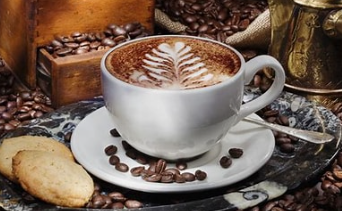

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">1. Text Representation:</h2>
  <p>Transform product descriptions into numerical vectors. This allows the computer to compare different products based on their textual content.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">2. User Profile Creation:</h2>
  <p>Create a user profile by averaging or summing the vectors of products that the user has rated positively. This profile represents the user’s preferences.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">3. Similarity Calculation:</h2>
  <p>Calculate the similarity between the user’s profile vector and the vectors of other products. This helps identify products that closely match the user’s preferences.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">4. Generating Recommendations:</h2>
  <p>Based on the similarity scores, recommend products that are most similar to those the user already likes.</p>
</div>


In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Załóżmy, że 'df' to nasz DataFrame zawierający informacje o produktach
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['cleaned_text'])


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Building the User Profile</h1>

  <p>This function creates a user profile by aggregating the TF-IDF vectors of products that the user has rated positively.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">1. Fetch User Ratings:</h2>
  <p>First, the function retrieves the ratings provided by the specified user from the `user_product_matrix_sample`. It filters out only the positive ratings, as these represent the products the user likes.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">2. Identify Relevant Products:</h2>
  <p>Next, it identifies the indices of these positively rated products in the `tfidf_matrix`, which contains the TF-IDF vectors for all products.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">3. Aggregate the Vectors:</h2>
  <p>The function then builds the user profile by multiplying the TF-IDF vectors of these products by the corresponding ratings. It sums these weighted vectors to create a composite vector.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">4. Normalize the Profile:</h2>
  <p>Finally, the function normalizes the user profile by dividing the composite vector by the sum of the positive ratings, ensuring the profile accurately represents the user's preferences.</p>
</div>


In [209]:
def build_user_profile(user_id, user_product_matrix_sample, tfidf_matrix):
    # Pobierz oceny użytkownika
    user_ratings = user_product_matrix_sample.loc[user_id]
    positive_ratings = user_ratings[user_ratings > 0]  # Filtrujemy tylko pozytywne oceny
    
    # Znajdź indeksy odpowiadające ocenom pozytywnym w tfidf_matrix
    product_indices = [user_product_matrix_sample.columns.get_loc(pid) for pid in positive_ratings.index]
    
    # Zbuduj profil użytkownika na podstawie pozytywnych ocen
    user_profile = tfidf_matrix[product_indices].multiply(positive_ratings.values[:, None]).sum(axis=0)
    user_profile = user_profile / positive_ratings.sum()
    return user_profile


In [210]:
df_sample.head()

,UserId,ProductId,Score
414314,A3SQICIS9VTTCP,B0000TL5WS,5.0
188683,A2A6N58793821F,B001P1YWWK,5.0
23039,A15ODAWAVJLJ3V,B005XB5K0G,5.0
216837,A2GTIFY34FM10D,B002C50X1M,4.0
74876,A1IKOG44PHFNYS,B0049Z5OSK,5.0


In [211]:
import pandas as pd


# Połączenie df_sample z df_full na podstawie kolumn UserId i ProductId
merged_df = pd.merge(df_sample, df[['UserId', 'ProductId', 'Text','cleaned_text']], on=['UserId', 'ProductId'])

# Wyświetlenie wynikowego DataFrame
merged_df


,UserId,ProductId,Score,Text,cleaned_text
0,A3SQICIS9VTTCP,B0000TL5WS,5.0,These crepes are simple to use. When I want to make something simple and light. I pull out Melissa's crepes. I've made some good crepe dinners and my family likes the outcome.<br />I found Melissa's crepes once at my grocery store. Went back they didn't have anymore. Checked out other grocery stores and nothing. So I tried Amazon and found the crepes. Thanks Amazon.,these crepes are simple to use when i want to make something simple and light i pull out melissa s crepes i ve made some good crepe dinners and my family likes the outcome br i found melissa s crepes once at my grocery store went back they didn t have anymore checked out other grocery stores and nothing so i tried amazon and found the crepes thanks amazon
1,A2A6N58793821F,B001P1YWWK,5.0,This product is superior in every way. It is as good as the advertising; unheard of. Amen,this product is superior in every way it is as good as the advertising unheard of amen
2,A15ODAWAVJLJ3V,B005XB5K0G,5.0,"I sent this to my husband Overseas, because these are not available there. Him and his Coworkers loved it! Great taste!",i sent this to my husband overseas because these are not available there him and his coworkers loved it great taste
3,A2GTIFY34FM10D,B002C50X1M,4.0,"I like these chips, even though they are a little different than chips I am used to. I love that they are reduced fat, but be warned, they are extremely crunchy. So crunchy that I have to turn the volume up on the TV to hear it when I'm chewing them. The taste is quite good though and I like crunchy salty food. I will probably order them again.",i like these chips even though they are a little different than chips i am used to i love that they are reduced fat but be warned they are extremely crunchy so crunchy that i have to turn the volume up on the tv to hear it when i m chewing them the taste is quite good though and i like crunchy salty food i will probably order them again
4,A1IKOG44PHFNYS,B0049Z5OSK,5.0,"Butter Toffee is not a flavor I thought I would like - for some reason the name makes me think of an icky flavor. However, I became hooked at first bite. This flavor is much sweeter than the Honey Roasted. It certainly becomes my top ""dessert almonds"" when in need of that sweet replacement.<br /><br />Absolutely great for those on a low-carb or Keto diet - only 6 Net Carbs per serving. The bold, sweet flavor keeps you satisfied after only a small amount.<br /><br />Highly recommended!",butter toffee is not a flavor i thought i would like for some reason the name makes me think of an icky flavor however i became hooked at first bite this flavor is much sweeter than the honey roasted it certainly becomes my top dessert almonds when in need of that sweet replacement br br absolutely great for those on a low carb or keto diet only 6 net carbs per serving the bold sweet flavor keeps you satisfied after only a small amount br br highly recommended
...,...,...,...,...,...
14726,A2XP3UYK4UNFYL,B002YJ0118,5.0,"This popcorn is delicious!!! It was very easy to use, and everyone we had over loved it. They shipped it a few days before we were expecting, however, I thought the shipping cost was too much.",this popcorn is delicious it was very easy to use and everyone we had over loved it they shipped it a few days before we were expecting however i thought the shipping cost was too much
14727,A1CY9X51V3V47H,B0006VB3S6,3.0,"All of my dogs went nuts when I gave this to my 55 lb., only 5 month old, German Shepherd puppy. I have a 15 lb Bichon and a 4lb Yorkie-Poo. They were willing to (literally) walk into the Big Bad Wolf's den. So, the dogs go nuts over this. I do not. It stinks. I cannot stand the smell of it. Perhaps if you have an ""outside"" dog this would be fine...but, no, it would attract skunks and raccoons. You have to REALLY LOVE YOUR DOG if you are willing to put up with the smell. (bully sticks are nothing compared to these) And, to a

In [212]:
import pandas as pd

# Zakładam, że 'df_sample' to Twoje dane
# Ustawienia do wyświetlania pełnych wartości w kolumnach
pd.set_option('display.max_colwidth', None)

# Wybór 100 wierszy i wyświetlenie tylko kolumn UserId i Summary
sample_summary = merged_df[['UserId', 'Text']].head(100)

sample_summary


,UserId,Text
0,A3SQICIS9VTTCP,These crepes are simple to use. When I want to make something simple and light. I pull out Melissa's crepes. I've made some good crepe dinners and my family likes the outcome.<br />I found Melissa's crepes once at my grocery store. Went back they didn't have anymore. Checked out other grocery stores and nothing. So I tried Amazon and found the crepes. Thanks Amazon.
1,A2A6N58793821F,This product is superior in every way. It is as good as the advertising; unheard of. Amen
2,A15ODAWAVJLJ3V,"I sent this to my husband Overseas, because these are not available there. Him and his Coworkers loved it! Great taste!"
3,A2GTIFY34FM10D,"I like these chips, even though they are a little different than chips I am used to. I love that they are reduced fat, but be warned, they are extremely crunchy. So crunchy that I have to turn the volume up on the TV to hear it when I'm chewing them. The taste is quite good though and I like crunchy salty food. I will probably order them again."
4,A1IKOG44PHFNYS,"Butter Toffee is not a flavor I thought I would like - for some reason the name makes me think of an icky flavor. However, I became hooked at first bite. This flavor is much sweeter than the Honey Roasted. It certainly becomes my top ""dessert almonds"" when in need of that sweet replacement.<br /><br />Absolutely great for those on a low-carb or Keto diet - only 6 Net Carbs per serving. The bold, sweet flavor keeps you satisfied after only a small amount.<br /><br />Highly recommended!"
...,...,...
95,A3Q57R59YQUC14,The stores that use to stock this item no longer carry it. I don't know why. Thank you AMAZON. I have been drinking this for years and now I don't have to worry about not finding it. I LOVE IT !!!!
96,A3UKLX2A9T589C,I have to say that if you are a fan of the energy drink with the initials R B (moo) then you will be a HUGE fan of this. The flavor is a perfect match. I am so hooked that I will never spend a dime in the store for the name brand again.
97,A2770QFX87C5W5,"These treats are one of my dog's favorites! I like this company, they make a lot of great treats, and the ingredients are from the U.S."
98,A23P5BO1UGNIRR,"i came to discover the wonders of tomato soup somewhat late in life, but became fixated. I was very sad when Costco's Kirkland brand stopped selling their tomato soup, which i just loved. I learned it was actually made by the Campbell's Company, but the ingredients appeared to be specially mixed for Costco, and I've found no equivalent in other Campbell's many tomato soup offerings, which don't taste so good. I don't know why Kirkland's canned tomato soup disappeared from my Costco, but it has now been a long, sad, taste journey for me, through many many cans of brands and tubs of specialty-type tomato soups. I was a bit leary of the Wolfgang Puck label, because I tried one soup variety previously, and found it extremely salty. However, this was on sale, and i had not found a reasonable tomato soup substitute.<br /><br />so, WOW. i'm so relieved i found this soup. It's delish and rich. The consistency is great (smooth, but with texture) and you can really taste the blend of cream and butter that really complements the tomato to make the overall flavor soooo delicious--almost cheesy (my son asked if I had added parmesan). it's also a great plus that the ingredients are simple and clean (and organic). I heartily recommend this soup. i certainly will be ordering it from now on using subscribe and save. Great job, Mr. Puck."


In [213]:
# Zakładając, że merged_df jest już załadowany
user_id = 'AA31RF0PPKOUU'

# Filtracja DataFrame, aby uzyskać tylko wiersze dla danego użytkownika
user_texts = merged_df[merged_df['UserId'] == user_id]['Text']

# Wyświetlenie wyników
print(user_texts)


582    I've been very happy with Coffee Bean Direct, which is why I'm so disappointed by the poor quality of this blend, which I only bought because my usual blend (Nicaraguan Shade-grown) was out of stock.  Upon opening the bag, there was hardly any aroma at all, and the taste is bland. I've had other brands of Sumatra, which is normally a stronger coffee, but this was just awful... like the brown water that diners try to pass off as coffee.
Name: Text, dtype: object


In [214]:
# Przykład: budowanie profilu użytkownika
user_id = 'AA31RF0PPKOUU'
user_profile = build_user_profile(user_id, user_product_matrix_sample, tfidf_matrix)

In [215]:
user_profile

matrix([[0., 0., 0., ..., 0., 0., 0.]])

3. Obliczanie Podobieństwa i Rekomendacje
Porównujemy profil użytkownika z wektorami TF-IDF wszystkich produktów, aby znaleźć najbardziej podobne produkty.

In [216]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_products(user_profile, tfidf_matrix, top_n=5):
    cosine_similarities = cosine_similarity(user_profile, tfidf_matrix)
    similar_indices = cosine_similarities.argsort().flatten()[-top_n:]
    similar_items = merged_df.iloc[similar_indices].index
    return merged_df['ProductId'].iloc[similar_items]

# Przykład rekomendacji dla użytkownika
recommended_products = recommend_products(user_profile, tfidf_matrix)
print(recommended_products)


2393     B0090X8IPM
12690    B002WDCAJ2
11082    B002WDCIXK
4021     B000XS90HS
6544     B009KAQW12
Name: ProductId, dtype: object


C:\Users\weron\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



In [217]:
# Lista rekomendowanych produktów
recommended_products = [
    'B0090X8IPM',
    'B002WDCAJ2',
    'B002WDCIXK',
    'B000XS90HS',
    'B009KAQW12'
]

# Filtracja DataFrame, aby uzyskać tylko wiersze dla rekomendowanych produktów
recommended_texts = merged_df[merged_df['ProductId'].isin(recommended_products)][['ProductId', 'Text']]

# Wyświetlenie wyników
recommended_texts


,ProductId,Text
1011,B0090X8IPM,"I just want to preface this review by noting that I do stop into Starbucks and get flavored coffees (current favorite, Peppermint Mocha, whipped cream on top). So I had positive expectations of a vanilla flavored coffee. Unfortunately, this was among the worst Starbucks blends I've ever tasted. Just to give it a fair shot, I tried brewing and drinking it four different ways:<br /><br />1.Mild with no sugar or cream<br />2. Strong with no sugar or cream<br />3. Mild with sugar and cream<br />4. Strong with sugar and cream<br /><br />I also had friends taste test this. We all hated it. We couldn't choke it down as it was truly bitter and unpleasant. Maybe we got a bad batch or bag. At this point, we have nearly a whole bag left and I'm feeling guilty about wasting it. But there is no way I'm going to brew another pot of coffee and try to create a tasty brew. I tend to like my coffee extremely strong but even making it overly strong did not make it better. Yes, the vanilla flavor came through but it wasn't a good addition to a possibly decent coffee (without the vanilla)."
1839,B0090X8IPM,"If you are an avid Starbuck's coffee drinker, the Natural Fusions coffee is not for you. Plain and simple. Now, if you are a Starbuck's drinker and looking for a good 'out the door' coffee that will hold you until you get to your local Starbuck's store, then this coffee is a good choice. I liken the Starbuck's bagged coffees versus the chain offerings to bottled Coca Cola versus fountain Coca Cola. The former is fantastic and the latter is just okay.<br /><br />I actually found myself using a few more scoops of the bagged Natural Fusions coffee in an attempt to make it taste more like the original. I guess if I didn't know how good the real thing was, I would have given this coffee at least 4 stars. It's good, but not nearly as good as the real thing. Is it better than other bagged choices out there? Not as good as the best offerings, in my opinion, but better than most."
2393,B0090X8IPM,"I've tried three different flavors of Starbucks ""Natural Fusions"" coffee so far. Even though I love cinnamon and sometimes add some ground cinnamon to my coffee grounds to flavor regular coffee, I didn't much care for the flavor of Starbucks cinnamon flavored coffee. This vanilla flavor is pretty good, however, though I will say that I don't like it enough to buy it again. The real winner of the three is the caramel flavor. While drinking it won't make you think you're eating a caramel candy, it does have a very pleasing flavor whether consumed hot or cold. That's the only flavor of the three that I have purchased repeatedly and will purchase again.<br /><br />As for the underlying coffee flavor of this particular flavor, I think it suffices to say that it tastes like a medium roasted Starbucks coffee. I happen to like Starbucks' coffee beans, but I know some people don't care for the brand. If you're a fan of Starbucks, this roast/flavor is consistent with what you've come to expect from them."
3242,B002WDCAJ2,"Over the years that I have had my Tassimo system; I have tried every brand and variety of coffee & tea made for it. The Starbucks brand is the most consistent of all the brands. Each of the flavors is accurately described. The Verona is a bold and earthy blend that will not disappoint if you usually stop at your local SB for a cup of strong coffee.<br /><br />If I want a more serious kick without going to an expresso, I simply press the button on the Tassimo when it is half-way done brewing and it gives an extra bold, but not bitter (half)cup of coffee.<br /><br />Lastly, I have yet to have one of the SB's T-Disc fail (fail = very inconsistent flavor from disc to disc, or inconsistent quantity of coffee to water, or out-right failure of the disc) which happens too often with the other brands."
4021,B000XS90HS,"This coffee is really good! It has a good flavor and is strong. One T-disc just about fills up a coffee mug t

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Sentiment analysis

</div>

In [218]:
from textblob import TextBlob
import pandas as pd

# Załóżmy, że masz DataFrame o nazwie merged_df z kolumną 'Text'

# Funkcja do klasyfikacji sentymentu
def classify_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Dodanie kolumny 'Sentiment' do DataFrame
merged_df['Sentiment'] = merged_df['cleaned_text'].apply(classify_sentiment)


In [219]:
# Filtracja wierszy z negatywnym sentymentem
negative_sentiments = merged_df[merged_df['Sentiment'] == 'negative']

# Wyświetlenie pierwszych 5 wierszy
negative_sentiments.tail(5)


,UserId,ProductId,Score,Text,cleaned_text,Sentiment
14692,A309JZ2IS6QCOH,B003Y8HVES,2.0,"I was really surprised when I looked online and saw that I only found positive reviews about these things!!!! Quite frankly, I found the orange flavor weak, and it tasted just like the regular orange flavor, except worse. I can't tell the difference between these and other orange candies, but they are a bit bitter, and again, the orange flavor is rather weak. I'm not sure why others wrote positive reviews about them, since I am a bit of a candy nut. I'm looking forward to reading other reviews.<br />I found these a poor value for the money, and the candy was MEDIOCRE at best.<br />Look elsewhere for orange candy!",i was really surprised when i looked online and saw that i only found positive reviews about these things quite frankly i found the orange flavor weak and it tasted just like the regular orange flavor except worse i can t tell the difference between these and other orange candies but they are a bit bitter and again the orange flavor is rather weak i m not sure why others wrote positive reviews about them since i am a bit of a candy nut i m looking forward to reading other reviews br i found these a poor value for the money and the candy was mediocre at best br look elsewhere for orange candy,negative
14696,A2U9B9WLNSWRLA,B002FBH0AK,2.0,"I found this product to be unacceptable.<br />The first criticism goes to the flavor which I found to be missing. The product is supposed to have an orange flavor. I find it very weak. I prefer a more robust flavor. Secondly, to put it as delicately as I can, I believe it caused me lower abdominal distress.<br />I will be canceling my second shipment. I drank four cans and had the same experience with each.",i found this product to be unacceptable br the first criticism goes to the flavor which i found to be missing the product is supposed to have an orange flavor i find it very weak i prefer a more robust flavor secondly to put it as delicately as i can i believe it caused me lower abdominal distress br i will be canceling my second shipment i drank four cans and had the same experience with each,negative
14697,A16V6UJZPEYTPX,B000FDLBLY,2.0,"I'm very much in line with the other reviewer here on his preferences concerning sardines, but I can agree only until the last paragraph of his review. I had a different experience with Vigo Sardines that leads me to a different conclusion and it starts with the condition of the cans themselves.<br /><br />The boxes were shiny yellow, clean, and not dented, perhaps thanks to Amazon plastic wrap and packaging. When I removed a can from it's individual box for my second meal of them I found it was quite sticky. So I removed them all from their individual boxes and found more stickiness and also dark spotting.<br /><br />Now I had already opened and eaten one can that happened to have the least problems, so it caused no real concern. I do wish I had opened another box first though. I'm able to comment on the taste, without being clouded by the -ick- factor of the dirty tins themselves: The delicate and more complex flavors of Spanish and Portuguese Sardines were just not there...the flavors were dead really and there was a hint of a tinny aftertaste. The fish themselves were not in the grandest condition either but they were plump and firm. It was a disappointment all around. I gave it two stars because it seems I'm the only one with a sticky and spotted can issue. It does make me wonder at the standards used during processing. In any case [...] based on flavor and presentation and will not be trying Vigo sardines again.",i m very much in line with the other reviewer here on his preferences concerning sardines but i can agree only until the last paragraph of his review i had a different experience with vigo sardines that leads me to a different conclusion and it starts with the condition of the cans themselves br br the boxes were shiny yellow clean and not dent

In [220]:
merged_df.head()

,UserId,ProductId,Score,Text,cleaned_text,Sentiment
0,A3SQICIS9VTTCP,B0000TL5WS,5.0,These crepes are simple to use. When I want to make something simple and light. I pull out Melissa's crepes. I've made some good crepe dinners and my family likes the outcome.<br />I found Melissa's crepes once at my grocery store. Went back they didn't have anymore. Checked out other grocery stores and nothing. So I tried Amazon and found the crepes. Thanks Amazon.,these crepes are simple to use when i want to make something simple and light i pull out melissa s crepes i ve made some good crepe dinners and my family likes the outcome br i found melissa s crepes once at my grocery store went back they didn t have anymore checked out other grocery stores and nothing so i tried amazon and found the crepes thanks amazon,positive
1,A2A6N58793821F,B001P1YWWK,5.0,This product is superior in every way. It is as good as the advertising; unheard of. Amen,this product is superior in every way it is as good as the advertising unheard of amen,positive
2,A15ODAWAVJLJ3V,B005XB5K0G,5.0,"I sent this to my husband Overseas, because these are not available there. Him and his Coworkers loved it! Great taste!",i sent this to my husband overseas because these are not available there him and his coworkers loved it great taste,positive
3,A2GTIFY34FM10D,B002C50X1M,4.0,"I like these chips, even though they are a little different than chips I am used to. I love that they are reduced fat, but be warned, they are extremely crunchy. So crunchy that I have to turn the volume up on the TV to hear it when I'm chewing them. The taste is quite good though and I like crunchy salty food. I will probably order them again.",i like these chips even though they are a little different than chips i am used to i love that they are reduced fat but be warned they are extremely crunchy so crunchy that i have to turn the volume up on the tv to hear it when i m chewing them the taste is quite good though and i like crunchy salty food i will probably order them again,positive
4,A1IKOG44PHFNYS,B0049Z5OSK,5.0,"Butter Toffee is not a flavor I thought I would like - for some reason the name makes me think of an icky flavor. However, I became hooked at first bite. This flavor is much sweeter than the Honey Roasted. It certainly becomes my top ""dessert almonds"" when in need of that sweet replacement.<br /><br />Absolutely great for those on a low-carb or Keto diet - only 6 Net Carbs per serving. The bold, sweet flavor keeps you satisfied after only a small amount.<br /><br />Highly recommended!",butter toffee is not a flavor i thought i would like for some reason the name makes me think of an icky flavor however i became hooked at first bite this flavor is much sweeter than the honey roasted it certainly becomes my top dessert almonds when in need of that sweet replacement br br absolutely great for those on a low carb or keto diet only 6 net carbs per serving the bold sweet flavor keeps you satisfied after only a small amount br br highly recommended,positive


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Incorporating Sentiments into User Profile</h1>

  <p>This approach enhances the user profile by considering sentiment analysis, giving more weight to positively received products.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">1. Select Positive Reviews:</h2>
  <p>We start by filtering the reviews, selecting only those with a positive sentiment from the `merged_df` DataFrame. These reviews will be used to build the user profile.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">2. Create TF-IDF Matrix:</h2>
  <p>A TF-IDF matrix is generated from the text of the positive reviews, capturing the key features of the content that users have responded positively to.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">3. Build the User Profile:</h2>
  <p>The `build_user_profile` function then aggregates the TF-IDF vectors of products that the user has rated positively, adjusting these vectors according to the user's ratings. The sentiment information helps emphasize the most positively viewed products.</p>
</div>


In [221]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Załóżmy, że masz DataFrame o nazwie merged_df z kolumną 'Text' oraz 'Sentiment'

# Weźmy tylko pozytywne opinie do budowania profilu użytkownika
positive_reviews = merged_df[merged_df['Sentiment'] == 'positive']

# Tworzenie TF-IDF Matrix na podstawie pozytywnych recenzji
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(positive_reviews['Text'])

# Funkcja do budowania profilu użytkownika z uwzględnieniem sentymentu
def build_user_profile(user_id, user_product_matrix_sample, tfidf_matrix, sentiment_matrix):
    # Pobierz oceny użytkownika
    user_ratings = user_product_matrix_sample.loc[user_id]
    positive_ratings = user_ratings[user_ratings > 0]  # Filtrujemy tylko pozytywne oceny

    # Znajdź indeksy odpowiadające ocenom pozytywnym w tfidf_matrix
    product_indices = [user_product_matrix_sample.columns.get_loc(pid) for pid in positive_ratings.index]
    
    # Zbuduj profil użytkownika na podstawie pozytywnych ocen
    user_profile = tfidf_matrix[product_indices].multiply(positive_ratings.values[:, None]).sum(axis=0)
    user_profile = user_profile / positive_ratings.sum()
    
    return user_profile



In [222]:
# Przykład budowania profilu użytkownika
user_id = 'AA31RF0PPKOUU'
user_profile = build_user_profile(user_id, user_product_matrix_sample, tfidf_matrix, merged_df)


In [223]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_products(user_profile, tfidf_matrix, top_n=1):
    cosine_similarities = cosine_similarity(user_profile, tfidf_matrix)
    similar_indices = cosine_similarities.argsort().flatten()[-top_n:]
    similar_items = merged_df.iloc[similar_indices].index
    return merged_df['ProductId'].iloc[similar_items]

# Przykład rekomendacji dla użytkownika
recommended_products = recommend_products(user_profile, tfidf_matrix)
print(recommended_products)


6544    B009KAQW12
Name: ProductId, dtype: object


C:\Users\weron\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



In [224]:
# Lista rekomendowanych produktów
recommended_products = [

   
   
    'B009KAQW12'
]

# Filtracja DataFrame, aby uzyskać tylko wiersze dla rekomendowanych produktów
recommended_texts = merged_df[merged_df['ProductId'].isin(recommended_products)][['ProductId', 'Text']]

# Wyświetlenie wyników
recommended_texts

,ProductId,Text
6544,B009KAQW12,"This cappuccino is very good and tastes almost as good as Starbucks Latte Primo, T-Discs for Tassimo Coffeemakers, 8 Count Packages (Pack of 2). The cream foams up well in the Tassimo machine. The only difference in taste between this Cappuccino drink and the Starbucks Latte Primo is that the coffee flavor is slightly stronger in the Starbucks product. Also, with the Cappuccino you brew the coffee first and then use the milk disc. With the Starbucks Latte Primo you brew the milk first then the coffee.<br /><br />Overall, I think this is a bargain buy. As long as you are not looking for a slightly stronger coffee flavor, I'd suggest purchasing this instead of the Starbucks brand as both products use expresso coffee and milk discs."


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Topic modelling

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>

  <p>Topic modeling is a powerful technique used to uncover hidden themes or topics within a collection of documents. It helps in identifying the main subjects that a set of texts discusses, allowing for deeper insights into the content.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">1. What is Topic Modeling?</h2>
  <p>Topic modeling is a type of statistical model that analyzes the words in texts to discover the abstract "topics" that appear in them. It assumes that each document in a corpus is a mixture of a small number of topics, and each topic is a mixture of words.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">2. Applications in User Reviews:</h2>
  <p>When applied to user reviews, topic modeling can reveal the underlying themes that customers are discussing. This can help businesses understand the aspects of products that matter most to users, such as quality, price, or specific features.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">3. Using LDA and NMF:</h2>
  <p>Two common algorithms for topic modeling are Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF). LDA is a generative probabilistic model that assumes documents are a mixture of topics, and NMF is a matrix factorization technique that identifies topics based on patterns of word co-occurrence.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">4. Enhancing User Profiles:</h2>
  <p>By integrating the topics discovered through these models, we can enrich user profiles with additional features, making recommendations more personalized. Topics can also be used to cluster products, helping users find items related to their interests.</p>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Latent Dirichlet Allocation (LDA) Implementation</h1>

  <p>Latent Dirichlet Allocation (LDA) is a probabilistic generative model that assumes documents are composed of a mixture of topics, and topics are composed of a mixture of words. This method helps in identifying the hidden themes in a collection of texts.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">1. Text Preparation:</h2>
  <p>First, we need to transform the text data into a format that LDA can process. Using `CountVectorizer`, the text in the 'cleaned_text' column of the `merged_df` DataFrame is converted into a document-term matrix (`dtm`). This matrix represents the frequency of words in each document, with common English stop words removed.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">2. Training the LDA Model:</h2>
  <p>We then train the LDA model by specifying the number of topics (`n_components=30`) we want to discover. The `lda.fit(dtm)` function learns the topic distribution for each document and the word distribution for each topic based on the input data.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">3. Extracting Top Words for Each Topic:</h2>
  <p>Finally, we can explore the topics generated by the model. For each topic, we identify the top 10 words that are most representative. The words are ranked by their importance in the topic, and the top 10 are printed for each identified topic.</p>
  
  <p>This process allows us to understand the main themes discussed in the reviews, which can be further used for enhancing user profiles or improving product recommendations.</p>
</div>


In [225]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Załóżmy, że 'merged_df' zawiera nasze opinie w kolumnie 'cleaned_text'

# Przekształcenie tekstu do formatu, który LDA może przetwarzać
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(merged_df['cleaned_text'])

# Trenowanie modelu LDA
lda = LatentDirichletAllocation(n_components=30, random_state=42)
lda.fit(dtm)

# Wyświetlanie top 10 słów dla każdego tematu
num_words = 2
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print(" ".join([words[i] for i in topic.argsort()[-num_words:]]))
    print("\n")


Topic 0:
jerky smell


Topic 1:
taste water


Topic 2:
br like


Topic 3:
br hair


Topic 4:
order product


Topic 5:
price cat


Topic 6:
flavor br


Topic 7:
gluten br


Topic 8:
flavor coffee


Topic 9:
soup rice


Topic 10:
green tea


Topic 11:
cookies chocolate


Topic 12:
br food


Topic 13:
cup coffee


Topic 14:
price product


Topic 15:
great amazon


Topic 16:
taste br


Topic 17:
just br


Topic 18:
just candy


Topic 19:
bread mix


Topic 20:
great popcorn


Topic 21:
product br


Topic 22:
buy store


Topic 23:
free sugar


Topic 24:
like chips


Topic 25:
food br


Topic 26:
fat br


Topic 27:
dogs treats


Topic 28:
com amazon


Topic 29:
br sauce




<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Improving Topic Quality in LDA</h1>

  <p>It's common to encounter topics that seem unclear or contain words that appear irrelevant (like "amazon" or "br") when performing topic modeling, especially when working with diverse data or text with many general expressions. Here are some steps you can take to improve the quality of the topics generated:</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">1. Text Data Cleaning:</h2>
  <p><strong>Expanding the Stop Words List:</strong> Enhance the list of stop words by adding terms that frequently appear but do not carry meaningful semantic value, such as "br," "amazon," "com," or "product." This can be done manually or by using pre-made stop word lists.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">2. Filtering Frequent and Rare Words:</h2>
  <p>To exclude overly common or overly rare words, you can adjust the parameters in `CountVectorizer`. Consider lowering the `max_df` value and raising the `min_df` value to filter out words that are either too frequent or too infrequent across the documents. This helps focus the analysis on more meaningful terms.</p>

  <p>By refining the preprocessing steps, you can significantly enhance the clarity and relevance of the topics identified in your analysis.</p>
</div>


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from tqdm import tqdm  # Przydatne do paska postępu

# Zakładając, że df jest twoim DataFrame

def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Usuń znaki specjalne
    text = re.sub(r'\s+', ' ', text)  # Usuń nadmiar białych znaków
    text = text.lower()  # Konwertuj na małe litery
    return text

def tokenize_and_remove_stopwords(text, additional_stop_words=set()):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Usuń cyfry
    stop_words = set(stopwords.words('english'))
    # Dodaj dodatkowe słowa do listy stop words
    all_stop_words = stop_words.union(additional_stop_words)
    tokens = [word for word in tokens if word not in all_stop_words]
    return tokens

# Dodatkowe słowa do wykluczenia
additional_stop_words = {'amazon', 'product', 'order', 'br', 'com', 'store', 'buy'}

# Dodaj pasek postępu
total_rows = len(df)
processed_rows = 0

# Lista na przetworzone dane
cleaned_texts = []
tokens_list = []
cleaned_texts1 = []

# Przetwarzanie danych z monitorem postępu
for index, row in tqdm(df.iterrows(), total=total_rows, desc="Przetwarzanie"):
    cleaned_text = clean_text(row['Text'])
    tokens = tokenize_and_remove_stopwords(cleaned_text)
    cleaned_text1 = ' '.join(tokenize_and_remove_stopwords(cleaned_text, additional_stop_words))
    cleaned_texts.append(cleaned_text)
    tokens_list.append(tokens)
    cleaned_texts1.append(cleaned_text1)
    processed_rows += 1

    # Opcjonalnie: Wydrukuj status co 1000 wierszy
    if processed_rows % 1000 == 0 or processed_rows == total_rows:
        print(f"Przetworzono {processed_rows} z {total_rows} wierszy ({(processed_rows / total_rows) * 100:.2f}%).")

# Dodanie wyników do DataFrame
df['cleaned_text'] = cleaned_texts
df['tokens'] = tokens_list
df['cleaned_text1'] = cleaned_texts1


Przetwarzanie:   0%|          | 1039/568454 [00:03<18:32, 510.14it/s] 

Przetworzono 1000 z 568454 wierszy (0.18%).


Przetwarzanie:   0%|          | 2109/568454 [00:05<17:04, 552.84it/s]

Przetworzono 2000 z 568454 wierszy (0.35%).


Przetwarzanie:   1%|          | 3059/568454 [00:07<18:27, 510.37it/s]

Przetworzono 3000 z 568454 wierszy (0.53%).


Przetwarzanie:   1%|          | 4113/568454 [00:09<18:15, 515.12it/s]

Przetworzono 4000 z 568454 wierszy (0.70%).


Przetwarzanie:   1%|          | 5118/568454 [00:11<17:51, 525.60it/s]

Przetworzono 5000 z 568454 wierszy (0.88%).


Przetwarzanie:   1%|          | 6062/568454 [00:12<18:10, 515.53it/s]

Przetworzono 6000 z 568454 wierszy (1.06%).


Przetwarzanie:   1%|          | 7082/568454 [00:14<19:04, 490.42it/s]

Przetworzono 7000 z 568454 wierszy (1.23%).


Przetwarzanie:   1%|▏         | 8052/568454 [00:16<18:14, 511.80it/s]

Przetworzono 8000 z 568454 wierszy (1.41%).


Przetwarzanie:   2%|▏         | 9077/568454 [00:18<20:15, 460.06it/s]

Przetworzono 9000 z 568454 wierszy (1.58%).


Przetwarzanie:   2%|▏         | 10058/568454 [00:20<19:36, 474.76it/s]

Przetworzono 10000 z 568454 wierszy (1.76%).


Przetwarzanie:   2%|▏         | 11082/568454 [00:22<17:49, 520.93it/s]

Przetworzono 11000 z 568454 wierszy (1.94%).


Przetwarzanie:   2%|▏         | 12059/568454 [00:24<19:48, 467.95it/s]

Przetworzono 12000 z 568454 wierszy (2.11%).


Przetwarzanie:   2%|▏         | 13079/568454 [00:26<17:21, 533.12it/s]

Przetworzono 13000 z 568454 wierszy (2.29%).


Przetwarzanie:   2%|▏         | 14064/568454 [00:28<18:09, 509.03it/s]

Przetworzono 14000 z 568454 wierszy (2.46%).


Przetwarzanie:   3%|▎         | 15077/568454 [00:30<18:25, 500.64it/s]

Przetworzono 15000 z 568454 wierszy (2.64%).


Przetwarzanie:   3%|▎         | 16074/568454 [00:32<19:39, 468.26it/s]

Przetworzono 16000 z 568454 wierszy (2.81%).


Przetwarzanie:   3%|▎         | 17109/568454 [00:34<17:37, 521.14it/s]

Przetworzono 17000 z 568454 wierszy (2.99%).


Przetwarzanie:   3%|▎         | 18093/568454 [00:36<19:00, 482.54it/s]

Przetworzono 18000 z 568454 wierszy (3.17%).


Przetwarzanie:   3%|▎         | 19091/568454 [00:38<16:27, 556.16it/s]

Przetworzono 19000 z 568454 wierszy (3.34%).


Przetwarzanie:   4%|▎         | 20112/568454 [00:40<16:29, 554.14it/s]

Przetworzono 20000 z 568454 wierszy (3.52%).


Przetwarzanie:   4%|▎         | 21080/568454 [00:42<17:50, 511.37it/s]

Przetworzono 21000 z 568454 wierszy (3.69%).


Przetwarzanie:   4%|▍         | 22037/568454 [00:44<20:42, 439.91it/s]

Przetworzono 22000 z 568454 wierszy (3.87%).


Przetwarzanie:   4%|▍         | 23044/568454 [00:46<21:06, 430.68it/s]

Przetworzono 23000 z 568454 wierszy (4.05%).


Przetwarzanie:   4%|▍         | 24081/568454 [00:48<17:30, 518.04it/s]

Przetworzono 24000 z 568454 wierszy (4.22%).


Przetwarzanie:   4%|▍         | 25106/568454 [00:50<16:31, 548.02it/s]

Przetworzono 25000 z 568454 wierszy (4.40%).


Przetwarzanie:   5%|▍         | 26094/568454 [00:52<16:02, 563.63it/s]

Przetworzono 26000 z 568454 wierszy (4.57%).


Przetwarzanie:   5%|▍         | 27079/568454 [00:54<18:44, 481.27it/s]

Przetworzono 27000 z 568454 wierszy (4.75%).


Przetwarzanie:   5%|▍         | 28052/568454 [00:56<16:36, 542.37it/s]

Przetworzono 28000 z 568454 wierszy (4.93%).


Przetwarzanie:   5%|▌         | 29071/568454 [00:58<20:43, 433.60it/s]

Przetworzono 29000 z 568454 wierszy (5.10%).


Przetwarzanie:   5%|▌         | 30083/568454 [01:00<18:06, 495.39it/s]

Przetworzono 30000 z 568454 wierszy (5.28%).


Przetwarzanie:   5%|▌         | 31081/568454 [01:02<15:59, 560.32it/s]

Przetworzono 31000 z 568454 wierszy (5.45%).


Przetwarzanie:   6%|▌         | 32067/568454 [01:03<15:20, 582.78it/s]

Przetworzono 32000 z 568454 wierszy (5.63%).


Przetwarzanie:   6%|▌         | 33087/568454 [01:06<17:02, 523.36it/s]

Przetworzono 33000 z 568454 wierszy (5.81%).


Przetwarzanie:   6%|▌         | 34092/568454 [01:08<16:21, 544.56it/s]

Przetworzono 34000 z 568454 wierszy (5.98%).


Przetwarzanie:   6%|▌         | 35068/568454 [01:09<19:19, 459.95it/s]

Przetworzono 35000 z 568454 wierszy (6.16%).


Przetwarzanie:   6%|▋         | 36043/568454 [01:11<18:44, 473.34it/s]

Przetworzono 36000 z 568454 wierszy (6.33%).


Przetwarzanie:   7%|▋         | 37100/568454 [01:14<19:08, 462.82it/s]

Przetworzono 37000 z 568454 wierszy (6.51%).


Przetwarzanie:   7%|▋         | 38074/568454 [01:16<19:08, 461.88it/s]

Przetworzono 38000 z 568454 wierszy (6.68%).


Przetwarzanie:   7%|▋         | 39103/568454 [01:18<17:53, 493.32it/s]

Przetworzono 39000 z 568454 wierszy (6.86%).


Przetwarzanie:   7%|▋         | 40039/568454 [01:20<16:38, 529.38it/s]

Przetworzono 40000 z 568454 wierszy (7.04%).


Przetwarzanie:   7%|▋         | 41063/568454 [01:22<17:08, 512.80it/s]

Przetworzono 41000 z 568454 wierszy (7.21%).


Przetwarzanie:   7%|▋         | 42091/568454 [01:24<18:51, 465.15it/s]

Przetworzono 42000 z 568454 wierszy (7.39%).


Przetwarzanie:   8%|▊         | 43082/568454 [01:26<19:26, 450.39it/s]

Przetworzono 43000 z 568454 wierszy (7.56%).


Przetwarzanie:   8%|▊         | 44077/568454 [01:28<15:04, 579.80it/s]

Przetworzono 44000 z 568454 wierszy (7.74%).


Przetwarzanie:   8%|▊         | 45069/568454 [01:30<17:40, 493.50it/s]

Przetworzono 45000 z 568454 wierszy (7.92%).


Przetwarzanie:   8%|▊         | 46077/568454 [01:32<19:51, 438.45it/s]

Przetworzono 46000 z 568454 wierszy (8.09%).


Przetwarzanie:   8%|▊         | 47075/568454 [01:34<17:41, 491.15it/s]

Przetworzono 47000 z 568454 wierszy (8.27%).


Przetwarzanie:   8%|▊         | 48075/568454 [01:36<15:18, 566.65it/s]

Przetworzono 48000 z 568454 wierszy (8.44%).


Przetwarzanie:   9%|▊         | 49093/568454 [01:37<18:17, 473.21it/s]

Przetworzono 49000 z 568454 wierszy (8.62%).


Przetwarzanie:   9%|▉         | 50049/568454 [01:39<17:06, 505.19it/s]

Przetworzono 50000 z 568454 wierszy (8.80%).


Przetwarzanie:   9%|▉         | 51069/568454 [01:41<15:49, 544.64it/s]

Przetworzono 51000 z 568454 wierszy (8.97%).


Przetwarzanie:   9%|▉         | 52054/568454 [01:43<16:05, 534.85it/s]

Przetworzono 52000 z 568454 wierszy (9.15%).


Przetwarzanie:   9%|▉         | 53068/568454 [01:45<18:44, 458.40it/s]

Przetworzono 53000 z 568454 wierszy (9.32%).


Przetwarzanie:  10%|▉         | 54116/568454 [01:47<14:38, 585.54it/s]

Przetworzono 54000 z 568454 wierszy (9.50%).


Przetwarzanie:  10%|▉         | 55080/568454 [01:48<13:52, 616.94it/s]

Przetworzono 55000 z 568454 wierszy (9.68%).


Przetwarzanie:  10%|▉         | 56123/568454 [01:50<13:38, 626.11it/s]

Przetworzono 56000 z 568454 wierszy (9.85%).


Przetwarzanie:  10%|█         | 57085/568454 [01:52<15:36, 546.05it/s]

Przetworzono 57000 z 568454 wierszy (10.03%).


Przetwarzanie:  10%|█         | 58092/568454 [01:54<16:10, 526.04it/s]

Przetworzono 58000 z 568454 wierszy (10.20%).


Przetwarzanie:  10%|█         | 59054/568454 [01:56<17:20, 489.58it/s]

Przetworzono 59000 z 568454 wierszy (10.38%).


Przetwarzanie:  11%|█         | 60046/568454 [01:58<16:48, 504.31it/s]

Przetworzono 60000 z 568454 wierszy (10.55%).


Przetwarzanie:  11%|█         | 61086/568454 [02:00<16:14, 520.74it/s]

Przetworzono 61000 z 568454 wierszy (10.73%).


Przetwarzanie:  11%|█         | 62078/568454 [02:02<19:07, 441.31it/s]

Przetworzono 62000 z 568454 wierszy (10.91%).


Przetwarzanie:  11%|█         | 63092/568454 [02:04<17:35, 478.95it/s]

Przetworzono 63000 z 568454 wierszy (11.08%).


Przetwarzanie:  11%|█▏        | 64120/568454 [02:06<13:30, 622.54it/s]

Przetworzono 64000 z 568454 wierszy (11.26%).


Przetwarzanie:  11%|█▏        | 65073/568454 [02:08<13:43, 611.43it/s]

Przetworzono 65000 z 568454 wierszy (11.43%).


Przetwarzanie:  12%|█▏        | 66132/568454 [02:10<13:31, 618.93it/s]

Przetworzono 66000 z 568454 wierszy (11.61%).


Przetwarzanie:  12%|█▏        | 67080/568454 [02:12<16:19, 511.66it/s]

Przetworzono 67000 z 568454 wierszy (11.79%).


Przetwarzanie:  12%|█▏        | 68095/568454 [02:14<16:43, 498.59it/s]

Przetworzono 68000 z 568454 wierszy (11.96%).


Przetwarzanie:  12%|█▏        | 69093/568454 [02:16<13:58, 595.26it/s]

Przetworzono 69000 z 568454 wierszy (12.14%).


Przetwarzanie:  12%|█▏        | 70085/568454 [02:17<15:38, 531.24it/s]

Przetworzono 70000 z 568454 wierszy (12.31%).


Przetwarzanie:  13%|█▎        | 71083/568454 [02:19<17:11, 482.09it/s]

Przetworzono 71000 z 568454 wierszy (12.49%).


Przetwarzanie:  13%|█▎        | 72043/568454 [02:21<17:01, 486.08it/s]

Przetworzono 72000 z 568454 wierszy (12.67%).


Przetwarzanie:  13%|█▎        | 73073/568454 [02:24<15:09, 544.40it/s]

Przetworzono 73000 z 568454 wierszy (12.84%).


Przetwarzanie:  13%|█▎        | 74043/568454 [02:26<18:03, 456.41it/s]

Przetworzono 74000 z 568454 wierszy (13.02%).


Przetwarzanie:  13%|█▎        | 75114/568454 [02:28<15:41, 524.19it/s]

Przetworzono 75000 z 568454 wierszy (13.19%).


Przetwarzanie:  13%|█▎        | 76099/568454 [02:30<15:31, 528.60it/s]

Przetworzono 76000 z 568454 wierszy (13.37%).


Przetwarzanie:  14%|█▎        | 77074/568454 [02:31<16:26, 498.17it/s]

Przetworzono 77000 z 568454 wierszy (13.55%).


Przetwarzanie:  14%|█▎        | 78052/568454 [02:33<15:30, 527.24it/s]

Przetworzono 78000 z 568454 wierszy (13.72%).


Przetwarzanie:  14%|█▍        | 79066/568454 [02:35<16:23, 497.58it/s]

Przetworzono 79000 z 568454 wierszy (13.90%).


Przetwarzanie:  14%|█▍        | 80108/568454 [02:37<14:24, 565.21it/s]

Przetworzono 80000 z 568454 wierszy (14.07%).


Przetwarzanie:  14%|█▍        | 81088/568454 [02:39<16:45, 484.84it/s]

Przetworzono 81000 z 568454 wierszy (14.25%).


Przetwarzanie:  14%|█▍        | 82095/568454 [02:41<15:28, 524.07it/s]

Przetworzono 82000 z 568454 wierszy (14.43%).


Przetwarzanie:  15%|█▍        | 83028/568454 [02:43<16:48, 481.56it/s]

Przetworzono 83000 z 568454 wierszy (14.60%).


Przetwarzanie:  15%|█▍        | 84043/568454 [02:45<15:10, 532.27it/s]

Przetworzono 84000 z 568454 wierszy (14.78%).


Przetwarzanie:  15%|█▍        | 85052/568454 [02:47<17:27, 461.52it/s]

Przetworzono 85000 z 568454 wierszy (14.95%).


Przetwarzanie:  15%|█▌        | 86106/568454 [02:49<15:29, 518.77it/s]

Przetworzono 86000 z 568454 wierszy (15.13%).


Przetwarzanie:  15%|█▌        | 87058/568454 [02:51<15:22, 521.82it/s]

Przetworzono 87000 z 568454 wierszy (15.30%).


Przetwarzanie:  15%|█▌        | 88064/568454 [02:53<17:05, 468.30it/s]

Przetworzono 88000 z 568454 wierszy (15.48%).


Przetwarzanie:  16%|█▌        | 89124/568454 [02:55<14:30, 550.36it/s]

Przetworzono 89000 z 568454 wierszy (15.66%).


Przetwarzanie:  16%|█▌        | 90060/568454 [02:57<18:10, 438.58it/s]

Przetworzono 90000 z 568454 wierszy (15.83%).


Przetwarzanie:  16%|█▌        | 91038/568454 [02:59<16:35, 479.35it/s]

Przetworzono 91000 z 568454 wierszy (16.01%).


Przetwarzanie:  16%|█▌        | 92058/568454 [03:01<17:01, 466.59it/s]

Przetworzono 92000 z 568454 wierszy (16.18%).


Przetwarzanie:  16%|█▋        | 93085/568454 [03:03<16:06, 491.70it/s]

Przetworzono 93000 z 568454 wierszy (16.36%).


Przetwarzanie:  17%|█▋        | 94081/568454 [03:05<16:34, 476.96it/s]

Przetworzono 94000 z 568454 wierszy (16.54%).


Przetwarzanie:  17%|█▋        | 95074/568454 [03:07<14:06, 559.17it/s]

Przetworzono 95000 z 568454 wierszy (16.71%).


Przetwarzanie:  17%|█▋        | 96114/568454 [03:09<15:17, 514.79it/s]

Przetworzono 96000 z 568454 wierszy (16.89%).


Przetwarzanie:  17%|█▋        | 97087/568454 [03:11<20:46, 378.24it/s]

Przetworzono 97000 z 568454 wierszy (17.06%).


Przetwarzanie:  17%|█▋        | 98030/568454 [03:14<32:18, 242.67it/s]

Przetworzono 98000 z 568454 wierszy (17.24%).


Przetwarzanie:  17%|█▋        | 99041/568454 [03:17<17:24, 449.28it/s]

Przetworzono 99000 z 568454 wierszy (17.42%).


Przetwarzanie:  18%|█▊        | 100045/568454 [03:19<19:57, 391.10it/s]

Przetworzono 100000 z 568454 wierszy (17.59%).


Przetwarzanie:  18%|█▊        | 101073/568454 [03:21<17:40, 440.52it/s]

Przetworzono 101000 z 568454 wierszy (17.77%).


Przetwarzanie:  18%|█▊        | 102074/568454 [03:25<23:40, 328.38it/s] 

Przetworzono 102000 z 568454 wierszy (17.94%).


Przetwarzanie:  18%|█▊        | 103068/568454 [03:30<30:39, 252.93it/s]  

Przetworzono 103000 z 568454 wierszy (18.12%).


Przetwarzanie:  18%|█▊        | 104051/568454 [03:34<22:46, 339.82it/s]

Przetworzono 104000 z 568454 wierszy (18.30%).


Przetwarzanie:  18%|█▊        | 105023/568454 [03:40<59:39, 129.47it/s]  

Przetworzono 105000 z 568454 wierszy (18.47%).


Przetwarzanie:  19%|█▊        | 106037/568454 [03:44<22:21, 344.78it/s]  

Przetworzono 106000 z 568454 wierszy (18.65%).


Przetwarzanie:  19%|█▉        | 106994/568454 [03:48<17:28, 440.32it/s]

Przetworzono 107000 z 568454 wierszy (18.82%).


Przetwarzanie:  19%|█▉        | 108030/568454 [03:52<26:51, 285.72it/s]

Przetworzono 108000 z 568454 wierszy (19.00%).


Przetwarzanie:  19%|█▉        | 109069/568454 [03:55<20:52, 366.70it/s]

Przetworzono 109000 z 568454 wierszy (19.17%).


Przetwarzanie:  19%|█▉        | 110084/568454 [03:58<18:42, 408.43it/s]

Przetworzono 110000 z 568454 wierszy (19.35%).


Przetwarzanie:  20%|█▉        | 111056/568454 [04:01<16:12, 470.13it/s]

Przetworzono 111000 z 568454 wierszy (19.53%).


Przetwarzanie:  20%|█▉        | 112053/568454 [04:03<18:56, 401.42it/s]

Przetworzono 112000 z 568454 wierszy (19.70%).


Przetwarzanie:  20%|█▉        | 113074/568454 [04:06<18:52, 402.05it/s]

Przetworzono 113000 z 568454 wierszy (19.88%).


Przetwarzanie:  20%|██        | 114057/568454 [04:08<19:06, 396.25it/s]

Przetworzono 114000 z 568454 wierszy (20.05%).


Przetwarzanie:  20%|██        | 114208/568454 [04:08<24:16, 311.90it/s]

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Załóżmy, że 'merged_df' zawiera nasze opinie w kolumnie 'cleaned_text'

# Przekształcenie tekstu do formatu, który LDA może przetwarzać
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(merged_df['cleaned_text1'])

# Trenowanie modelu LDA
lda = LatentDirichletAllocation(n_components=30, random_state=42)
lda.fit(dtm)

# Wyświetlanie top 10 słów dla każdego tematu
num_words = 2
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print(" ".join([words[i] for i in topic.argsort()[-num_words:]]))
    print("\n")


In [ ]:
import pandas as pd
import re

# Lista słów do usunięcia
words_to_remove = ["great", "like", "love", "http", "www", "day", "uality", "price", "favorite", "use","good","likes","taste","flavor","eating","type","gp","make","easy","really","arrived","shipping","box","ordered","stores","tried","years","weight","bad","try","pink","save","time","free","better","bought","received","got","quality","thought","way","service","company","fast","grams","delivery","expiration","date"]

# Funkcja do usuwania słów
def remove_words(text):
    # Tworzenie wzorca regularnego z listy słów
    pattern = r'\b(?:' + '|'.join(map(re.escape, words_to_remove)) + r')\b'
    # Usunięcie słów z tekstu
    cleaned_text = re.sub(pattern, '', text)
    # Usunięcie dodatkowych białych znaków
    return ' '.join(cleaned_text.split())

# Zastosowanie funkcji do kolumny 'cleaned_text1'
merged_df['cleaned_text1'] = merged_df['cleaned_text1'].apply(remove_words)

# Wyświetlenie pierwszych kilku wierszy zaktualizowanej kolumny
print(merged_df['cleaned_text1'].head())


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Załóżmy, że 'merged_df' zawiera nasze opinie w kolumnie 'cleaned_text'

# Przekształcenie tekstu do formatu, który LDA może przetwarzać
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(merged_df['cleaned_text1'])

# Trenowanie modelu LDA
lda = LatentDirichletAllocation(n_components=40, random_state=42)
lda.fit(dtm)

# Wyświetlanie top 10 słów dla każdego tematu
num_words = 2
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print(" ".join([words[i] for i in topic.argsort()[-num_words:]]))
    print("\n")


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">The Value of Categorizing Products by Topics</h1>

  <p>Categorizing products into specific topics based on their reviews and descriptions can significantly enhance the analysis and recommendation process. By assigning a topic to each product, you can gain a clearer understanding of the different themes that emerge from customer feedback, helping to organize and interpret the data more effectively.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">1. Enhanced Insights:</h2>
  <p>Dividing products into topics allows for more focused insights. For instance, identifying that a product falls under "Sweets & Bars & Snacks & Cookies" helps in understanding customer preferences within that category, guiding better product development and marketing strategies.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">2. Improved Recommendations:</h2>
  <p>When products are grouped by topic, it becomes easier to recommend similar items to users. If a user shows interest in "Healthy Snacks," for example, the system can suggest other items within that same topic, enhancing the relevance of the recommendations.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">3. Streamlined Data Analysis:</h2>
  <p>By assigning a topic to each product, the dataset becomes more organized, making it simpler to analyze trends, patterns, and customer sentiments within each topic. This organization aids in more effective data-driven decision-making.</p>

  <p>Overall, topic-based categorization helps in creating a more structured and insightful approach to understanding product data and customer behavior.</p>
</div>


In [ ]:
import pandas as pd
import numpy as np

# Zakładam, że 'merged_df' jest już załadowane i dostępne

# Przypisanie nazw topików na podstawie analizy słów kluczowych
topic_names = [
    "Sweets & Bars & Snacks & Cookies", "Gifts &  Items", "Supplements&Herbs", "Sweets & Bars & Snacks & Cookies", "Sweets & Bars & Snacks & Cookies", 
    "Beverage Brands", "Low Sugar and fat Products", "Sweets & Bars & Snacks & Cookies", "Sweets & Bars & Snacks & Cookies", "Sweets & Bars & Snacks & Cookies",
    "Beauty Care", "Coffee & Accesories", "Groceries", "Groceries", "Gluten-Free and eco",
    "Natural Health", "Cat Food", "Groceries", "Drinks", "Drinks", "Sweets & Bars & Snacks & Cookies",
    "Groceries", "Bottles & Used Items", "Sweets & Bars & Snacks & Cookies", "Supplements&Herbs", "Animals", "Groceries",
    "Sweets & Bars & Snacks & Cookies", "Baby & Kids", "Sweets & Bars & Snacks & Cookies", "Drinks", "Gifts &  Items",
    "Drinks", "Baby & Kids", "Protein & LowFat", "Healthy Snacks", "Sweets & Bars & Snacks & Cookies", "Sweets & Bars & Snacks & Cookies",
    "Drinks", "Drinks"
]

# Przypisanie tematu do każdego dokumentu
topic_distribution = lda.transform(dtm)
topic_assignment = np.argmax(topic_distribution, axis=1)

# Dodanie kolumny z nazwą topiku do merged_df
merged_df['Topic'] = [topic_names[idx] for idx in topic_assignment]

# Wyświetlenie pierwszych 50 wierszy DataFrame z nową kolumną
merged_df.head(50)


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Visualizing Topic Distribution</h1>

  <p>Creating a visual representation of the distribution of topics across your dataset can provide valuable insights into the prominence of each topic. This can help in understanding the key themes present in your data and how frequently each theme appears.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">1. Counting Topic Occurrences:</h2>
  <p>First, we count the number of documents associated with each topic using the `value_counts()` method. This allows us to see which topics are most common and which are less represented in the dataset.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">2. Sorting Topics by Frequency:</h2>
  <p>We then sort these topics by their frequency to prepare the data for visualization. Sorting ensures that the most common topics appear first, making the chart more informative and easier to interpret.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">3. Creating a Bar Chart with Plotly:</h2>
  <p>We use Plotly to create a bar chart that displays the distribution of topics. The height of each bar represents the number of documents associated with that topic, with the color intensity of the bars reflecting the frequency as well. This visual makes it easy to compare the prevalence of each topic at a glance.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">4. Customizing the Visualization:</h2>
  <p>The chart is customized with titles, axis labels, and a dark theme to enhance readability and visual appeal. The x-axis labels are angled for better legibility, especially when topics have longer names.</p>

  <p>This visualization helps in quickly identifying which topics dominate the dataset, guiding further analysis or decision-making based on these insights.</p>
</div>


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Załadowanie danych
# Zakładam, że merged_df jest już załadowany i dostępny

# Przykładowe dane (jeśli nie masz 'merged_df' załadowanego)
# merged_df = pd.DataFrame({
#     'cleaned_text1': [...],  # Tekst dokumentu
#     'Topic': [...]  # Nazwa tematu przypisana wcześniej
# })

# Zliczenie wystąpień każdego tematu
topic_counts = merged_df['Topic'].value_counts().reset_index()
topic_counts.columns = ['Topic', 'Count']

# Sortowanie tematów według liczby dokumentów
topic_counts = topic_counts.sort_values(by='Count', ascending=False)

# Tworzenie wykresu za pomocą Plotly
fig = go.Figure()

# Dodanie słupków do wykresu
fig.add_trace(go.Bar(
    x=topic_counts['Topic'],
    y=topic_counts['Count'],
    marker=dict(color=topic_counts['Count'], colorscale='Viridis'),
    text=topic_counts['Count'],
    textposition='outside'
))

# Ustawienia osi i tytułu
fig.update_layout(
    title='Distribution of Topics',
    xaxis_title='Topic',
    yaxis_title='Number of Documents',
    xaxis_tickangle=-45,
    template='plotly_dark',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(size=12)
)

# Wyświetlenie wykresu
fig.show()


In [ ]:
merged_df.head()

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Visualizing Data Insights</h1>

  <p>This script uses various visualizations to extract and display insights from a dataset of user reviews. The aim is to understand patterns in topics, sentiment, and ratings.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">1. Topic Distribution (Bar Chart):</h2>
  <p>Shows the number of documents associated with each topic, helping to identify the most common themes in the dataset.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">2. Average Score by Topic (Scatter Plot):</h2>
  <p>Displays the average rating given to products within each topic, highlighting how different topics are rated by users.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">3. Sentiment Distribution (Pie Chart):</h2>
  <p>Illustrates the proportion of positive, negative, and neutral sentiments in the reviews, giving a quick overview of user sentiment.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">4. Average Score by Sentiment (Bar Chart):</h2>
  <p>Shows the average score corresponding to each sentiment, offering insights into how sentiment correlates with user ratings.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">5. Word Cloud:</h2>
  <p>Visualizes the most common words used in the reviews, providing a sense of the most discussed features or issues.</p>

  <p>These visualizations help to explore the data in different dimensions, making it easier to understand user behavior and preferences.</p>
</div>


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Załadowanie danych
# Zakładam, że merged_df jest już załadowany i dostępny

# Przykładowe dane (jeśli nie masz 'merged_df' załadowanego)
# merged_df = pd.DataFrame({
#     'UserId': [...],
#     'ProductId': [...],
#     'Score': [...],  # Ocena
#     'Text': [...],
#     'cleaned_text': [...],
#     'cleaned_text1': [...],
#     'Topic': [...],  # Nazwa tematu przypisana wcześniej
#     'Sentiment': [...]  # Sentiment np. Positive, Negative, Neutral
# })

# 1. Wykres słupkowy - Rozkład tematów
topic_counts = merged_df['Topic'].value_counts().reset_index()
topic_counts.columns = ['Topic', 'Count']
topic_counts = topic_counts.sort_values(by='Count', ascending=False)
fig1 = px.bar(topic_counts, x='Topic', y='Count', color='Count',
              color_continuous_scale='Viridis', title='Distribution of Topics')
fig1.update_layout(xaxis_title='Topic', yaxis_title='Number of Documents')

# 2. Wykres punktowy - Średnia ocena w zależności od tematu
avg_score_topic = merged_df.groupby('Topic')['Score'].mean().reset_index()
fig2 = px.scatter(avg_score_topic, x='Topic', y='Score', size='Score', color='Score',
                  color_continuous_scale='Bluered', title='Average Score by Topic')
fig2.update_layout(xaxis_title='Topic', yaxis_title='Average Score')

# 3. Wykres kołowy - Rozkład sentimentu
sentiment_counts = merged_df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']
fig3 = px.pie(sentiment_counts, values='Count', names='Sentiment',
              color_discrete_sequence=px.colors.sequential.Plasma, title='Sentiment Distribution')

# 4. Wykres słupkowy - Średnia ocena w zależności od sentimentu
avg_score_sentiment = merged_df.groupby('Sentiment')['Score'].mean().reset_index()
fig4 = px.bar(avg_score_sentiment, x='Sentiment', y='Score', color='Score',
              color_continuous_scale='Teal', title='Average Score by Sentiment')
fig4.update_layout(xaxis_title='Sentiment', yaxis_title='Average Score')

# 5. Chmura słów - Częstość występowania słów w recenzjach
all_text = ' '.join(merged_df['cleaned_text1'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Wyświetlenie chmury słów
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

# Wyświetlenie wykresów plotly
fig1.show()
fig2.show()
fig3.show()
fig4.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Bert model

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Using Transformer Models for Text Analysis</h1>

  <p>Transformer models like BERT (Bidirectional Encoder Representations from Transformers) are powerful tools for text analysis, capable of generating high-quality text representations (embeddings). These embeddings are vectors that capture semantic information about words, sentences, or entire documents.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">BERT: Bidirectional Encoder Representations from Transformers</h2>
  <p>BERT is a bidirectional transformer model that captures context from both before and after a word in a sentence, enabling it to better understand the meaning of words and sentences. The model can be fine-tuned for specific tasks such as text classification, sentiment analysis, and more.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Fine-tuning</h2>
  <p>Fine-tuning involves adapting the BERT model to a specific dataset, such as product reviews. This process customizes the model to the unique features and language of the data, improving its performance on specific tasks.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Embeddings</h2>
  <p>Embeddings are vector representations of text that can be used to calculate similarity between texts, perform classification, or cluster data.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Applications</h2>
  <ul style="list-style-type: disc; margin-left: 20px;">
    <li><strong>Calculating text similarity:</strong> You can calculate the similarity between product reviews to find the most similar reviews or products.</li>
    <li><strong>Classification:</strong> For example, predicting the category of a product based on a user's review.</li>
    <li><strong>Recommendations:</strong> Using embeddings, you can create recommendations by comparing product similarity to user preferences.</li>
  </ul>
</div>


In [ ]:
from transformers import BertModel, BertTokenizer
import torch
from tqdm import tqdm
import numpy as np
import pandas as pd

# Wczytanie pre-trenowanego modelu BERT i tokenizera
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

def get_bert_embedding(text, tokenizer, model):
    # Tokenizacja tekstu
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    
    # Przekazanie danych przez model BERT
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Średnia pooling po wszystkich tokenach
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.squeeze().numpy()

# Dodanie kolumny z embeddingami do DataFrame
def compute_embeddings(df, tokenizer, model):
    embeddings = []
    for text in tqdm(df['cleaned_text'], desc="Obliczanie embeddingów"):
        embeddings.append(get_bert_embedding(text, tokenizer, model))
    return embeddings

# Obliczanie embeddingów i zapisanie ich jako listy w kolumnie DataFrame
merged_df['bert_embedding'] = compute_embeddings(merged_df, tokenizer, model)


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">How the BERT Embedding Code Works</h1>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Loading the BERT Model:</h2>
  <p>The code loads a pre-trained BERT model (`bert-base-uncased`) along with its tokenizer. BERT is a powerful model for understanding the context of text.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Function: <code>get_bert_embedding</code>:</h2>
  <p>This function tokenizes the text (converts it into a format that BERT understands) and processes it through BERT to generate an average embedding for the text.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Function: <code>compute_embeddings</code>:</h2>
  <p>This function computes embeddings for all texts in the DataFrame (`merged_df`). It shows a progress bar with `tqdm` to track the processing of each text.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Adding Embeddings to DataFrame:</h2>
  <p>Computed BERT embeddings are added to the DataFrame as a new column (`bert_embedding`), providing a numerical representation of each text.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">What We Achieve:</h2>
  <p>The goal is to get rich, numerical representations of texts that can be used for various purposes, such as:</p>
  <ul>
    <li>Comparing text similarity: Useful for recommendation systems.</li>
    <li>Clustering products or reviews based on similarity.</li>
    <li>Improving recommendations by considering subtle text differences.</li>
  </ul>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Using BERT Embeddings:</h2>
  <p>BERT provides advanced text representations that are more nuanced than simpler methods like TF-IDF. To compare these embeddings, cosine similarity is commonly used, measuring the angle between vectors to determine similarity.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Why Not Use BERT Alone for Similarity?</h2>
  <p>BERT generates embeddings but does not directly compare text similarity. Cosine similarity (or similar metrics) is needed to measure how similar two embeddings are.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Can BERT Determine Similarity Directly?</h2>
  <p>While it's possible to fine-tune BERT for similarity tasks, cosine similarity remains a practical method for comparing embeddings and assessing text similarity.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Summary:</h2>
  <p>BERT creates semantically rich vectors for texts. Cosine similarity (or other metrics) is used to compare these vectors and assess how similar two texts are. BERT provides the embeddings, but additional metrics are needed to evaluate similarity.</p>
</div>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Obliczanie podobieństwa kosinusowego
similarity_matrix = cosine_similarity(np.stack(merged_df['bert_embedding'].values))

# Konwertowanie do DataFrame dla lepszej czytelności
similarity_df = pd.DataFrame(similarity_matrix, index=merged_df['ProductId'], columns=merged_df['ProductId'])

# Wyświetlenie podobieństw dla pierwszych 5 produktów
print(similarity_df.head())


In [ ]:
def recommend_products(user_positive_product_ids, similarity_df, top_n=5):
    similar_products = similarity_df.loc[user_positive_product_ids].mean().sort_values(ascending=False)
    recommended_products = similar_products.index[~similar_products.index.isin(user_positive_product_ids)][:top_n]
    return recommended_products

# Załóżmy, że mamy identyfikatory produktów, które użytkownik ocenił pozytywnie
user_positive_product_ids = ['B000XS90HS']  # Przykładowe IDs
recommendations = recommend_products(user_positive_product_ids, similarity_df)

print("Recommended products:", recommendations)


In [ ]:
# Lista rekomendowanych produktów
recommended_products = [
    'B0090X8IPM',
    'B009KAQW12',
    'B006J4MAIQ',
    'B0062MEOTI',
    'B0065G59F4'
]

# Filtracja DataFrame, aby uzyskać tylko wiersze dla rekomendowanych produktów
recommended_texts = merged_df[merged_df['ProductId'].isin(recommended_products)][['ProductId', 'Text']]

# Wyświetlenie wyników
recommended_texts
